# Train ADAGE models on Staph aureus data

### Georgia Doing 2022

This notebook walks through first training an ADAGE model on the same array compnedium that published eADAGE was trained on and then training a seqADAGE model on a compendium of *S. aureus* RNAseq data. The focus is on the applying the workflow to this organism.

The main objectives are to validate the training workflow using
1. Loss and validation loss curves
2. Node weight distributions
3. Node KEGG and GO enrichments

In [1]:
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage
from scipy.stats import hypergeom
import csv

In [2]:
# for dev purposes, while updating run_model.py need to reload
# for dev purposes, while updating run_model.py need to reload
reload(run_model)
reload(Adage)

<module 'Adage' from '/Users/doingg/Dropbox (JAX)/Github/seqADAGE/Py/Adage.py'>

## Base features (from ADAGE)

For the sake of this efficiency, starting with the following parameters:

* hidden features: 300
* epochs: 500
* curruption: 0.01
* batchs zie: 10
* validatoin split: 0.1
* activation: sigmoid
* objective: binary cross-entropy



In [3]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
all_comp = np.loadtxt(open('../data_files/sa_NCTC3825_filt_norm_log_01_nonames.csv', "rb"),delimiter=',',skiprows = 1)
gene_num = np.size(all_comp, 0)
samp_num = np.size(all_comp, 1)
print(gene_num, samp_num)

2766 2153


/Users/doingg/miniforge3/envs/tf/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


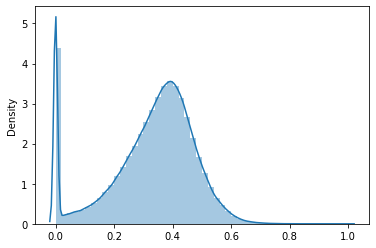

In [54]:
fig = sns.distplot(all_comp.flatten())

First train a keras model on this compendium.

In [4]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
seq_temp = run_model.run_model('../data_files/sa_NCTC3825_filt_norm_log_01.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
arr_temp = run_model.run_model('../data_files/train_set_normalized.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

2023-03-28 13:06:56.677906: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


86/86 [==============================] - 1s 5ms/step - loss: 0.6933 - val_loss: 0.6910


(5549, 600)

In [5]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict2 = {
    "tf_adage": tf_adage
}
model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                    print(name)
                    mseq = run_model.run_model('../data_files/sa_NCTC3825_filt_norm_log_01.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)
                    marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    model_dict2[name] = marr
                    model_dict_seq2[name] = mseq

ad_glorot_uniform_0_sigmoid_tiedTrue
Epoch 1/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6549 - val_loss: 0.6271
Epoch 2/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6220 - val_loss: 0.6137
Epoch 3/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6145 - val_loss: 0.6086
Epoch 4/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6108 - val_loss: 0.6053
Epoch 5/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6081 - val_loss: 0.6028
Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6058 - val_loss: 0.6004
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6035 - val_loss: 0.5981
Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6010 - val_loss: 0.5955
Epoch 9/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5982 - val_loss: 0.5926
Epoch 10/300
194/194 [==============================] 

194/194 [==============================] - 1s 3ms/step - loss: 0.5858 - val_loss: 0.5810
Epoch 82/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.5810
Epoch 83/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.5809
Epoch 84/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.5809
Epoch 85/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5856 - val_loss: 0.5808
Epoch 86/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5856 - val_loss: 0.5808
Epoch 87/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5855 - val_loss: 0.5807
Epoch 88/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5855 - val_loss: 0.5807
Epoch 89/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5855 - val_loss: 0.5807
Epoch 90/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5854 - val_loss: 

Epoch 161/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5779
Epoch 162/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5779
Epoch 163/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5779
Epoch 164/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5829 - val_loss: 0.5779
Epoch 165/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5829 - val_loss: 0.5778
Epoch 166/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5829 - val_loss: 0.5778
Epoch 167/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5828 - val_loss: 0.5778
Epoch 168/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5828 - val_loss: 0.5777
Epoch 169/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5828 - val_loss: 0.5777
Epoch 170/300
194/194 [==============================] - 1s 3ms/step - lo

194/194 [==============================] - 1s 3ms/step - loss: 0.5807 - val_loss: 0.5760
Epoch 241/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5807 - val_loss: 0.5760
Epoch 242/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5807 - val_loss: 0.5760
Epoch 243/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5807 - val_loss: 0.5760
Epoch 244/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5807 - val_loss: 0.5759
Epoch 245/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5806 - val_loss: 0.5759
Epoch 246/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5806 - val_loss: 0.5759
Epoch 247/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5806 - val_loss: 0.5759
Epoch 248/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5806 - val_loss: 0.5759
Epoch 249/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5805 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6323 - val_loss: 0.6403
Epoch 21/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6318 - val_loss: 0.6397
Epoch 22/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6312 - val_loss: 0.6391
Epoch 23/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6307 - val_loss: 0.6385
Epoch 24/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6302 - val_loss: 0.6380
Epoch 25/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6297 - val_loss: 0.6375
Epoch 26/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6292 - val_loss: 0.6370
Epoch 27/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6287 - val_loss: 0.6365
Epoch 28/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6283 - val_loss: 0.6360
Epoch 29/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6279 - val_loss: 0.6356
Epoch 30/300


86/86 [==============================] - 0s 5ms/step - loss: 0.6143 - val_loss: 0.6208
Epoch 103/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6141 - val_loss: 0.6206
Epoch 104/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6140 - val_loss: 0.6204
Epoch 105/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6138 - val_loss: 0.6203
Epoch 106/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6137 - val_loss: 0.6201
Epoch 107/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6135 - val_loss: 0.6199
Epoch 108/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6134 - val_loss: 0.6197
Epoch 109/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6132 - val_loss: 0.6196
Epoch 110/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6131 - val_loss: 0.6194
Epoch 111/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6129 - val_loss: 0.6192
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6068 - val_loss: 0.6129
Epoch 184/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6067 - val_loss: 0.6128
Epoch 185/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6067 - val_loss: 0.6128
Epoch 186/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6066 - val_loss: 0.6127
Epoch 187/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6066 - val_loss: 0.6127
Epoch 188/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6065 - val_loss: 0.6127
Epoch 189/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6064 - val_loss: 0.6126
Epoch 190/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6064 - val_loss: 0.6126
Epoch 191/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6064 - val_loss: 0.6125
Epoch 192/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6063 - val_loss: 0.6125
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6034 - val_loss: 0.6105
Epoch 265/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6033 - val_loss: 0.6104
Epoch 266/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6033 - val_loss: 0.6104
Epoch 267/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6033 - val_loss: 0.6104
Epoch 268/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6032 - val_loss: 0.6104
Epoch 269/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6032 - val_loss: 0.6103
Epoch 270/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6032 - val_loss: 0.6103
Epoch 271/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6031 - val_loss: 0.6103
Epoch 272/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6031 - val_loss: 0.6103
Epoch 273/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6031 - val_loss: 0.6103
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5837
Epoch 45/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5838
Epoch 46/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5837
Epoch 47/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5837
Epoch 48/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5836
Epoch 49/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5836
Epoch 50/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5835
Epoch 51/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5835
Epoch 52/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5835
Epoch 53/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5853 - val_loss: 0.5805
Epoch 125/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5852 - val_loss: 0.5805
Epoch 126/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5852 - val_loss: 0.5804
Epoch 127/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5852 - val_loss: 0.5804
Epoch 128/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.5804
Epoch 129/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.5804
Epoch 130/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5851 - val_loss: 0.5803
Epoch 131/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.5803
Epoch 132/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.5802
Epoch 133/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5850 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5781
Epoch 204/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5781
Epoch 205/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5780
Epoch 206/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5780
Epoch 207/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5780
Epoch 208/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5780
Epoch 209/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5779
Epoch 210/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5779
Epoch 211/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - val_loss: 0.5779
Epoch 212/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5830 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5765
Epoch 283/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5765
Epoch 284/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5765
Epoch 285/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5765
Epoch 286/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 0.5765
Epoch 287/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5814 - val_loss: 0.5765
Epoch 288/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5814 - val_loss: 0.5764
Epoch 289/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5814 - val_loss: 0.5764
Epoch 290/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5814 - val_loss: 0.5764
Epoch 291/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5814 - v

86/86 [==============================] - 0s 5ms/step - loss: 0.6219 - val_loss: 0.6264
Epoch 64/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6217 - val_loss: 0.6262
Epoch 65/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6215 - val_loss: 0.6260
Epoch 66/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6213 - val_loss: 0.6258
Epoch 67/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6211 - val_loss: 0.6256
Epoch 68/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6210 - val_loss: 0.6254
Epoch 69/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6208 - val_loss: 0.6253
Epoch 70/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6207 - val_loss: 0.6251
Epoch 71/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6205 - val_loss: 0.6249
Epoch 72/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6204 - val_loss: 0.6248
Epoch 73/300


86/86 [==============================] - 0s 5ms/step - loss: 0.6163 - val_loss: 0.6204
Epoch 145/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6163 - val_loss: 0.6203
Epoch 146/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6162 - val_loss: 0.6203
Epoch 147/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6162 - val_loss: 0.6202
Epoch 148/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6161 - val_loss: 0.6202
Epoch 149/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6161 - val_loss: 0.6201
Epoch 150/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6160 - val_loss: 0.6201
Epoch 151/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6160 - val_loss: 0.6200
Epoch 152/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6159 - val_loss: 0.6200
Epoch 153/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6159 - val_loss: 0.6200
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6123 - val_loss: 0.6167
Epoch 226/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6122 - val_loss: 0.6166
Epoch 227/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6122 - val_loss: 0.6166
Epoch 228/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6121 - val_loss: 0.6166
Epoch 229/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6121 - val_loss: 0.6165
Epoch 230/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6120 - val_loss: 0.6165
Epoch 231/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6120 - val_loss: 0.6165
Epoch 232/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6119 - val_loss: 0.6164
Epoch 233/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6119 - val_loss: 0.6164
Epoch 234/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6118 - val_loss: 0.6163
Epoc

Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6336 - val_loss: 0.6340
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6335 - val_loss: 0.6338
Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6332 - val_loss: 0.6337
Epoch 9/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6331 - val_loss: 0.6336
Epoch 10/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6328 - val_loss: 0.6333
Epoch 11/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6327 - val_loss: 0.6332
Epoch 12/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6325 - val_loss: 0.6329
Epoch 13/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6327
Epoch 14/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6319 - val_loss: 0.6324
Epoch 15/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6316 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5776 - val_loss: 0.5733
Epoch 87/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5733
Epoch 88/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5732
Epoch 89/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5732
Epoch 90/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5731
Epoch 91/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5731
Epoch 92/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5731
Epoch 93/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5730
Epoch 94/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5772 - val_loss: 0.5730
Epoch 95/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5772 - val_loss: 

Epoch 166/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5714
Epoch 167/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5714
Epoch 168/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5714
Epoch 169/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5714
Epoch 170/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5714
Epoch 171/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5754 - val_loss: 0.5714
Epoch 172/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5754 - val_loss: 0.5713
Epoch 173/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5754 - val_loss: 0.5713
Epoch 174/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5754 - val_loss: 0.5713
Epoch 175/300
194/194 [==============================] - 1s 3ms/step - lo

194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 246/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 247/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 248/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 249/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 250/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 251/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 252/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 253/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5746 - val_loss: 0.5705
Epoch 254/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5745 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6284 - val_loss: 0.6407
Epoch 26/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6281 - val_loss: 0.6405
Epoch 27/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6277 - val_loss: 0.6406
Epoch 28/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6273 - val_loss: 0.6405
Epoch 29/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6269 - val_loss: 0.6404
Epoch 30/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6266 - val_loss: 0.6399
Epoch 31/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.6393
Epoch 32/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6259 - val_loss: 0.6396
Epoch 33/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6256 - val_loss: 0.6391
Epoch 34/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6252 - val_loss: 0.6389
Epoch 35/300


Epoch 107/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6115 - val_loss: 0.6323
Epoch 108/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6114 - val_loss: 0.6326
Epoch 109/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6113 - val_loss: 0.6324
Epoch 110/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6112 - val_loss: 0.6319
Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.6321
Epoch 112/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6110 - val_loss: 0.6324
Epoch 113/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6109 - val_loss: 0.6322
Epoch 114/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6107 - val_loss: 0.6318
Epoch 115/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6106 - val_loss: 0.6319
Epoch 116/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6105 - val_los

86/86 [==============================] - 0s 5ms/step - loss: 0.5966 - val_loss: 0.6134
Epoch 189/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5966 - val_loss: 0.6133
Epoch 190/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5965 - val_loss: 0.6130
Epoch 191/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5964 - val_loss: 0.6130
Epoch 192/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5963 - val_loss: 0.6127
Epoch 193/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5963 - val_loss: 0.6126
Epoch 194/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5962 - val_loss: 0.6123
Epoch 195/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5961 - val_loss: 0.6123
Epoch 196/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5961 - val_loss: 0.6121
Epoch 197/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5960 - val_loss: 0.6120
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5936 - val_loss: 0.6078
Epoch 270/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5935 - val_loss: 0.6078
Epoch 271/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5935 - val_loss: 0.6078
Epoch 272/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5935 - val_loss: 0.6077
Epoch 273/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5935 - val_loss: 0.6077
Epoch 274/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.6077
Epoch 275/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.6076
Epoch 276/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.6076
Epoch 277/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.6076
Epoch 278/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5933 - val_loss: 0.6075
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5847 - val_loss: 0.5800
Epoch 50/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5846 - val_loss: 0.5799
Epoch 51/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5798
Epoch 52/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5797
Epoch 53/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5796
Epoch 54/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5795
Epoch 55/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5794
Epoch 56/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5793
Epoch 57/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5792
Epoch 58/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5840 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5801 - val_loss: 0.5755
Epoch 130/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5755
Epoch 131/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5755
Epoch 132/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - val_loss: 0.5754
Epoch 133/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - val_loss: 0.5754
Epoch 134/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - val_loss: 0.5754
Epoch 135/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5798 - val_loss: 0.5754
Epoch 136/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5798 - val_loss: 0.5753
Epoch 137/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5797 - val_loss: 0.5753
Epoch 138/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5797 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5778 - val_loss: 0.5736
Epoch 209/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5778 - val_loss: 0.5736
Epoch 210/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5778 - val_loss: 0.5736
Epoch 211/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5778 - val_loss: 0.5736
Epoch 212/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5778 - val_loss: 0.5735
Epoch 213/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5777 - val_loss: 0.5735
Epoch 214/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5777 - val_loss: 0.5735
Epoch 215/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5777 - val_loss: 0.5735
Epoch 216/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5777 - val_loss: 0.5735
Epoch 217/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5777 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5766 - val_loss: 0.5725
Epoch 288/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5766 - val_loss: 0.5725
Epoch 289/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5725
Epoch 290/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5725
Epoch 291/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5725
Epoch 292/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5724
Epoch 293/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5724
Epoch 294/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5724
Epoch 295/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5724
Epoch 296/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6122 - val_loss: 0.6162
Epoch 69/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6121 - val_loss: 0.6161
Epoch 70/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6119 - val_loss: 0.6160
Epoch 71/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6118 - val_loss: 0.6158
Epoch 72/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6116 - val_loss: 0.6157
Epoch 73/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6114 - val_loss: 0.6156
Epoch 74/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6113 - val_loss: 0.6155
Epoch 75/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.6153
Epoch 76/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6110 - val_loss: 0.6152
Epoch 77/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6108 - val_loss: 0.6151
Epoch 78/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6033 - val_loss: 0.6100
Epoch 150/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6033 - val_loss: 0.6100
Epoch 151/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6032 - val_loss: 0.6099
Epoch 152/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6031 - val_loss: 0.6099
Epoch 153/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6031 - val_loss: 0.6098
Epoch 154/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6030 - val_loss: 0.6098
Epoch 155/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6029 - val_loss: 0.6098
Epoch 156/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6029 - val_loss: 0.6097
Epoch 157/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6028 - val_loss: 0.6097
Epoch 158/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6027 - val_loss: 0.6096
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5992 - val_loss: 0.6074
Epoch 231/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5991 - val_loss: 0.6074
Epoch 232/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5991 - val_loss: 0.6073
Epoch 233/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5991 - val_loss: 0.6073
Epoch 234/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5990 - val_loss: 0.6073
Epoch 235/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5990 - val_loss: 0.6073
Epoch 236/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5990 - val_loss: 0.6073
Epoch 237/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5989 - val_loss: 0.6072
Epoch 238/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5989 - val_loss: 0.6072
Epoch 239/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5989 - val_loss: 0.6072
Epoc

Epoch 11/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5867 - val_loss: 0.5818
Epoch 12/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5861 - val_loss: 0.5813
Epoch 13/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.5808
Epoch 14/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5853 - val_loss: 0.5805
Epoch 15/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.5801
Epoch 16/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5847 - val_loss: 0.5798
Epoch 17/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5794
Epoch 18/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5841 - val_loss: 0.5792
Epoch 19/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5838 - val_loss: 0.5789
Epoch 20/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5836

194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 92/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 93/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5767 - val_loss: 0.5727
Epoch 94/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5767 - val_loss: 0.5726
Epoch 95/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5767 - val_loss: 0.5726
Epoch 96/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5766 - val_loss: 0.5726
Epoch 97/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5766 - val_loss: 0.5726
Epoch 98/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5766 - val_loss: 0.5725
Epoch 99/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5725
Epoch 100/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss:

194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5708
Epoch 171/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5708
Epoch 172/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5707
Epoch 173/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5707
Epoch 174/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5707
Epoch 175/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5748 - val_loss: 0.5707
Epoch 176/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5748 - val_loss: 0.5707
Epoch 177/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5748 - val_loss: 0.5707
Epoch 178/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5748 - val_loss: 0.5707
Epoch 179/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5748 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5740 - val_loss: 0.5697
Epoch 250/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5740 - val_loss: 0.5697
Epoch 251/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5739 - val_loss: 0.5697
Epoch 252/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5739 - val_loss: 0.5697
Epoch 253/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5739 - val_loss: 0.5696
Epoch 254/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5739 - val_loss: 0.5696
Epoch 255/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5739 - val_loss: 0.5696
Epoch 256/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5739 - val_loss: 0.5696
Epoch 257/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5739 - val_loss: 0.5696
Epoch 258/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5739 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6170 - val_loss: 0.6260
Epoch 30/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6164 - val_loss: 0.6255
Epoch 31/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6159 - val_loss: 0.6251
Epoch 32/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6153 - val_loss: 0.6246
Epoch 33/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6148 - val_loss: 0.6241
Epoch 34/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6142 - val_loss: 0.6237
Epoch 35/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6137 - val_loss: 0.6232
Epoch 36/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6131 - val_loss: 0.6226
Epoch 37/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6126 - val_loss: 0.6222
Epoch 38/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6120 - val_loss: 0.6216
Epoch 39/300


Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5945 - val_loss: 0.6044
Epoch 112/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5944 - val_loss: 0.6044
Epoch 113/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5944 - val_loss: 0.6043
Epoch 114/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5943 - val_loss: 0.6043
Epoch 115/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5942 - val_loss: 0.6042
Epoch 116/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5942 - val_loss: 0.6042
Epoch 117/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6041
Epoch 118/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6041
Epoch 119/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.6040
Epoch 120/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5939 - val_los

86/86 [==============================] - 0s 4ms/step - loss: 0.5909 - val_loss: 0.6017
Epoch 193/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5909 - val_loss: 0.6016
Epoch 194/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5908 - val_loss: 0.6016
Epoch 195/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5908 - val_loss: 0.6016
Epoch 196/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5908 - val_loss: 0.6016
Epoch 197/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.6016
Epoch 198/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.6015
Epoch 199/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.6015
Epoch 200/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5907 - val_loss: 0.6015
Epoch 201/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5906 - val_loss: 0.6015
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5890 - val_loss: 0.6003
Epoch 274/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5890 - val_loss: 0.6003
Epoch 275/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5890 - val_loss: 0.6003
Epoch 276/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5889 - val_loss: 0.6003
Epoch 277/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5889 - val_loss: 0.6003
Epoch 278/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5889 - val_loss: 0.6002
Epoch 279/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5889 - val_loss: 0.6003
Epoch 280/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5889 - val_loss: 0.6002
Epoch 281/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5889 - val_loss: 0.6002
Epoch 282/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5888 - val_loss: 0.6002
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5823 - val_loss: 0.5773
Epoch 54/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5822 - val_loss: 0.5772
Epoch 55/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5821 - val_loss: 0.5772
Epoch 56/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5820 - val_loss: 0.5771
Epoch 57/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5819 - val_loss: 0.5770
Epoch 58/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5818 - val_loss: 0.5769
Epoch 59/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5817 - val_loss: 0.5768
Epoch 60/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5817 - val_loss: 0.5767
Epoch 61/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5816 - val_loss: 0.5766
Epoch 62/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5815 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5777 - val_loss: 0.5734
Epoch 134/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5776 - val_loss: 0.5734
Epoch 135/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5776 - val_loss: 0.5733
Epoch 136/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5776 - val_loss: 0.5733
Epoch 137/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5733
Epoch 138/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5733
Epoch 139/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5733
Epoch 140/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5775 - val_loss: 0.5732
Epoch 141/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5732
Epoch 142/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5720
Epoch 213/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5720
Epoch 214/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5719
Epoch 215/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5719
Epoch 216/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5719
Epoch 217/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5719
Epoch 218/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5719
Epoch 219/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5758 - val_loss: 0.5719
Epoch 220/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5758 - val_loss: 0.5719
Epoch 221/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5758 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5713
Epoch 292/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5712
Epoch 293/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5712
Epoch 294/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5712
Epoch 295/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5712
Epoch 296/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5712
Epoch 297/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5712
Epoch 298/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5712
Epoch 299/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - val_loss: 0.5712
Epoch 300/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5749 - v

Epoch 73/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6036 - val_loss: 0.6100
Epoch 74/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6034 - val_loss: 0.6099
Epoch 75/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6033 - val_loss: 0.6098
Epoch 76/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6031 - val_loss: 0.6097
Epoch 77/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6030 - val_loss: 0.6096
Epoch 78/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6028 - val_loss: 0.6095
Epoch 79/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6027 - val_loss: 0.6095
Epoch 80/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6026 - val_loss: 0.6094
Epoch 81/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6024 - val_loss: 0.6093
Epoch 82/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6023 - val_loss: 0.6092


86/86 [==============================] - 0s 4ms/step - loss: 0.5971 - val_loss: 0.6057
Epoch 155/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5971 - val_loss: 0.6058
Epoch 156/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5970 - val_loss: 0.6057
Epoch 157/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5970 - val_loss: 0.6057
Epoch 158/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5970 - val_loss: 0.6057
Epoch 159/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5969 - val_loss: 0.6057
Epoch 160/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5969 - val_loss: 0.6056
Epoch 161/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5968 - val_loss: 0.6056
Epoch 162/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5968 - val_loss: 0.6055
Epoch 163/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5967 - val_loss: 0.6055
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.5943 - val_loss: 0.6040
Epoch 236/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5942 - val_loss: 0.6039
Epoch 237/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5942 - val_loss: 0.6040
Epoch 238/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5942 - val_loss: 0.6039
Epoch 239/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6039
Epoch 240/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6039
Epoch 241/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6038
Epoch 242/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5941 - val_loss: 0.6038
Epoch 243/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.6038
Epoch 244/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5940 - val_loss: 0.6038
Epoc

Epoch 16/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6301 - val_loss: 0.6245
Epoch 17/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6263 - val_loss: 0.6211
Epoch 18/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6234 - val_loss: 0.6185
Epoch 19/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6211 - val_loss: 0.6166
Epoch 20/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6195 - val_loss: 0.6151
Epoch 21/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6182 - val_loss: 0.6140
Epoch 22/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6172 - val_loss: 0.6131
Epoch 23/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6163 - val_loss: 0.6124
Epoch 24/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6156 - val_loss: 0.6117
Epoch 25/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6150

194/194 [==============================] - 1s 3ms/step - loss: 0.5928 - val_loss: 0.5890
Epoch 97/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5927 - val_loss: 0.5889
Epoch 98/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5926 - val_loss: 0.5888
Epoch 99/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5925 - val_loss: 0.5887
Epoch 100/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5924 - val_loss: 0.5886
Epoch 101/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5923 - val_loss: 0.5886
Epoch 102/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5922 - val_loss: 0.5885
Epoch 103/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5922 - val_loss: 0.5884
Epoch 104/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5921 - val_loss: 0.5883
Epoch 105/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5920 - val_

194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5868
Epoch 176/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5867
Epoch 177/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5867
Epoch 178/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5867
Epoch 179/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5868
Epoch 180/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5867
Epoch 181/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5868
Epoch 182/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5867
Epoch 183/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5905 - val_loss: 0.5867
Epoch 184/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5904 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5863
Epoch 255/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5863
Epoch 256/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5863
Epoch 257/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5862
Epoch 258/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5862
Epoch 259/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5862
Epoch 260/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5862
Epoch 261/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5862
Epoch 262/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 0.5862
Epoch 263/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5900 - v

86/86 [==============================] - 0s 5ms/step - loss: 0.6756 - val_loss: 0.6838
Epoch 35/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6751 - val_loss: 0.6833
Epoch 36/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6746 - val_loss: 0.6828
Epoch 37/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6742 - val_loss: 0.6824
Epoch 38/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6739 - val_loss: 0.6821
Epoch 39/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6736 - val_loss: 0.6818
Epoch 40/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6733 - val_loss: 0.6816
Epoch 41/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6731 - val_loss: 0.6813
Epoch 42/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6729 - val_loss: 0.6811
Epoch 43/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6727 - val_loss: 0.6809
Epoch 44/300


Epoch 116/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6560 - val_loss: 0.6670
Epoch 117/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6559 - val_loss: 0.6669
Epoch 118/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6557 - val_loss: 0.6668
Epoch 119/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6555 - val_loss: 0.6667
Epoch 120/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6554 - val_loss: 0.6666
Epoch 121/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6552 - val_loss: 0.6664
Epoch 122/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6551 - val_loss: 0.6663
Epoch 123/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6549 - val_loss: 0.6662
Epoch 124/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6548 - val_loss: 0.6661
Epoch 125/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6547 - val_los

86/86 [==============================] - 0s 5ms/step - loss: 0.6484 - val_loss: 0.6605
Epoch 198/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6483 - val_loss: 0.6604
Epoch 199/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6482 - val_loss: 0.6603
Epoch 200/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6481 - val_loss: 0.6602
Epoch 201/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6480 - val_loss: 0.6601
Epoch 202/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6479 - val_loss: 0.6600
Epoch 203/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6479 - val_loss: 0.6599
Epoch 204/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6478 - val_loss: 0.6598
Epoch 205/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6477 - val_loss: 0.6597
Epoch 206/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6476 - val_loss: 0.6596
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6432 - val_loss: 0.6541
Epoch 279/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6431 - val_loss: 0.6541
Epoch 280/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6431 - val_loss: 0.6540
Epoch 281/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6431 - val_loss: 0.6540
Epoch 282/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6430 - val_loss: 0.6540
Epoch 283/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6430 - val_loss: 0.6540
Epoch 284/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6430 - val_loss: 0.6539
Epoch 285/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6429 - val_loss: 0.6539
Epoch 286/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6429 - val_loss: 0.6538
Epoch 287/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6429 - val_loss: 0.6538
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 59/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 60/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 61/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 62/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 63/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 64/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 65/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 66/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 67/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 139/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 140/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 141/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 142/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 143/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 144/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 145/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 146/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 147/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 218/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 219/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 220/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 221/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 222/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 223/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 224/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 225/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 226/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 297/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 298/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 299/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 300/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 1/300
86/86 [==============================] - 1s 5ms/step - loss: 0.9442 - val_loss: 0.9251
Epoch 2/300
86/86 [==============================] - 0s 5ms/step - loss: 0.9011 - val_loss: 0.8921
Epoch 3/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8739 - val_loss: 0.8752
Epoch 4/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8579 - val_loss: 0.8619
Epoch 5/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8446 - val_loss: 0.8492
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6363 - val_loss: 0.6471
Epoch 79/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6363 - val_loss: 0.6471
Epoch 80/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6363 - val_loss: 0.6469
Epoch 81/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6362 - val_loss: 0.6468
Epoch 82/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6362 - val_loss: 0.6468
Epoch 83/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6361 - val_loss: 0.6467
Epoch 84/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6361 - val_loss: 0.6466
Epoch 85/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6361 - val_loss: 0.6465
Epoch 86/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6360 - val_loss: 0.6465
Epoch 87/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6360 - val_loss: 0.6463
Epoch 88/300


86/86 [==============================] - 0s 5ms/step - loss: 0.6321 - val_loss: 0.6399
Epoch 160/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6320 - val_loss: 0.6398
Epoch 161/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6320 - val_loss: 0.6397
Epoch 162/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6319 - val_loss: 0.6397
Epoch 163/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6319 - val_loss: 0.6396
Epoch 164/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6318 - val_loss: 0.6395
Epoch 165/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6318 - val_loss: 0.6394
Epoch 166/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6317 - val_loss: 0.6394
Epoch 167/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6317 - val_loss: 0.6393
Epoch 168/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6317 - val_loss: 0.6393
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6293 - val_loss: 0.6358
Epoch 241/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6293 - val_loss: 0.6357
Epoch 242/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6292 - val_loss: 0.6357
Epoch 243/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6292 - val_loss: 0.6357
Epoch 244/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6292 - val_loss: 0.6356
Epoch 245/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6292 - val_loss: 0.6356
Epoch 246/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6291 - val_loss: 0.6355
Epoch 247/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6291 - val_loss: 0.6355
Epoch 248/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6291 - val_loss: 0.6355
Epoch 249/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6291 - val_loss: 0.6355
Epoc

Epoch 21/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6579 - val_loss: 0.6561
Epoch 22/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6570 - val_loss: 0.6554
Epoch 23/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6563 - val_loss: 0.6547
Epoch 24/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6557 - val_loss: 0.6542
Epoch 25/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6551 - val_loss: 0.6536
Epoch 26/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6545 - val_loss: 0.6530
Epoch 27/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6539 - val_loss: 0.6524
Epoch 28/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6533 - val_loss: 0.6518
Epoch 29/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6527 - val_loss: 0.6511
Epoch 30/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6522

194/194 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5876
Epoch 102/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5876
Epoch 103/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5875
Epoch 104/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5875
Epoch 105/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5875
Epoch 106/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5913 - val_loss: 0.5874
Epoch 107/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5913 - val_loss: 0.5874
Epoch 108/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5912 - val_loss: 0.5874
Epoch 109/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5912 - val_loss: 0.5873
Epoch 110/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5912 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5896 - val_loss: 0.5858
Epoch 181/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5858
Epoch 182/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5858
Epoch 183/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5858
Epoch 184/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5858
Epoch 185/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5858
Epoch 186/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5857
Epoch 187/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5857
Epoch 188/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5895 - val_loss: 0.5857
Epoch 189/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5894 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 260/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 261/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 262/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 263/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 264/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 265/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 266/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 267/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 268/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - v

Epoch 40/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6732 - val_loss: 0.6805
Epoch 41/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6729 - val_loss: 0.6802
Epoch 42/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6726 - val_loss: 0.6800
Epoch 43/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6724 - val_loss: 0.6798
Epoch 44/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6722 - val_loss: 0.6795
Epoch 45/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6720 - val_loss: 0.6793
Epoch 46/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6718 - val_loss: 0.6791
Epoch 47/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6716 - val_loss: 0.6790
Epoch 48/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6714 - val_loss: 0.6788
Epoch 49/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6713 - val_loss: 0.6787


86/86 [==============================] - 0s 5ms/step - loss: 0.6611 - val_loss: 0.6687
Epoch 122/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6609 - val_loss: 0.6685
Epoch 123/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6608 - val_loss: 0.6684
Epoch 124/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6606 - val_loss: 0.6682
Epoch 125/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6605 - val_loss: 0.6681
Epoch 126/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6603 - val_loss: 0.6679
Epoch 127/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6602 - val_loss: 0.6678
Epoch 128/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6600 - val_loss: 0.6676
Epoch 129/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6599 - val_loss: 0.6674
Epoch 130/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6597 - val_loss: 0.6673
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6500 - val_loss: 0.6595
Epoch 203/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6499 - val_loss: 0.6594
Epoch 204/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6498 - val_loss: 0.6594
Epoch 205/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6497 - val_loss: 0.6593
Epoch 206/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6496 - val_loss: 0.6592
Epoch 207/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6495 - val_loss: 0.6592
Epoch 208/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6494 - val_loss: 0.6591
Epoch 209/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6493 - val_loss: 0.6591
Epoch 210/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6492 - val_loss: 0.6591
Epoch 211/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6491 - val_loss: 0.6590
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6394 - val_loss: 0.6481
Epoch 284/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6393 - val_loss: 0.6480
Epoch 285/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6392 - val_loss: 0.6478
Epoch 286/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6391 - val_loss: 0.6477
Epoch 287/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6391 - val_loss: 0.6476
Epoch 288/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6390 - val_loss: 0.6475
Epoch 289/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6390 - val_loss: 0.6475
Epoch 290/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6389 - val_loss: 0.6474
Epoch 291/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6389 - val_loss: 0.6473
Epoch 292/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6388 - val_loss: 0.6472
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5890 - val_loss: 0.5851
Epoch 64/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5890 - val_loss: 0.5852
Epoch 65/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5890 - val_loss: 0.5850
Epoch 66/300
194/194 [==============================] - 1s 4ms/step - loss: 0.5890 - val_loss: 0.5850
Epoch 67/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5850
Epoch 68/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5850
Epoch 69/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5850
Epoch 70/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5849
Epoch 71/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 0.5849
Epoch 72/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5889 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5836
Epoch 144/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5836
Epoch 145/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5835
Epoch 146/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5836
Epoch 147/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5838
Epoch 148/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5835
Epoch 149/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5834
Epoch 150/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5834
Epoch 151/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5833
Epoch 152/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5863 - val_loss: 0.5819
Epoch 223/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5863 - val_loss: 0.5818
Epoch 224/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5818
Epoch 225/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5818
Epoch 226/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5817
Epoch 227/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5818
Epoch 228/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5817
Epoch 229/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5817
Epoch 230/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5817
Epoch 231/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5861 - v

86/86 [==============================] - 1s 5ms/step - loss: 0.9415 - val_loss: 0.9198
Epoch 2/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8957 - val_loss: 0.8897
Epoch 3/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8720 - val_loss: 0.8743
Epoch 4/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8570 - val_loss: 0.8605
Epoch 5/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8434 - val_loss: 0.8465
Epoch 6/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8301 - val_loss: 0.8325
Epoch 7/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8171 - val_loss: 0.8190
Epoch 8/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8044 - val_loss: 0.8058
Epoch 9/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7921 - val_loss: 0.7931
Epoch 10/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7802 - val_loss: 0.7809
Epoch 11/300
86/86 [=

86/86 [==============================] - 0s 5ms/step - loss: 0.6226 - val_loss: 0.6263
Epoch 84/300
86/86 [==============================] - 0s 6ms/step - loss: 0.6226 - val_loss: 0.6262
Epoch 85/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6225 - val_loss: 0.6261
Epoch 86/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6225 - val_loss: 0.6261
Epoch 87/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6224 - val_loss: 0.6260
Epoch 88/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6223 - val_loss: 0.6260
Epoch 89/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6223 - val_loss: 0.6259
Epoch 90/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6222 - val_loss: 0.6259
Epoch 91/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6221 - val_loss: 0.6257
Epoch 92/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6221 - val_loss: 0.6257
Epoch 93/300


86/86 [==============================] - 0s 5ms/step - loss: 0.6186 - val_loss: 0.6224
Epoch 165/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6185 - val_loss: 0.6223
Epoch 166/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6185 - val_loss: 0.6223
Epoch 167/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6185 - val_loss: 0.6221
Epoch 168/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6184 - val_loss: 0.6222
Epoch 169/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6184 - val_loss: 0.6222
Epoch 170/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6183 - val_loss: 0.6221
Epoch 171/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6183 - val_loss: 0.6220
Epoch 172/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6182 - val_loss: 0.6220
Epoch 173/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6182 - val_loss: 0.6221
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6154 - val_loss: 0.6200
Epoch 246/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6154 - val_loss: 0.6197
Epoch 247/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6154 - val_loss: 0.6198
Epoch 248/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6153 - val_loss: 0.6198
Epoch 249/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6153 - val_loss: 0.6198
Epoch 250/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6153 - val_loss: 0.6198
Epoch 251/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.6197
Epoch 252/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.6197
Epoch 253/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.6198
Epoch 254/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.6197
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.6036 - val_loss: 0.5990
Epoch 26/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6027 - val_loss: 0.5982
Epoch 27/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6020 - val_loss: 0.5974
Epoch 28/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6012 - val_loss: 0.5967
Epoch 29/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6006 - val_loss: 0.5961
Epoch 30/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6000 - val_loss: 0.5955
Epoch 31/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5994 - val_loss: 0.5950
Epoch 32/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5989 - val_loss: 0.5944
Epoch 33/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5984 - val_loss: 0.5939
Epoch 34/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5979 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5893 - val_loss: 0.5852
Epoch 106/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5893 - val_loss: 0.5851
Epoch 107/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5893 - val_loss: 0.5851
Epoch 108/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5851
Epoch 109/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5850
Epoch 110/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5850
Epoch 111/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5849
Epoch 112/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5891 - val_loss: 0.5849
Epoch 113/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5890 - val_loss: 0.5849
Epoch 114/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5890 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5831
Epoch 185/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5831
Epoch 186/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5831
Epoch 187/300
194/194 [==============================] - 1s 4ms/step - loss: 0.5873 - val_loss: 0.5831
Epoch 188/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5831
Epoch 189/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5831
Epoch 190/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5831
Epoch 191/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5830
Epoch 192/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5830
Epoch 193/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5824
Epoch 264/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5824
Epoch 265/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5824
Epoch 266/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5824
Epoch 267/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5823
Epoch 268/300
194/194 [==============================] - 1s 4ms/step - loss: 0.5866 - val_loss: 0.5824
Epoch 269/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5824
Epoch 270/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5823
Epoch 271/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5865 - val_loss: 0.5823
Epoch 272/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5865 - v

86/86 [==============================] - 0s 5ms/step - loss: 0.6457 - val_loss: 0.6522
Epoch 45/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6450 - val_loss: 0.6515
Epoch 46/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6443 - val_loss: 0.6509
Epoch 47/300
86/86 [==============================] - 0s 6ms/step - loss: 0.6436 - val_loss: 0.6503
Epoch 48/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6430 - val_loss: 0.6497
Epoch 49/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6424 - val_loss: 0.6492
Epoch 50/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6419 - val_loss: 0.6486
Epoch 51/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6413 - val_loss: 0.6482
Epoch 52/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6408 - val_loss: 0.6478
Epoch 53/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6403 - val_loss: 0.6473
Epoch 54/300


Epoch 126/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6316 - val_loss: 0.6407
Epoch 127/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6316 - val_loss: 0.6407
Epoch 128/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6316 - val_loss: 0.6406
Epoch 129/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6315 - val_loss: 0.6407
Epoch 130/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6315 - val_loss: 0.6407
Epoch 131/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6315 - val_loss: 0.6406
Epoch 132/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6315 - val_loss: 0.6406
Epoch 133/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6315 - val_loss: 0.6406
Epoch 134/300
86/86 [==============================] - 0s 6ms/step - loss: 0.6315 - val_loss: 0.6406
Epoch 135/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6314 - val_los

86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6397
Epoch 208/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6398
Epoch 209/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6397
Epoch 210/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6398
Epoch 211/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6397
Epoch 212/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6397
Epoch 213/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6397
Epoch 214/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6397
Epoch 215/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6396
Epoch 216/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6306 - val_loss: 0.6397
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6298 - val_loss: 0.6387
Epoch 289/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6298 - val_loss: 0.6386
Epoch 290/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.6386
Epoch 291/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.6386
Epoch 292/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.6386
Epoch 293/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.6387
Epoch 294/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.6386
Epoch 295/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.6386
Epoch 296/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6297 - val_loss: 0.6385
Epoch 297/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6296 - val_loss: 0.6385
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5829
Epoch 69/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5828
Epoch 70/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5828
Epoch 71/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5827
Epoch 72/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5828
Epoch 73/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5826
Epoch 74/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5827
Epoch 75/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5826
Epoch 76/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5826
Epoch 77/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 

Epoch 148/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5794
Epoch 149/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5794
Epoch 150/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5794
Epoch 151/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5794
Epoch 152/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5794
Epoch 153/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5794
Epoch 154/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5793
Epoch 155/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5793
Epoch 156/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5793
Epoch 157/300
194/194 [==============================] - 1s 3ms/step - lo

194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5785
Epoch 228/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5784
Epoch 229/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5784
Epoch 230/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5784
Epoch 231/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5784
Epoch 232/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5784
Epoch 233/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5784
Epoch 234/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5784
Epoch 235/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5784
Epoch 236/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - v

Epoch 7/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8146 - val_loss: 0.8155
Epoch 8/300
86/86 [==============================] - 0s 5ms/step - loss: 0.8021 - val_loss: 0.8027
Epoch 9/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7898 - val_loss: 0.7901
Epoch 10/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7778 - val_loss: 0.7776
Epoch 11/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7660 - val_loss: 0.7656
Epoch 12/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7546 - val_loss: 0.7540
Epoch 13/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7438 - val_loss: 0.7430
Epoch 14/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7334 - val_loss: 0.7328
Epoch 15/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7236 - val_loss: 0.7231
Epoch 16/300
86/86 [==============================] - 0s 5ms/step - loss: 0.7145 - val_loss: 0.7140
Epo

Epoch 89/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6174 - val_loss: 0.6208
Epoch 90/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6173 - val_loss: 0.6208
Epoch 91/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6172 - val_loss: 0.6207
Epoch 92/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6171 - val_loss: 0.6207
Epoch 93/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6206
Epoch 94/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6169 - val_loss: 0.6206
Epoch 95/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6168 - val_loss: 0.6206
Epoch 96/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6168 - val_loss: 0.6204
Epoch 97/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6167 - val_loss: 0.6204
Epoch 98/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6166 - val_loss: 0.6203


86/86 [==============================] - 0s 5ms/step - loss: 0.6119 - val_loss: 0.6168
Epoch 171/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6119 - val_loss: 0.6167
Epoch 172/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6118 - val_loss: 0.6168
Epoch 173/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6118 - val_loss: 0.6167
Epoch 174/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6117 - val_loss: 0.6166
Epoch 175/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6116 - val_loss: 0.6167
Epoch 176/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6116 - val_loss: 0.6166
Epoch 177/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6116 - val_loss: 0.6165
Epoch 178/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6115 - val_loss: 0.6165
Epoch 179/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6114 - val_loss: 0.6165
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6087 - val_loss: 0.6148
Epoch 252/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6086 - val_loss: 0.6147
Epoch 253/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6086 - val_loss: 0.6147
Epoch 254/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6085 - val_loss: 0.6147
Epoch 255/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6085 - val_loss: 0.6147
Epoch 256/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6085 - val_loss: 0.6147
Epoch 257/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6084 - val_loss: 0.6147
Epoch 258/300
86/86 [==============================] - 0s 6ms/step - loss: 0.6084 - val_loss: 0.6147
Epoch 259/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6084 - val_loss: 0.6146
Epoch 260/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6084 - val_loss: 0.6147
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5829
Epoch 32/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5829
Epoch 33/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5872 - val_loss: 0.5828
Epoch 34/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5828
Epoch 35/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5827
Epoch 36/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5827
Epoch 37/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5826
Epoch 38/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5826
Epoch 39/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5825
Epoch 40/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5846 - val_loss: 0.5794
Epoch 112/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5794
Epoch 113/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5794
Epoch 114/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5793
Epoch 115/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5793
Epoch 116/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5793
Epoch 117/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5792
Epoch 118/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5792
Epoch 119/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5791
Epoch 120/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5821 - val_loss: 0.5771
Epoch 191/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5821 - val_loss: 0.5771
Epoch 192/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5820 - val_loss: 0.5771
Epoch 193/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5820 - val_loss: 0.5770
Epoch 194/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5820 - val_loss: 0.5770
Epoch 195/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5819 - val_loss: 0.5770
Epoch 196/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5819 - val_loss: 0.5770
Epoch 197/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5819 - val_loss: 0.5769
Epoch 198/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5819 - val_loss: 0.5769
Epoch 199/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5818 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5801 - val_loss: 0.5755
Epoch 270/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5801 - val_loss: 0.5755
Epoch 271/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 272/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 273/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 274/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 275/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 276/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - val_loss: 0.5754
Epoch 277/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - val_loss: 0.5753
Epoch 278/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6228 - val_loss: 0.6301
Epoch 51/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6226 - val_loss: 0.6299
Epoch 52/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6225 - val_loss: 0.6297
Epoch 53/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6223 - val_loss: 0.6295
Epoch 54/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6221 - val_loss: 0.6293
Epoch 55/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6220 - val_loss: 0.6292
Epoch 56/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6218 - val_loss: 0.6290
Epoch 57/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6216 - val_loss: 0.6288
Epoch 58/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6215 - val_loss: 0.6286
Epoch 59/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6213 - val_loss: 0.6285
Epoch 60/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6104 - val_loss: 0.6165
Epoch 132/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6103 - val_loss: 0.6164
Epoch 133/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6102 - val_loss: 0.6163
Epoch 134/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6101 - val_loss: 0.6162
Epoch 135/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6100 - val_loss: 0.6161
Epoch 136/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6099 - val_loss: 0.6160
Epoch 137/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6098 - val_loss: 0.6159
Epoch 138/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6097 - val_loss: 0.6158
Epoch 139/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6096 - val_loss: 0.6157
Epoch 140/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6095 - val_loss: 0.6156
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6053 - val_loss: 0.6119
Epoch 213/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6053 - val_loss: 0.6119
Epoch 214/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6052 - val_loss: 0.6119
Epoch 215/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6052 - val_loss: 0.6119
Epoch 216/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6051 - val_loss: 0.6118
Epoch 217/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6051 - val_loss: 0.6118
Epoch 218/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6051 - val_loss: 0.6117
Epoch 219/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6050 - val_loss: 0.6117
Epoch 220/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6050 - val_loss: 0.6117
Epoch 221/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6049 - val_loss: 0.6117
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6024 - val_loss: 0.6099
Epoch 294/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6024 - val_loss: 0.6099
Epoch 295/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6024 - val_loss: 0.6098
Epoch 296/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6023 - val_loss: 0.6098
Epoch 297/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6023 - val_loss: 0.6098
Epoch 298/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6023 - val_loss: 0.6098
Epoch 299/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6023 - val_loss: 0.6097
Epoch 300/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6022 - val_loss: 0.6097
ad_glorot_normal_0_sigmoid_tiedFalse
Epoch 1/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6257 - val_loss: 0.5874
Epoch 2/300
194/194 [==============================] - 1s 3ms/step -

194/194 [==============================] - 1s 3ms/step - loss: 0.5867 - val_loss: 0.5824
Epoch 74/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5867 - val_loss: 0.5824
Epoch 75/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5867 - val_loss: 0.5823
Epoch 76/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5866 - val_loss: 0.5823
Epoch 77/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5823
Epoch 78/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5866 - val_loss: 0.5822
Epoch 79/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5865 - val_loss: 0.5822
Epoch 80/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5865 - val_loss: 0.5821
Epoch 81/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5865 - val_loss: 0.5821
Epoch 82/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5865 - val_loss: 

Epoch 153/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5795
Epoch 154/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5794
Epoch 155/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5794
Epoch 156/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5794
Epoch 157/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5793
Epoch 158/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5843 - val_loss: 0.5793
Epoch 159/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5792
Epoch 160/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5792
Epoch 161/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5842 - val_loss: 0.5792
Epoch 162/300
194/194 [==============================] - 1s 3ms/step - lo

194/194 [==============================] - 1s 3ms/step - loss: 0.5825 - val_loss: 0.5774
Epoch 233/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5825 - val_loss: 0.5774
Epoch 234/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5825 - val_loss: 0.5774
Epoch 235/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5825 - val_loss: 0.5774
Epoch 236/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5825 - val_loss: 0.5774
Epoch 237/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5824 - val_loss: 0.5774
Epoch 238/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5824 - val_loss: 0.5774
Epoch 239/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5824 - val_loss: 0.5773
Epoch 240/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5824 - val_loss: 0.5773
Epoch 241/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5824 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6357 - val_loss: 0.6459
Epoch 13/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6354 - val_loss: 0.6455
Epoch 14/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6352 - val_loss: 0.6450
Epoch 15/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6349 - val_loss: 0.6445
Epoch 16/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6346 - val_loss: 0.6440
Epoch 17/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6343 - val_loss: 0.6434
Epoch 18/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6339 - val_loss: 0.6429
Epoch 19/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6336 - val_loss: 0.6424
Epoch 20/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6333 - val_loss: 0.6419
Epoch 21/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6330 - val_loss: 0.6415
Epoch 22/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6184 - val_loss: 0.6227
Epoch 95/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6183 - val_loss: 0.6226
Epoch 96/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6183 - val_loss: 0.6225
Epoch 97/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6182 - val_loss: 0.6225
Epoch 98/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6182 - val_loss: 0.6224
Epoch 99/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6181 - val_loss: 0.6224
Epoch 100/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6181 - val_loss: 0.6223
Epoch 101/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6180 - val_loss: 0.6222
Epoch 102/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6180 - val_loss: 0.6222
Epoch 103/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6179 - val_loss: 0.6221
Epoch 104

86/86 [==============================] - 0s 4ms/step - loss: 0.6146 - val_loss: 0.6186
Epoch 176/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6145 - val_loss: 0.6186
Epoch 177/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6145 - val_loss: 0.6185
Epoch 178/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6144 - val_loss: 0.6185
Epoch 179/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6144 - val_loss: 0.6184
Epoch 180/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6143 - val_loss: 0.6184
Epoch 181/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6143 - val_loss: 0.6183
Epoch 182/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6142 - val_loss: 0.6183
Epoch 183/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6142 - val_loss: 0.6182
Epoch 184/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6141 - val_loss: 0.6182
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6106 - val_loss: 0.6153
Epoch 257/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6105 - val_loss: 0.6152
Epoch 258/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6105 - val_loss: 0.6152
Epoch 259/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6104 - val_loss: 0.6151
Epoch 260/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6104 - val_loss: 0.6151
Epoch 261/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6103 - val_loss: 0.6151
Epoch 262/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6103 - val_loss: 0.6150
Epoch 263/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6103 - val_loss: 0.6150
Epoch 264/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6102 - val_loss: 0.6149
Epoch 265/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6102 - val_loss: 0.6149
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.6271 - val_loss: 0.6280
Epoch 37/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6269 - val_loss: 0.6279
Epoch 38/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6268 - val_loss: 0.6277
Epoch 39/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6267 - val_loss: 0.6276
Epoch 40/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6265 - val_loss: 0.6273
Epoch 41/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6263 - val_loss: 0.6271
Epoch 42/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6262 - val_loss: 0.6271
Epoch 43/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6260 - val_loss: 0.6272
Epoch 44/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6259 - val_loss: 0.6270
Epoch 45/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6258 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5723
Epoch 117/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5765 - val_loss: 0.5722
Epoch 118/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5764 - val_loss: 0.5722
Epoch 119/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5764 - val_loss: 0.5722
Epoch 120/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5764 - val_loss: 0.5722
Epoch 121/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5764 - val_loss: 0.5722
Epoch 122/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5763 - val_loss: 0.5721
Epoch 123/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5763 - val_loss: 0.5721
Epoch 124/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5763 - val_loss: 0.5721
Epoch 125/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5763 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5751 - val_loss: 0.5710
Epoch 196/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5751 - val_loss: 0.5709
Epoch 197/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5751 - val_loss: 0.5709
Epoch 198/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5751 - val_loss: 0.5709
Epoch 199/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5751 - val_loss: 0.5709
Epoch 200/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5709
Epoch 201/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5709
Epoch 202/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5709
Epoch 203/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - val_loss: 0.5709
Epoch 204/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5750 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 275/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5702
Epoch 276/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5702
Epoch 277/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5702
Epoch 278/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5702
Epoch 279/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5702
Epoch 280/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5701
Epoch 281/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5701
Epoch 282/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - val_loss: 0.5701
Epoch 283/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5743 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6196 - val_loss: 0.6372
Epoch 56/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6194 - val_loss: 0.6370
Epoch 57/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6192 - val_loss: 0.6369
Epoch 58/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6190 - val_loss: 0.6363
Epoch 59/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6188 - val_loss: 0.6361
Epoch 60/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6186 - val_loss: 0.6362
Epoch 61/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6184 - val_loss: 0.6363
Epoch 62/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6182 - val_loss: 0.6362
Epoch 63/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6180 - val_loss: 0.6360
Epoch 64/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6178 - val_loss: 0.6360
Epoch 65/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6084 - val_loss: 0.6301
Epoch 137/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6083 - val_loss: 0.6298
Epoch 138/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6082 - val_loss: 0.6300
Epoch 139/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6081 - val_loss: 0.6300
Epoch 140/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6080 - val_loss: 0.6301
Epoch 141/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6080 - val_loss: 0.6295
Epoch 142/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6079 - val_loss: 0.6297
Epoch 143/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6078 - val_loss: 0.6297
Epoch 144/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6077 - val_loss: 0.6296
Epoch 145/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6076 - val_loss: 0.6296
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5950 - val_loss: 0.6095
Epoch 218/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5950 - val_loss: 0.6095
Epoch 219/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5949 - val_loss: 0.6094
Epoch 220/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5949 - val_loss: 0.6094
Epoch 221/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5949 - val_loss: 0.6092
Epoch 222/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5948 - val_loss: 0.6092
Epoch 223/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5948 - val_loss: 0.6091
Epoch 224/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5948 - val_loss: 0.6091
Epoch 225/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5947 - val_loss: 0.6090
Epoch 226/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5947 - val_loss: 0.6089
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5928 - val_loss: 0.6066
Epoch 299/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5927 - val_loss: 0.6066
Epoch 300/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5927 - val_loss: 0.6065
ad_glorot_normal_0_tanh_tiedFalse
Epoch 1/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6216 - val_loss: 0.5862
Epoch 2/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5887 - val_loss: 0.5846
Epoch 3/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5882 - val_loss: 0.5844
Epoch 4/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5881 - val_loss: 0.5843
Epoch 5/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5881 - val_loss: 0.5843
Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5881 - val_loss: 0.5842
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - lo

194/194 [==============================] - 0s 3ms/step - loss: 0.5829 - val_loss: 0.5781
Epoch 79/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5829 - val_loss: 0.5781
Epoch 80/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5828 - val_loss: 0.5780
Epoch 81/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5828 - val_loss: 0.5779
Epoch 82/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5827 - val_loss: 0.5778
Epoch 83/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5827 - val_loss: 0.5778
Epoch 84/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5826 - val_loss: 0.5778
Epoch 85/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5825 - val_loss: 0.5777
Epoch 86/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5825 - val_loss: 0.5777
Epoch 87/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5824 - val_loss: 

Epoch 158/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5792 - val_loss: 0.5749
Epoch 159/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5791 - val_loss: 0.5749
Epoch 160/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5791 - val_loss: 0.5748
Epoch 161/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5791 - val_loss: 0.5748
Epoch 162/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5790 - val_loss: 0.5748
Epoch 163/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5790 - val_loss: 0.5748
Epoch 164/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5790 - val_loss: 0.5748
Epoch 165/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5789 - val_loss: 0.5747
Epoch 166/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5789 - val_loss: 0.5747
Epoch 167/300
194/194 [==============================] - 1s 3ms/step - lo

194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5733
Epoch 238/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5733
Epoch 239/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5774 - val_loss: 0.5733
Epoch 240/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5732
Epoch 241/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5732
Epoch 242/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5732
Epoch 243/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5732
Epoch 244/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5732
Epoch 245/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5773 - val_loss: 0.5731
Epoch 246/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5772 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6283
Epoch 18/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6236 - val_loss: 0.6276
Epoch 19/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6230 - val_loss: 0.6269
Epoch 20/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6224 - val_loss: 0.6263
Epoch 21/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6219 - val_loss: 0.6257
Epoch 22/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6214 - val_loss: 0.6252
Epoch 23/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6210 - val_loss: 0.6247
Epoch 24/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6206 - val_loss: 0.6243
Epoch 25/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6202 - val_loss: 0.6239
Epoch 26/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6198 - val_loss: 0.6235
Epoch 27/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6075 - val_loss: 0.6128
Epoch 100/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6074 - val_loss: 0.6127
Epoch 101/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6073 - val_loss: 0.6126
Epoch 102/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6072 - val_loss: 0.6125
Epoch 103/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6071 - val_loss: 0.6124
Epoch 104/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6070 - val_loss: 0.6124
Epoch 105/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6068 - val_loss: 0.6123
Epoch 106/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6067 - val_loss: 0.6122
Epoch 107/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6066 - val_loss: 0.6122
Epoch 108/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6065 - val_loss: 0.6121
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6012 - val_loss: 0.6086
Epoch 181/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6011 - val_loss: 0.6086
Epoch 182/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6010 - val_loss: 0.6086
Epoch 183/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6010 - val_loss: 0.6085
Epoch 184/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6009 - val_loss: 0.6085
Epoch 185/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6009 - val_loss: 0.6085
Epoch 186/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6008 - val_loss: 0.6085
Epoch 187/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6008 - val_loss: 0.6084
Epoch 188/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6007 - val_loss: 0.6084
Epoch 189/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6007 - val_loss: 0.6084
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5979 - val_loss: 0.6066
Epoch 262/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5979 - val_loss: 0.6066
Epoch 263/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5979 - val_loss: 0.6066
Epoch 264/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5978 - val_loss: 0.6066
Epoch 265/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5978 - val_loss: 0.6065
Epoch 266/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5978 - val_loss: 0.6065
Epoch 267/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5978 - val_loss: 0.6065
Epoch 268/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5977 - val_loss: 0.6065
Epoch 269/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5977 - val_loss: 0.6065
Epoch 270/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5977 - val_loss: 0.6064
Epoc

194/194 [==============================] - 0s 3ms/step - loss: 0.5799 - val_loss: 0.5755
Epoch 42/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5798 - val_loss: 0.5754
Epoch 43/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5797 - val_loss: 0.5753
Epoch 44/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5796 - val_loss: 0.5752
Epoch 45/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5795 - val_loss: 0.5751
Epoch 46/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5794 - val_loss: 0.5751
Epoch 47/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5793 - val_loss: 0.5750
Epoch 48/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5792 - val_loss: 0.5749
Epoch 49/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5791 - val_loss: 0.5748
Epoch 50/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5790 - val_loss: 

194/194 [==============================] - 0s 3ms/step - loss: 0.5759 - val_loss: 0.5719
Epoch 122/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5759 - val_loss: 0.5718
Epoch 123/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5759 - val_loss: 0.5718
Epoch 124/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5759 - val_loss: 0.5718
Epoch 125/300
194/194 [==============================] - 0s 2ms/step - loss: 0.5758 - val_loss: 0.5717
Epoch 126/300
194/194 [==============================] - 0s 2ms/step - loss: 0.5758 - val_loss: 0.5717
Epoch 127/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5758 - val_loss: 0.5717
Epoch 128/300
194/194 [==============================] - 0s 2ms/step - loss: 0.5758 - val_loss: 0.5716
Epoch 129/300
194/194 [==============================] - 0s 2ms/step - loss: 0.5757 - val_loss: 0.5716
Epoch 130/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5757 - v

194/194 [==============================] - 0s 2ms/step - loss: 0.5745 - val_loss: 0.5703
Epoch 201/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5745 - val_loss: 0.5703
Epoch 202/300
194/194 [==============================] - 0s 2ms/step - loss: 0.5745 - val_loss: 0.5703
Epoch 203/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5745 - val_loss: 0.5703
Epoch 204/300
194/194 [==============================] - 0s 2ms/step - loss: 0.5745 - val_loss: 0.5703
Epoch 205/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5745 - val_loss: 0.5702
Epoch 206/300
194/194 [==============================] - 0s 2ms/step - loss: 0.5745 - val_loss: 0.5702
Epoch 207/300
194/194 [==============================] - 0s 2ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 208/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5744 - val_loss: 0.5702
Epoch 209/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5744 - v

194/194 [==============================] - 0s 3ms/step - loss: 0.5738 - val_loss: 0.5694
Epoch 280/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 281/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 282/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 283/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 284/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 285/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 286/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 287/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - val_loss: 0.5694
Epoch 288/300
194/194 [==============================] - 0s 3ms/step - loss: 0.5737 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6008 - val_loss: 0.6104
Epoch 61/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6005 - val_loss: 0.6101
Epoch 62/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6002 - val_loss: 0.6098
Epoch 63/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6000 - val_loss: 0.6096
Epoch 64/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5998 - val_loss: 0.6093
Epoch 65/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5995 - val_loss: 0.6090
Epoch 66/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5993 - val_loss: 0.6088
Epoch 67/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5991 - val_loss: 0.6086
Epoch 68/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5989 - val_loss: 0.6084
Epoch 69/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5987 - val_loss: 0.6083
Epoch 70/300


86/86 [==============================] - 0s 4ms/step - loss: 0.5927 - val_loss: 0.6030
Epoch 142/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5927 - val_loss: 0.6030
Epoch 143/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5926 - val_loss: 0.6029
Epoch 144/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5926 - val_loss: 0.6029
Epoch 145/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5925 - val_loss: 0.6029
Epoch 146/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5925 - val_loss: 0.6028
Epoch 147/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5925 - val_loss: 0.6028
Epoch 148/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5924 - val_loss: 0.6028
Epoch 149/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5924 - val_loss: 0.6027
Epoch 150/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5923 - val_loss: 0.6027
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5900 - val_loss: 0.6011
Epoch 223/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5900 - val_loss: 0.6010
Epoch 224/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5900 - val_loss: 0.6010
Epoch 225/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5899 - val_loss: 0.6010
Epoch 226/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5899 - val_loss: 0.6010
Epoch 227/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5899 - val_loss: 0.6010
Epoch 228/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5899 - val_loss: 0.6010
Epoch 229/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5899 - val_loss: 0.6009
Epoch 230/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5898 - val_loss: 0.6009
Epoch 231/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5898 - val_loss: 0.6009
Epoc

Epoch 3/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_loss: 0.5848
Epoch 4/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5883 - val_loss: 0.5845
Epoch 5/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5881 - val_loss: 0.5844
Epoch 6/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5840
Epoch 7/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5838
Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5877 - val_loss: 0.5837
Epoch 9/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5875 - val_loss: 0.5835
Epoch 10/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5830
Epoch 11/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5830
Epoch 12/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_

194/194 [==============================] - 1s 3ms/step - loss: 0.5801 - val_loss: 0.5755
Epoch 84/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5800 - val_loss: 0.5754
Epoch 85/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - val_loss: 0.5754
Epoch 86/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5799 - val_loss: 0.5753
Epoch 87/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5798 - val_loss: 0.5753
Epoch 88/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5797 - val_loss: 0.5752
Epoch 89/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5797 - val_loss: 0.5752
Epoch 90/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5796 - val_loss: 0.5751
Epoch 91/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5795 - val_loss: 0.5750
Epoch 92/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5795 - val_loss: 

Epoch 163/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5770 - val_loss: 0.5729
Epoch 164/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5769 - val_loss: 0.5729
Epoch 165/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5769 - val_loss: 0.5729
Epoch 166/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5769 - val_loss: 0.5728
Epoch 167/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5769 - val_loss: 0.5728
Epoch 168/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5728
Epoch 169/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5728
Epoch 170/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 171/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5727
Epoch 172/300
194/194 [==============================] - 1s 3ms/step - lo

194/194 [==============================] - 1s 3ms/step - loss: 0.5756 - val_loss: 0.5717
Epoch 243/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5756 - val_loss: 0.5717
Epoch 244/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5756 - val_loss: 0.5717
Epoch 245/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5756 - val_loss: 0.5717
Epoch 246/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5756 - val_loss: 0.5717
Epoch 247/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5717
Epoch 248/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5717
Epoch 249/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5717
Epoch 250/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - val_loss: 0.5716
Epoch 251/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5755 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6165 - val_loss: 0.6201
Epoch 23/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6163 - val_loss: 0.6197
Epoch 24/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6195
Epoch 25/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6157 - val_loss: 0.6192
Epoch 26/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6154 - val_loss: 0.6189
Epoch 27/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6151 - val_loss: 0.6185
Epoch 28/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6148 - val_loss: 0.6183
Epoch 29/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6145 - val_loss: 0.6179
Epoch 30/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6141 - val_loss: 0.6177
Epoch 31/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6139 - val_loss: 0.6174
Epoch 32/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6001 - val_loss: 0.6078
Epoch 105/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6000 - val_loss: 0.6077
Epoch 106/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5999 - val_loss: 0.6077
Epoch 107/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5998 - val_loss: 0.6076
Epoch 108/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5998 - val_loss: 0.6076
Epoch 109/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5997 - val_loss: 0.6076
Epoch 110/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5996 - val_loss: 0.6075
Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5995 - val_loss: 0.6075
Epoch 112/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5995 - val_loss: 0.6074
Epoch 113/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5994 - val_loss: 0.6073
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5958 - val_loss: 0.6050
Epoch 186/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5958 - val_loss: 0.6050
Epoch 187/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5958 - val_loss: 0.6050
Epoch 188/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5957 - val_loss: 0.6049
Epoch 189/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5957 - val_loss: 0.6049
Epoch 190/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5956 - val_loss: 0.6049
Epoch 191/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5956 - val_loss: 0.6049
Epoch 192/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5956 - val_loss: 0.6049
Epoch 193/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5955 - val_loss: 0.6048
Epoch 194/300
86/86 [==============================] - 0s 5ms/step - loss: 0.5955 - val_loss: 0.6048
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.6034
Epoch 267/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5934 - val_loss: 0.6034
Epoch 268/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5933 - val_loss: 0.6034
Epoch 269/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5933 - val_loss: 0.6034
Epoch 270/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5933 - val_loss: 0.6034
Epoch 271/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5933 - val_loss: 0.6034
Epoch 272/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.6034
Epoch 273/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.6034
Epoch 274/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.6033
Epoch 275/300
86/86 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.6034
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.6077 - val_loss: 0.6040
Epoch 47/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6074 - val_loss: 0.6037
Epoch 48/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6071 - val_loss: 0.6034
Epoch 49/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6069 - val_loss: 0.6032
Epoch 50/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6066 - val_loss: 0.6029
Epoch 51/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6063 - val_loss: 0.6026
Epoch 52/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6060 - val_loss: 0.6023
Epoch 53/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6057 - val_loss: 0.6021
Epoch 54/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6054 - val_loss: 0.6018
Epoch 55/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6052 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5917 - val_loss: 0.5880
Epoch 127/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5916 - val_loss: 0.5879
Epoch 128/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5916 - val_loss: 0.5879
Epoch 129/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5879
Epoch 130/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5878
Epoch 131/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5877
Epoch 132/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5877
Epoch 133/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5914 - val_loss: 0.5877
Epoch 134/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5913 - val_loss: 0.5876
Epoch 135/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5913 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 206/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 207/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 208/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 209/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 210/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5864
Epoch 211/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 212/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 213/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5863
Epoch 214/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 285/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5861
Epoch 286/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 287/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5861
Epoch 288/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 289/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 290/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 291/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5859
Epoch 292/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - val_loss: 0.5860
Epoch 293/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5898 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6685 - val_loss: 0.6772
Epoch 66/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6683 - val_loss: 0.6770
Epoch 67/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6680 - val_loss: 0.6768
Epoch 68/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6678 - val_loss: 0.6766
Epoch 69/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6675 - val_loss: 0.6763
Epoch 70/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6673 - val_loss: 0.6761
Epoch 71/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6670 - val_loss: 0.6759
Epoch 72/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6667 - val_loss: 0.6757
Epoch 73/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6665 - val_loss: 0.6754
Epoch 74/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6662 - val_loss: 0.6752
Epoch 75/300


86/86 [==============================] - 0s 4ms/step - loss: 0.6531 - val_loss: 0.6649
Epoch 147/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6649
Epoch 148/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6529 - val_loss: 0.6648
Epoch 149/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6528 - val_loss: 0.6647
Epoch 150/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6527 - val_loss: 0.6647
Epoch 151/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6526 - val_loss: 0.6646
Epoch 152/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6525 - val_loss: 0.6645
Epoch 153/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6524 - val_loss: 0.6644
Epoch 154/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6524 - val_loss: 0.6644
Epoch 155/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6523 - val_loss: 0.6643
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6449 - val_loss: 0.6556
Epoch 228/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6448 - val_loss: 0.6555
Epoch 229/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6447 - val_loss: 0.6553
Epoch 230/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6446 - val_loss: 0.6553
Epoch 231/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6445 - val_loss: 0.6552
Epoch 232/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6444 - val_loss: 0.6551
Epoch 233/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6444 - val_loss: 0.6550
Epoch 234/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6443 - val_loss: 0.6548
Epoch 235/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6442 - val_loss: 0.6547
Epoch 236/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6441 - val_loss: 0.6547
Epoc

Epoch 8/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6674 - val_loss: 0.6590
Epoch 9/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6582 - val_loss: 0.6501
Epoch 10/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6497 - val_loss: 0.6419
Epoch 11/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6419 - val_loss: 0.6345
Epoch 12/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6348 - val_loss: 0.6278
Epoch 13/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6285 - val_loss: 0.6218
Epoch 14/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6227 - val_loss: 0.6164
Epoch 15/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6176 - val_loss: 0.6115
Epoch 16/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6130 - val_loss: 0.6072
Epoch 17/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6089 -

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 89/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 90/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 91/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 92/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 93/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 94/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 95/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 96/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 97/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 

Epoch 168/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 169/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 170/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 171/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 172/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 173/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 174/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 175/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 176/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 177/300
194/194 [==============================] - 1s 3ms/step - lo

194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 248/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 249/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 250/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 251/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 252/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 253/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 254/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 255/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5842
Epoch 256/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5880 - v

86/86 [==============================] - 0s 4ms/step - loss: 0.6669 - val_loss: 0.6750
Epoch 28/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6636 - val_loss: 0.6718
Epoch 29/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6606 - val_loss: 0.6689
Epoch 30/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6578 - val_loss: 0.6663
Epoch 31/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6553 - val_loss: 0.6640
Epoch 32/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6618
Epoch 33/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6510 - val_loss: 0.6599
Epoch 34/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6491 - val_loss: 0.6582
Epoch 35/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6474 - val_loss: 0.6567
Epoch 36/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6459 - val_loss: 0.6553
Epoch 37/300


Epoch 109/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6350 - val_loss: 0.6446
Epoch 110/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6349 - val_loss: 0.6445
Epoch 111/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6349 - val_loss: 0.6445
Epoch 112/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6348 - val_loss: 0.6443
Epoch 113/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6348 - val_loss: 0.6441
Epoch 114/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6347 - val_loss: 0.6441
Epoch 115/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6347 - val_loss: 0.6440
Epoch 116/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6346 - val_loss: 0.6438
Epoch 117/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6345 - val_loss: 0.6437
Epoch 118/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6345 - val_los

86/86 [==============================] - 0s 5ms/step - loss: 0.6310 - val_loss: 0.6380
Epoch 191/300
86/86 [==============================] - 0s 6ms/step - loss: 0.6310 - val_loss: 0.6380
Epoch 192/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6310 - val_loss: 0.6379
Epoch 193/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6309 - val_loss: 0.6378
Epoch 194/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6309 - val_loss: 0.6378
Epoch 195/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6309 - val_loss: 0.6378
Epoch 196/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6308 - val_loss: 0.6377
Epoch 197/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6308 - val_loss: 0.6376
Epoch 198/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6308 - val_loss: 0.6376
Epoch 199/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6307 - val_loss: 0.6375
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6287 - val_loss: 0.6347
Epoch 272/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6287 - val_loss: 0.6347
Epoch 273/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6287 - val_loss: 0.6347
Epoch 274/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6286 - val_loss: 0.6346
Epoch 275/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6286 - val_loss: 0.6346
Epoch 276/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6286 - val_loss: 0.6346
Epoch 277/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6286 - val_loss: 0.6346
Epoch 278/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6285 - val_loss: 0.6345
Epoch 279/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6285 - val_loss: 0.6345
Epoch 280/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6285 - val_loss: 0.6344
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.6406 - val_loss: 0.6374
Epoch 52/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6401 - val_loss: 0.6368
Epoch 53/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6394 - val_loss: 0.6359
Epoch 54/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6365 - val_loss: 0.6304
Epoch 55/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6293 - val_loss: 0.6211
Epoch 56/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6184 - val_loss: 0.6089
Epoch 57/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6074 - val_loss: 0.5994
Epoch 58/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6007 - val_loss: 0.5951
Epoch 59/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5982 - val_loss: 0.5936
Epoch 60/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5972 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5903 - val_loss: 0.5865
Epoch 132/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5903 - val_loss: 0.5865
Epoch 133/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5902 - val_loss: 0.5865
Epoch 134/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5902 - val_loss: 0.5865
Epoch 135/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5902 - val_loss: 0.5865
Epoch 136/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5902 - val_loss: 0.5864
Epoch 137/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5902 - val_loss: 0.5864
Epoch 138/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5864
Epoch 139/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - val_loss: 0.5864
Epoch 140/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5901 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 211/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 212/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 213/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 214/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 215/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 216/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 217/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 218/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - val_loss: 0.5856
Epoch 219/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5892 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 290/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 291/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 292/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 293/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 294/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 295/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5852
Epoch 296/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 297/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - val_loss: 0.5851
Epoch 298/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5888 - v

Epoch 71/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6686 - val_loss: 0.6762
Epoch 72/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6685 - val_loss: 0.6761
Epoch 73/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6683 - val_loss: 0.6760
Epoch 74/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6682 - val_loss: 0.6758
Epoch 75/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6681 - val_loss: 0.6757
Epoch 76/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6679 - val_loss: 0.6756
Epoch 77/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6678 - val_loss: 0.6754
Epoch 78/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6677 - val_loss: 0.6754
Epoch 79/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6675 - val_loss: 0.6752
Epoch 80/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6674 - val_loss: 0.6751


86/86 [==============================] - 0s 5ms/step - loss: 0.6564 - val_loss: 0.6645
Epoch 153/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6563 - val_loss: 0.6644
Epoch 154/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6561 - val_loss: 0.6642
Epoch 155/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6560 - val_loss: 0.6641
Epoch 156/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6558 - val_loss: 0.6640
Epoch 157/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6557 - val_loss: 0.6639
Epoch 158/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6556 - val_loss: 0.6638
Epoch 159/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6554 - val_loss: 0.6637
Epoch 160/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6553 - val_loss: 0.6635
Epoch 161/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6551 - val_loss: 0.6634
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6470 - val_loss: 0.6576
Epoch 234/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6470 - val_loss: 0.6575
Epoch 235/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6469 - val_loss: 0.6574
Epoch 236/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6468 - val_loss: 0.6574
Epoch 237/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6468 - val_loss: 0.6573
Epoch 238/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6467 - val_loss: 0.6573
Epoch 239/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6466 - val_loss: 0.6572
Epoch 240/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6465 - val_loss: 0.6572
Epoch 241/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6465 - val_loss: 0.6572
Epoch 242/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6464 - val_loss: 0.6571
Epoc

Epoch 14/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6230 - val_loss: 0.6167
Epoch 15/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6179 - val_loss: 0.6119
Epoch 16/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6134 - val_loss: 0.6077
Epoch 17/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6094 - val_loss: 0.6039
Epoch 18/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6059 - val_loss: 0.6008
Epoch 19/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6030 - val_loss: 0.5980
Epoch 20/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6004 - val_loss: 0.5957
Epoch 21/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5983 - val_loss: 0.5938
Epoch 22/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5966 - val_loss: 0.5923
Epoch 23/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5953

194/194 [==============================] - 1s 3ms/step - loss: 0.5886 - val_loss: 0.5846
Epoch 95/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5886 - val_loss: 0.5846
Epoch 96/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5886 - val_loss: 0.5846
Epoch 97/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_loss: 0.5845
Epoch 98/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_loss: 0.5846
Epoch 99/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_loss: 0.5845
Epoch 100/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_loss: 0.5845
Epoch 101/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_loss: 0.5845
Epoch 102/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_loss: 0.5846
Epoch 103/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5885 - val_lo

194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5832
Epoch 174/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5827
Epoch 175/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5827
Epoch 176/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5827
Epoch 177/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5827
Epoch 178/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5826
Epoch 179/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5826
Epoch 180/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5826
Epoch 181/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5870 - val_loss: 0.5825
Epoch 182/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5860 - val_loss: 0.5814
Epoch 253/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5860 - val_loss: 0.5816
Epoch 254/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5814
Epoch 255/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5814
Epoch 256/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5813
Epoch 257/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5813
Epoch 258/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5813
Epoch 259/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5813
Epoch 260/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5858 - val_loss: 0.5813
Epoch 261/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5858 - v

86/86 [==============================] - 0s 5ms/step - loss: 0.6421 - val_loss: 0.6449
Epoch 33/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6400 - val_loss: 0.6429
Epoch 34/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6381 - val_loss: 0.6411
Epoch 35/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6364 - val_loss: 0.6395
Epoch 36/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6349 - val_loss: 0.6382
Epoch 37/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6336 - val_loss: 0.6369
Epoch 38/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6325 - val_loss: 0.6359
Epoch 39/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6316 - val_loss: 0.6350
Epoch 40/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6308 - val_loss: 0.6342
Epoch 41/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6301 - val_loss: 0.6336
Epoch 42/300


Epoch 114/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6210 - val_loss: 0.6245
Epoch 115/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6209 - val_loss: 0.6245
Epoch 116/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6209 - val_loss: 0.6245
Epoch 117/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6208 - val_loss: 0.6244
Epoch 118/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6208 - val_loss: 0.6244
Epoch 119/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6208 - val_loss: 0.6243
Epoch 120/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6207 - val_loss: 0.6243
Epoch 121/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6206 - val_loss: 0.6242
Epoch 122/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6206 - val_loss: 0.6242
Epoch 123/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6205 - val_los

86/86 [==============================] - 0s 5ms/step - loss: 0.6173 - val_loss: 0.6214
Epoch 196/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6173 - val_loss: 0.6213
Epoch 197/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6172 - val_loss: 0.6213
Epoch 198/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6172 - val_loss: 0.6212
Epoch 199/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6172 - val_loss: 0.6212
Epoch 200/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6171 - val_loss: 0.6212
Epoch 201/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6212
Epoch 202/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6211
Epoch 203/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6211
Epoch 204/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6212
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6145 - val_loss: 0.6192
Epoch 277/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6145 - val_loss: 0.6192
Epoch 278/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6145 - val_loss: 0.6192
Epoch 279/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6144 - val_loss: 0.6191
Epoch 280/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6144 - val_loss: 0.6191
Epoch 281/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6144 - val_loss: 0.6191
Epoch 282/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6144 - val_loss: 0.6191
Epoch 283/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6143 - val_loss: 0.6191
Epoch 284/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6143 - val_loss: 0.6190
Epoch 285/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6143 - val_loss: 0.6190
Epoc

194/194 [==============================] - 1s 3ms/step - loss: 0.5931 - val_loss: 0.5885
Epoch 57/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5929 - val_loss: 0.5884
Epoch 58/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5928 - val_loss: 0.5882
Epoch 59/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5927 - val_loss: 0.5881
Epoch 60/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5925 - val_loss: 0.5880
Epoch 61/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5924 - val_loss: 0.5879
Epoch 62/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5923 - val_loss: 0.5878
Epoch 63/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5922 - val_loss: 0.5876
Epoch 64/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5920 - val_loss: 0.5875
Epoch 65/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5919 - val_loss: 

194/194 [==============================] - 1s 3ms/step - loss: 0.5884 - val_loss: 0.5840
Epoch 137/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5883 - val_loss: 0.5839
Epoch 138/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5883 - val_loss: 0.5840
Epoch 139/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5883 - val_loss: 0.5839
Epoch 140/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5883 - val_loss: 0.5839
Epoch 141/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5883 - val_loss: 0.5839
Epoch 142/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5882 - val_loss: 0.5839
Epoch 143/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5882 - val_loss: 0.5838
Epoch 144/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5882 - val_loss: 0.5838
Epoch 145/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5882 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5874 - val_loss: 0.5830
Epoch 216/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5831
Epoch 217/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5831
Epoch 218/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5830
Epoch 219/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5830
Epoch 220/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5830
Epoch 221/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5830
Epoch 222/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5830
Epoch 223/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - val_loss: 0.5830
Epoch 224/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5873 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5826
Epoch 295/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5869 - val_loss: 0.5826
Epoch 296/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5868 - val_loss: 0.5826
Epoch 297/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5868 - val_loss: 0.5826
Epoch 298/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5868 - val_loss: 0.5826
Epoch 299/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5868 - val_loss: 0.5826
Epoch 300/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5868 - val_loss: 0.5826
Epoch 1/300
86/86 [==============================] - 1s 5ms/step - loss: 0.9352 - val_loss: 0.9176
Epoch 2/300
86/86 [==============================] - 0s 4ms/step - loss: 0.8911 - val_loss: 0.8824
Epoch 3/300
86/86 [==============================] - 0s 4ms/step - loss: 0.8672 - val_loss: 0.8

Epoch 76/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6343 - val_loss: 0.6420
Epoch 77/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6342 - val_loss: 0.6419
Epoch 78/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6340 - val_loss: 0.6417
Epoch 79/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6339 - val_loss: 0.6416
Epoch 80/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6338 - val_loss: 0.6416
Epoch 81/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6337 - val_loss: 0.6416
Epoch 82/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6336 - val_loss: 0.6414
Epoch 83/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6335 - val_loss: 0.6414
Epoch 84/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6334 - val_loss: 0.6413
Epoch 85/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6333 - val_loss: 0.6413


86/86 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6398
Epoch 158/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6398
Epoch 159/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6398
Epoch 160/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6398
Epoch 161/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6397
Epoch 162/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6306 - val_loss: 0.6398
Epoch 163/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6306 - val_loss: 0.6397
Epoch 164/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6306 - val_loss: 0.6397
Epoch 165/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6306 - val_loss: 0.6398
Epoch 166/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6306 - val_loss: 0.6398
Epoc

86/86 [==============================] - 0s 4ms/step - loss: 0.6297 - val_loss: 0.6391
Epoch 239/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6296 - val_loss: 0.6392
Epoch 240/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6296 - val_loss: 0.6392
Epoch 241/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6296 - val_loss: 0.6392
Epoch 242/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6296 - val_loss: 0.6392
Epoch 243/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6296 - val_loss: 0.6392
Epoch 244/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6296 - val_loss: 0.6391
Epoch 245/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6295 - val_loss: 0.6392
Epoch 246/300
86/86 [==============================] - 0s 4ms/step - loss: 0.6295 - val_loss: 0.6392
Epoch 247/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6295 - val_loss: 0.6391
Epoc

Epoch 19/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6028 - val_loss: 0.5975
Epoch 20/300
194/194 [==============================] - 1s 3ms/step - loss: 0.6002 - val_loss: 0.5952
Epoch 21/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5980 - val_loss: 0.5932
Epoch 22/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5962 - val_loss: 0.5915
Epoch 23/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5946 - val_loss: 0.5900
Epoch 24/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5934 - val_loss: 0.5889
Epoch 25/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5923 - val_loss: 0.5880
Epoch 26/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5915 - val_loss: 0.5872
Epoch 27/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5909 - val_loss: 0.5867
Epoch 28/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5904

194/194 [==============================] - 1s 3ms/step - loss: 0.5865 - val_loss: 0.5815
Epoch 100/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5864 - val_loss: 0.5815
Epoch 101/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5864 - val_loss: 0.5814
Epoch 102/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5864 - val_loss: 0.5813
Epoch 103/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5863 - val_loss: 0.5813
Epoch 104/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5863 - val_loss: 0.5813
Epoch 105/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5863 - val_loss: 0.5812
Epoch 106/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5812
Epoch 107/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - val_loss: 0.5812
Epoch 108/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5862 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5797
Epoch 179/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5797
Epoch 180/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5797
Epoch 181/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5796
Epoch 182/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5797
Epoch 183/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5845 - val_loss: 0.5796
Epoch 184/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5796
Epoch 185/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5796
Epoch 186/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5796
Epoch 187/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5844 - v

194/194 [==============================] - 1s 3ms/step - loss: 0.5833 - val_loss: 0.5786
Epoch 258/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5785
Epoch 259/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5785
Epoch 260/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5785
Epoch 261/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5785
Epoch 262/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5785
Epoch 263/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5785
Epoch 264/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5784
Epoch 265/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5832 - val_loss: 0.5785
Epoch 266/300
194/194 [==============================] - 1s 3ms/step - loss: 0.5831 - v

Epoch 38/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6299 - val_loss: 0.6328
Epoch 39/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6288 - val_loss: 0.6317
Epoch 40/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6279 - val_loss: 0.6309
Epoch 41/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6270 - val_loss: 0.6300
Epoch 42/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6263 - val_loss: 0.6293
Epoch 43/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6256 - val_loss: 0.6287
Epoch 44/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6250 - val_loss: 0.6282
Epoch 45/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6245 - val_loss: 0.6277
Epoch 46/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6241 - val_loss: 0.6273
Epoch 47/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6238 - val_loss: 0.6270


86/86 [==============================] - 0s 5ms/step - loss: 0.6155 - val_loss: 0.6195
Epoch 120/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6154 - val_loss: 0.6195
Epoch 121/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6154 - val_loss: 0.6195
Epoch 122/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6153 - val_loss: 0.6194
Epoch 123/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.6194
Epoch 124/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6152 - val_loss: 0.6193
Epoch 125/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6151 - val_loss: 0.6193
Epoch 126/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6150 - val_loss: 0.6192
Epoch 127/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6149 - val_loss: 0.6191
Epoch 128/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6149 - val_loss: 0.6191
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6112 - val_loss: 0.6165
Epoch 201/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6112 - val_loss: 0.6166
Epoch 202/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6112 - val_loss: 0.6165
Epoch 203/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6111 - val_loss: 0.6165
Epoch 204/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6111 - val_loss: 0.6165
Epoch 205/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6110 - val_loss: 0.6164
Epoch 206/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6110 - val_loss: 0.6164
Epoch 207/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6110 - val_loss: 0.6163
Epoch 208/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6109 - val_loss: 0.6163
Epoch 209/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6109 - val_loss: 0.6163
Epoc

86/86 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.6147
Epoch 282/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.6147
Epoch 283/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.6147
Epoch 284/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6083 - val_loss: 0.6147
Epoch 285/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6082 - val_loss: 0.6147
Epoch 286/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6082 - val_loss: 0.6146
Epoch 287/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6082 - val_loss: 0.6146
Epoch 288/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6081 - val_loss: 0.6146
Epoch 289/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6081 - val_loss: 0.6146
Epoch 290/300
86/86 [==============================] - 0s 5ms/step - loss: 0.6081 - val_loss: 0.6146
Epoc

And now we load the TensorFlow trained ADAGE model and 'cast' it into and Adage object.

In [8]:
for m in model_dict_seq2:
    print(model_dict_seq2[m])

### Alt. Load models from files



In [7]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                for s in range(3):
                    seed = str(460 + s)
                    #print(t)
                    #m = run_model.run_model('data_files/train_set_normalized.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    prefix = '/data_files/train_set_normalized_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t)
                    #print(prefix)
                    weights_temp = np.array(pd.read_csv('../outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pd.read_csv('../outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pd.read_csv('../outputs/' + prefix + '_val_loss.csv', header = None))
                    adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_dict[name] = adage_temp
          
                    
for m in model_dict:
    print(model_dict[m])

FileNotFoundError: [Errno 2] No such file or directory: '../outputs//data_files/train_set_normalized_seed:460_kl1:0_kl2:0_act:sigmoid_init:glorot_uniform_ep:500_tied:True_en_weights.csv'

### 1. Training Loss

Plotting the loss over epochs as the model is trained.

Note: TF ADAGE logs 'cost' wihle Keras ADAGE outputed 'loss' and 'validation loss' so the two models are definitely logging different statistics evident by the orders of magnitudes of the values (b/c batch sum v mean?).

[Text(0.5, 1.0, 'tf_adage')]

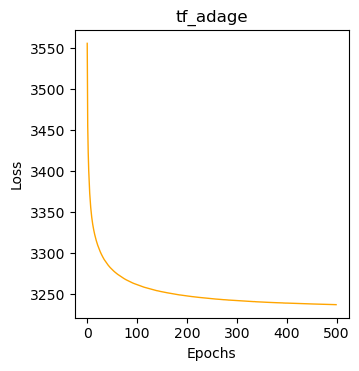

In [9]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict[name]
ax.plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax.set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



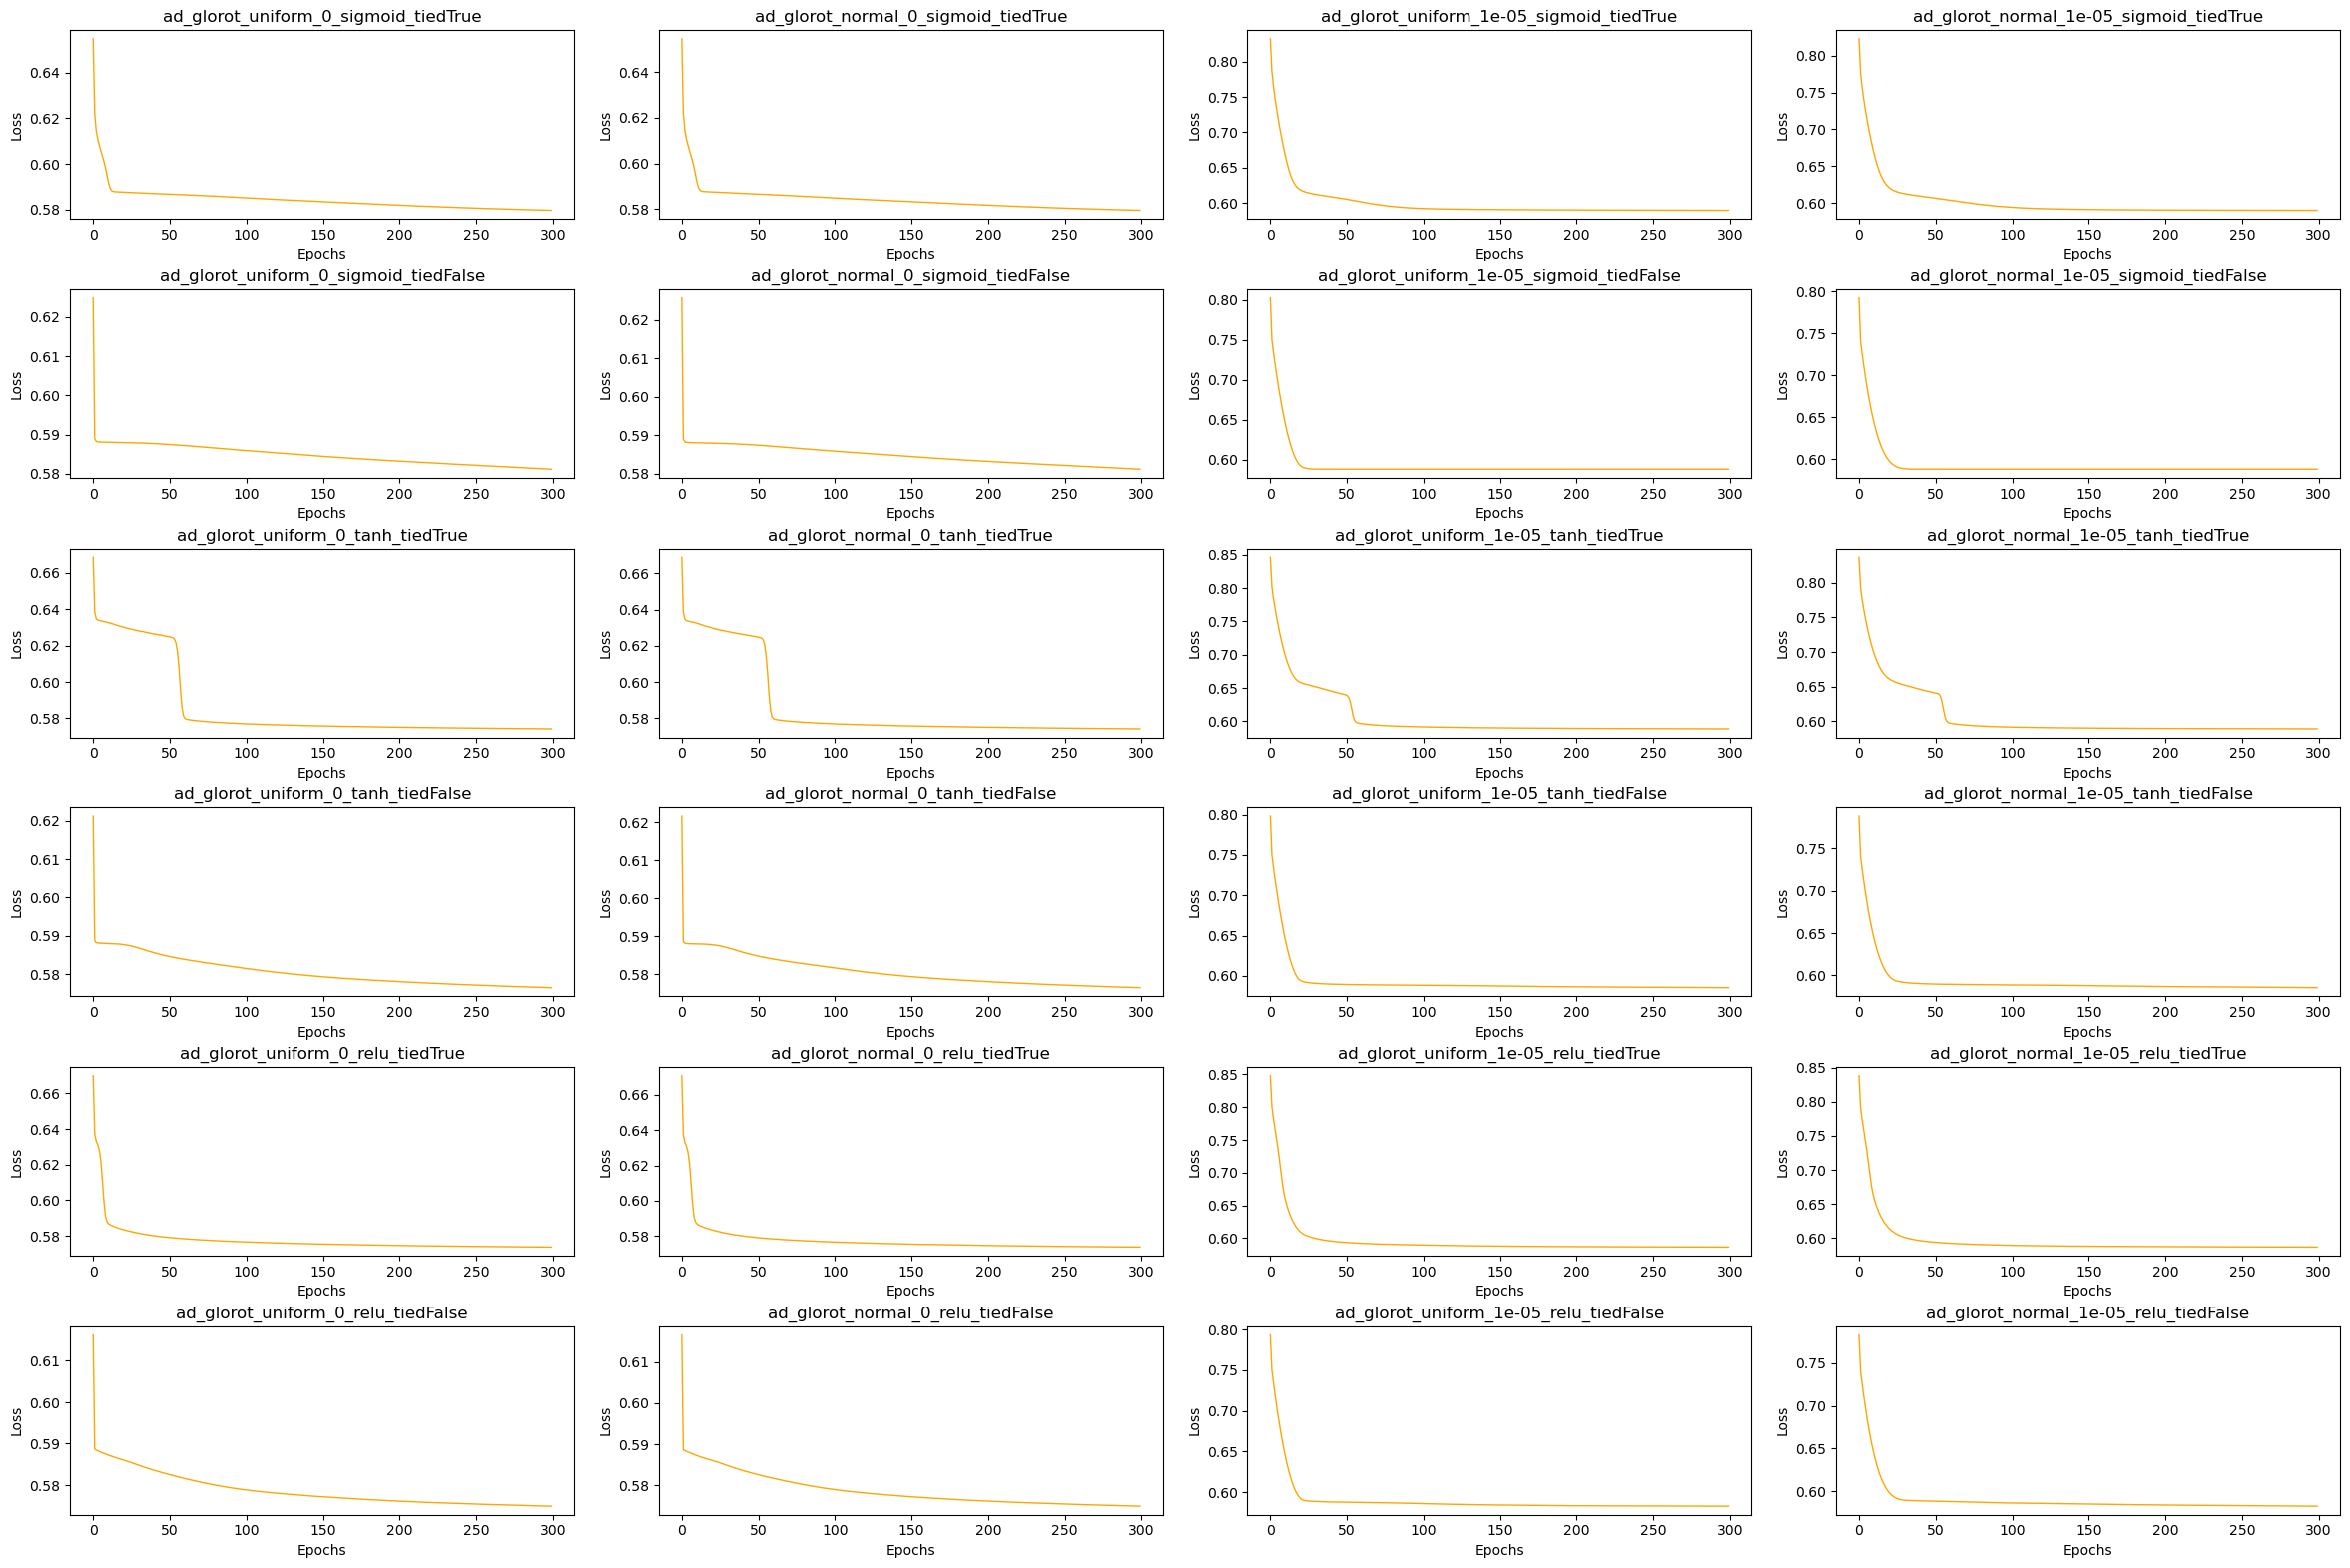

In [10]:
model_dict = model_dict_seq2

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,300)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

In [ ]:
fig.savefig('loss_array.png')

*Takeaway*: Both models reach asymptotes though TF ADAGE has a sharper elbow, perhaps due to L1?

### 2. Node weight dists

We expect the node weights to follow a *certain* distribution and this has bene important for our definition of 'high weight genes' and our interpretation of ADAGE models. 

In [11]:
model_dict = model_dict_seq2

In [12]:
model_dict.keys()

dict_keys(['tf_adage', 'ad_glorot_uniform_0_sigmoid_tiedTrue', 'ad_glorot_uniform_0_sigmoid_tiedFalse', 'ad_glorot_uniform_0_tanh_tiedTrue', 'ad_glorot_uniform_0_tanh_tiedFalse', 'ad_glorot_uniform_0_relu_tiedTrue', 'ad_glorot_uniform_0_relu_tiedFalse', 'ad_glorot_uniform_1e-05_sigmoid_tiedTrue', 'ad_glorot_uniform_1e-05_sigmoid_tiedFalse', 'ad_glorot_uniform_1e-05_tanh_tiedTrue', 'ad_glorot_uniform_1e-05_tanh_tiedFalse', 'ad_glorot_uniform_1e-05_relu_tiedTrue', 'ad_glorot_uniform_1e-05_relu_tiedFalse', 'ad_glorot_normal_0_sigmoid_tiedTrue', 'ad_glorot_normal_0_sigmoid_tiedFalse', 'ad_glorot_normal_0_tanh_tiedTrue', 'ad_glorot_normal_0_tanh_tiedFalse', 'ad_glorot_normal_0_relu_tiedTrue', 'ad_glorot_normal_0_relu_tiedFalse', 'ad_glorot_normal_1e-05_sigmoid_tiedTrue', 'ad_glorot_normal_1e-05_sigmoid_tiedFalse', 'ad_glorot_normal_1e-05_tanh_tiedTrue', 'ad_glorot_normal_1e-05_tanh_tiedFalse', 'ad_glorot_normal_1e-05_relu_tiedTrue', 'ad_glorot_normal_1e-05_relu_tiedFalse'])

/var/folders/23/gpbbzdn96nlby7kskvw28xs08dysdg/T/ipykernel_97511/4130246958.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],


[Text(0.5, 1.0, 'tf_adage')]

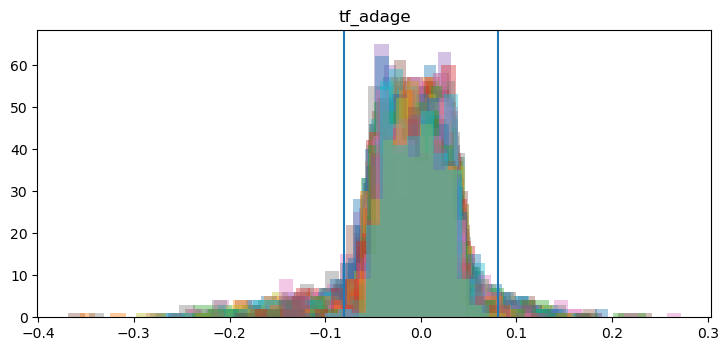

In [13]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict['ad_glorot_uniform_0_sigmoid_tiedTrue']
for node in range(0,300):
    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
    ax=ax,
    hist=True,
    kde=False,
    rug=False)
ax.axvline(x = np.std(model_temp.weights)*2.5)
ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')




In [ ]:
fig.savefig('weight_dists_adage.png')

/var/folders/23/gpbbzdn96nlby7kskvw28xs08dysdg/T/ipykernel_97511/849172654.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],


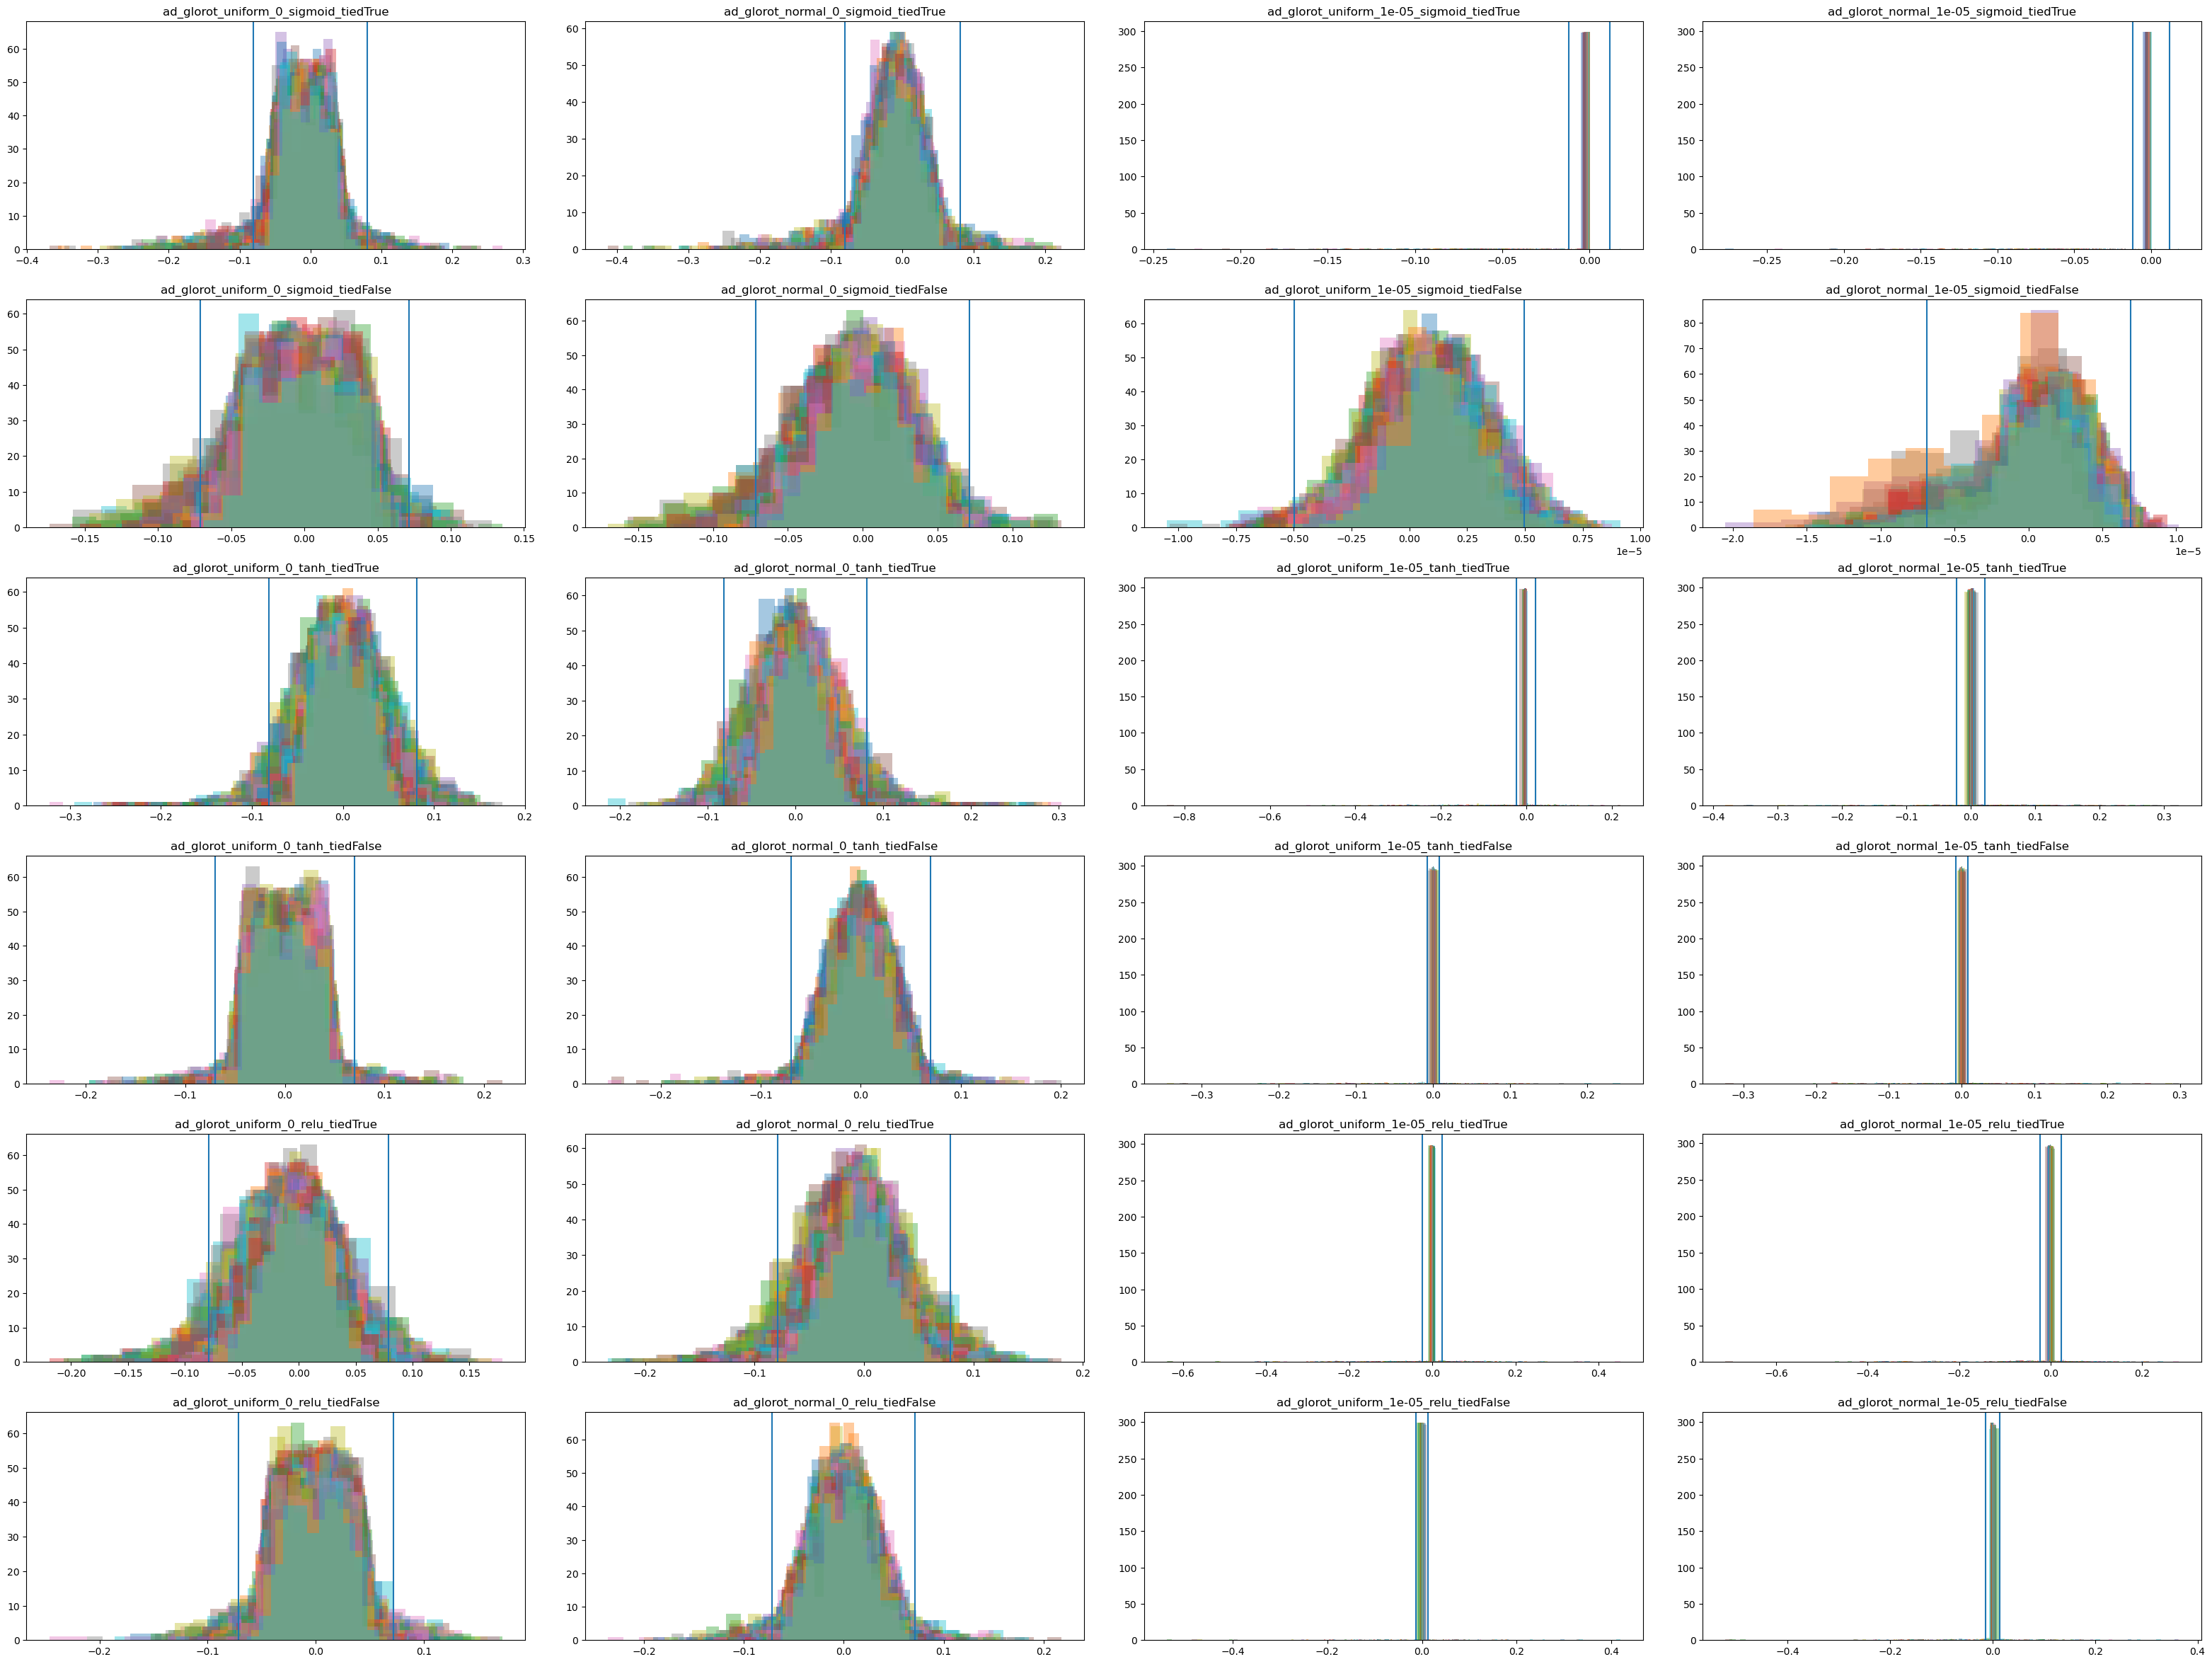

In [14]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


    

In [36]:
fig.savefig('weight_dists_array.png')

[Text(0.5, 1.0, 'ad_glorot_normal_1e-05_relu_tiedFalse')]

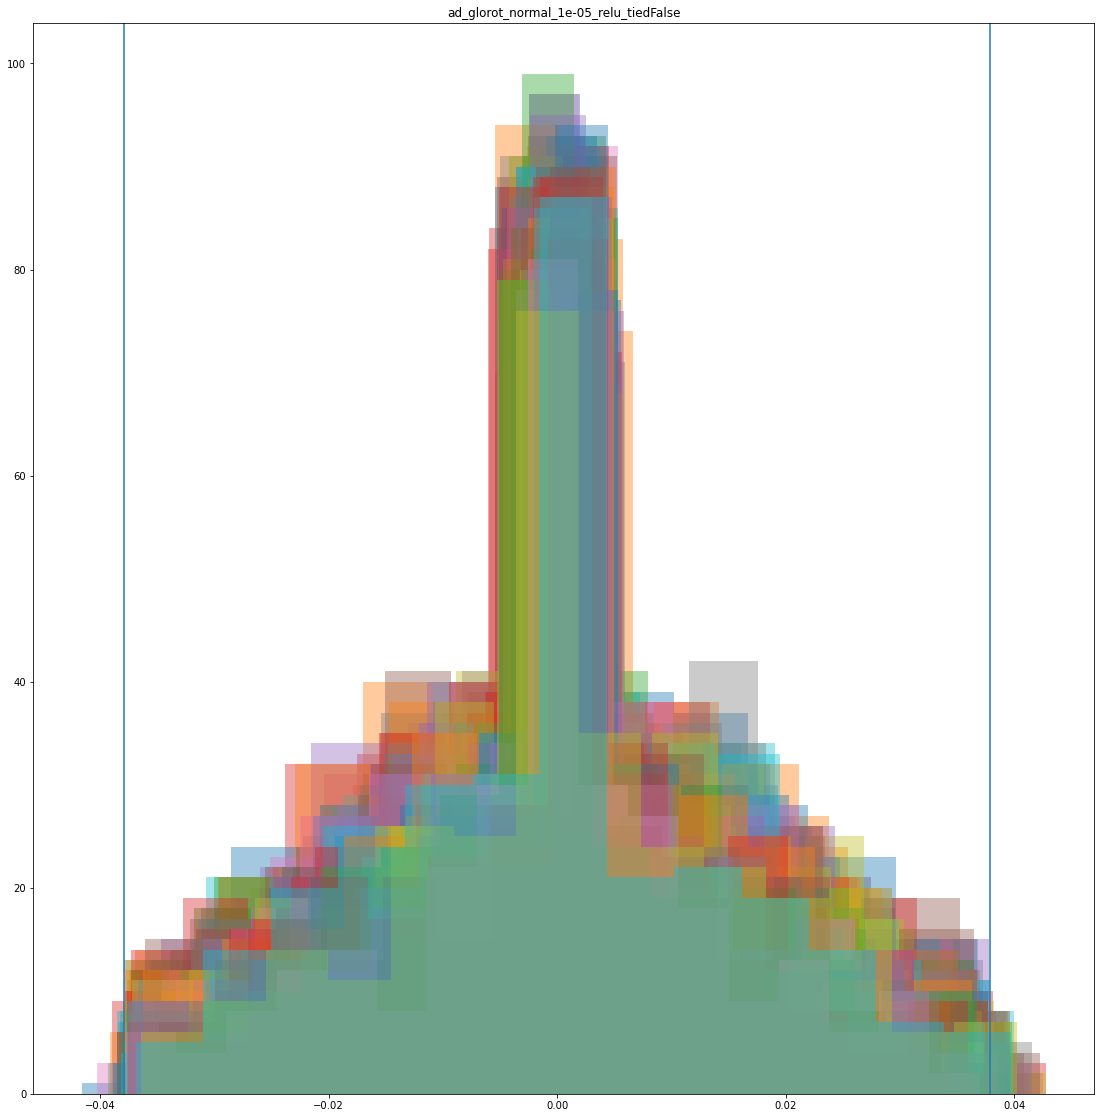

In [70]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *16))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) # + str(460)
                #print(name)
name = 'ad_glorot_normal_1e-05_relu_tiedFalse'
model_temp = model_dict2[name]
for node in range(0,300):
    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
    ax=ax,
    hist=True,
    kde=False,
    rug=False)
ax.axvline(x = np.std(model_temp.weights)*2.5)
ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



In [68]:
fig.savefig('single_weight_dist_skewed.png')

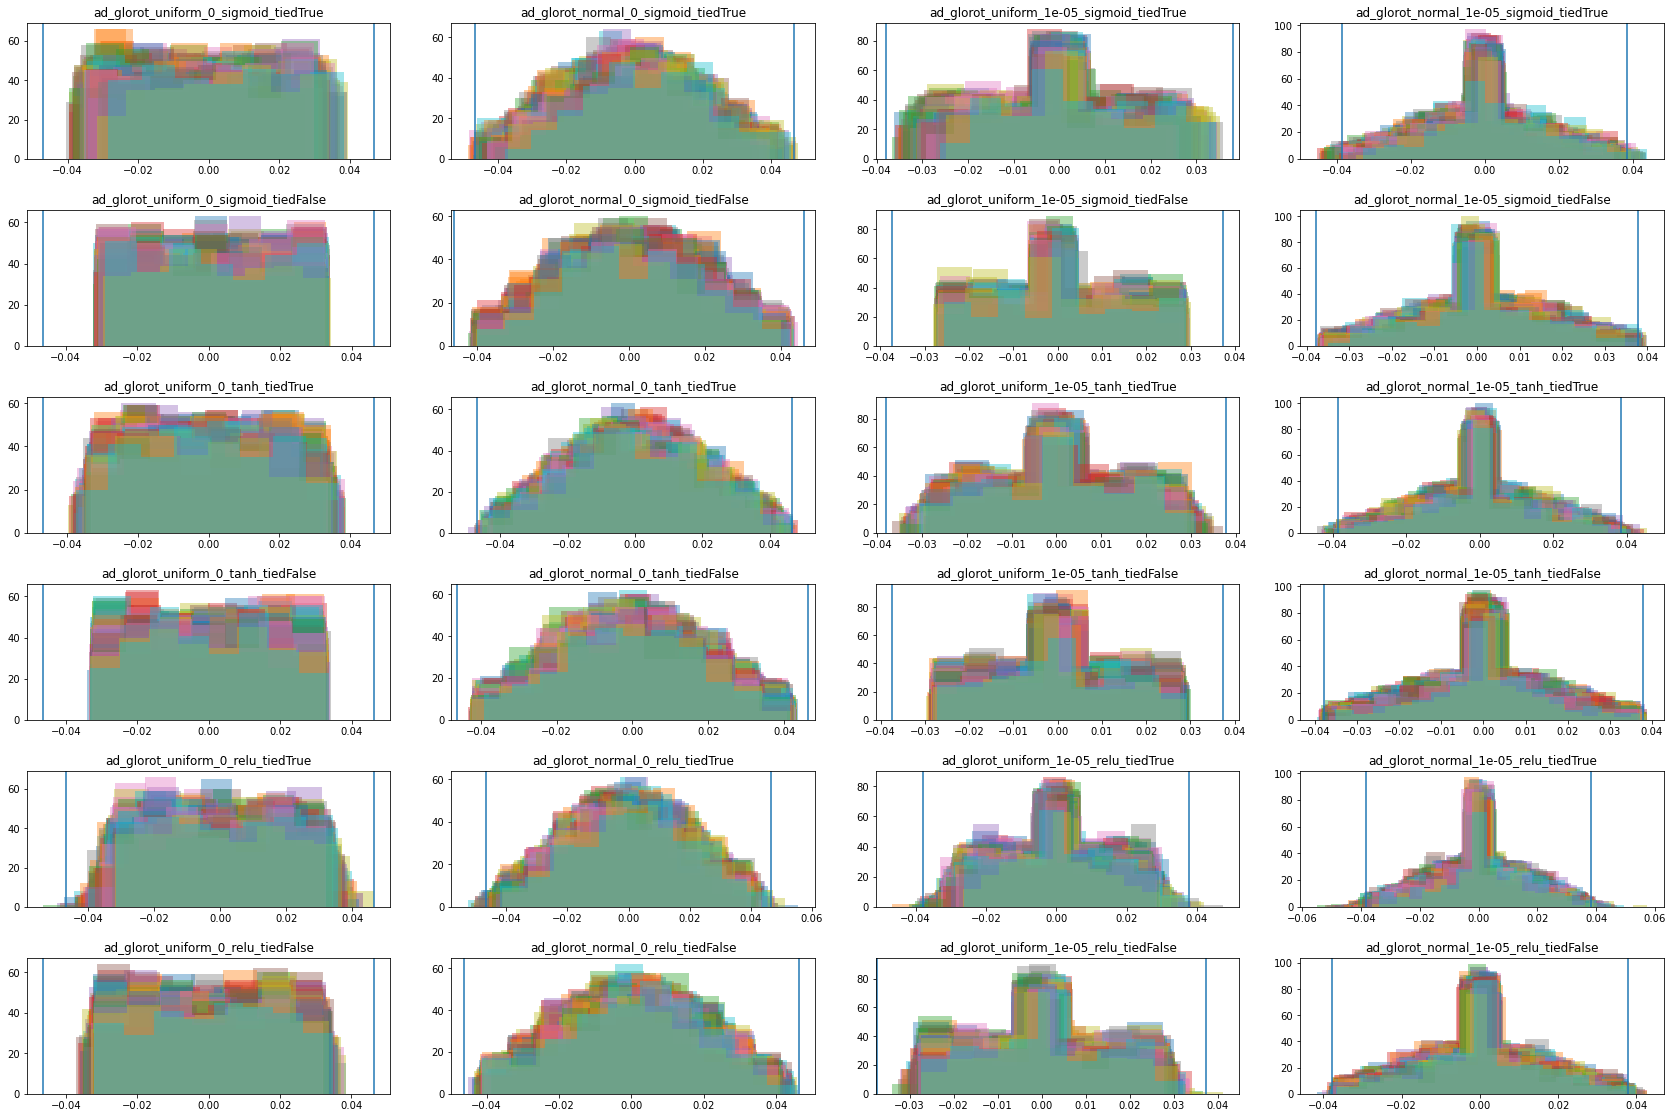

In [71]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


In [ ]:
fig.savefig('weight_dist_seq.png')

In [ ]:
### Signature sizes

[Text(0.5, 1.0, 'tf_adage'),
 Text(0.5, 15.0, '# HW genes'),
 Text(9.0, 0.5, '# Nodes')]

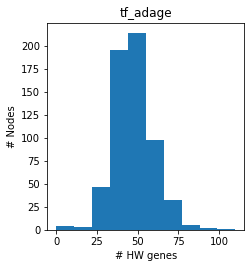

In [72]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

name = 'tf_adage'
model_temp = model_dict[name]
ax.hist(model_temp.hw_genes_all.sum(0))
ax.set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
#ax.set_yscale('log')


In [ ]:
fig.savefig('sig_sizes_adage.png')

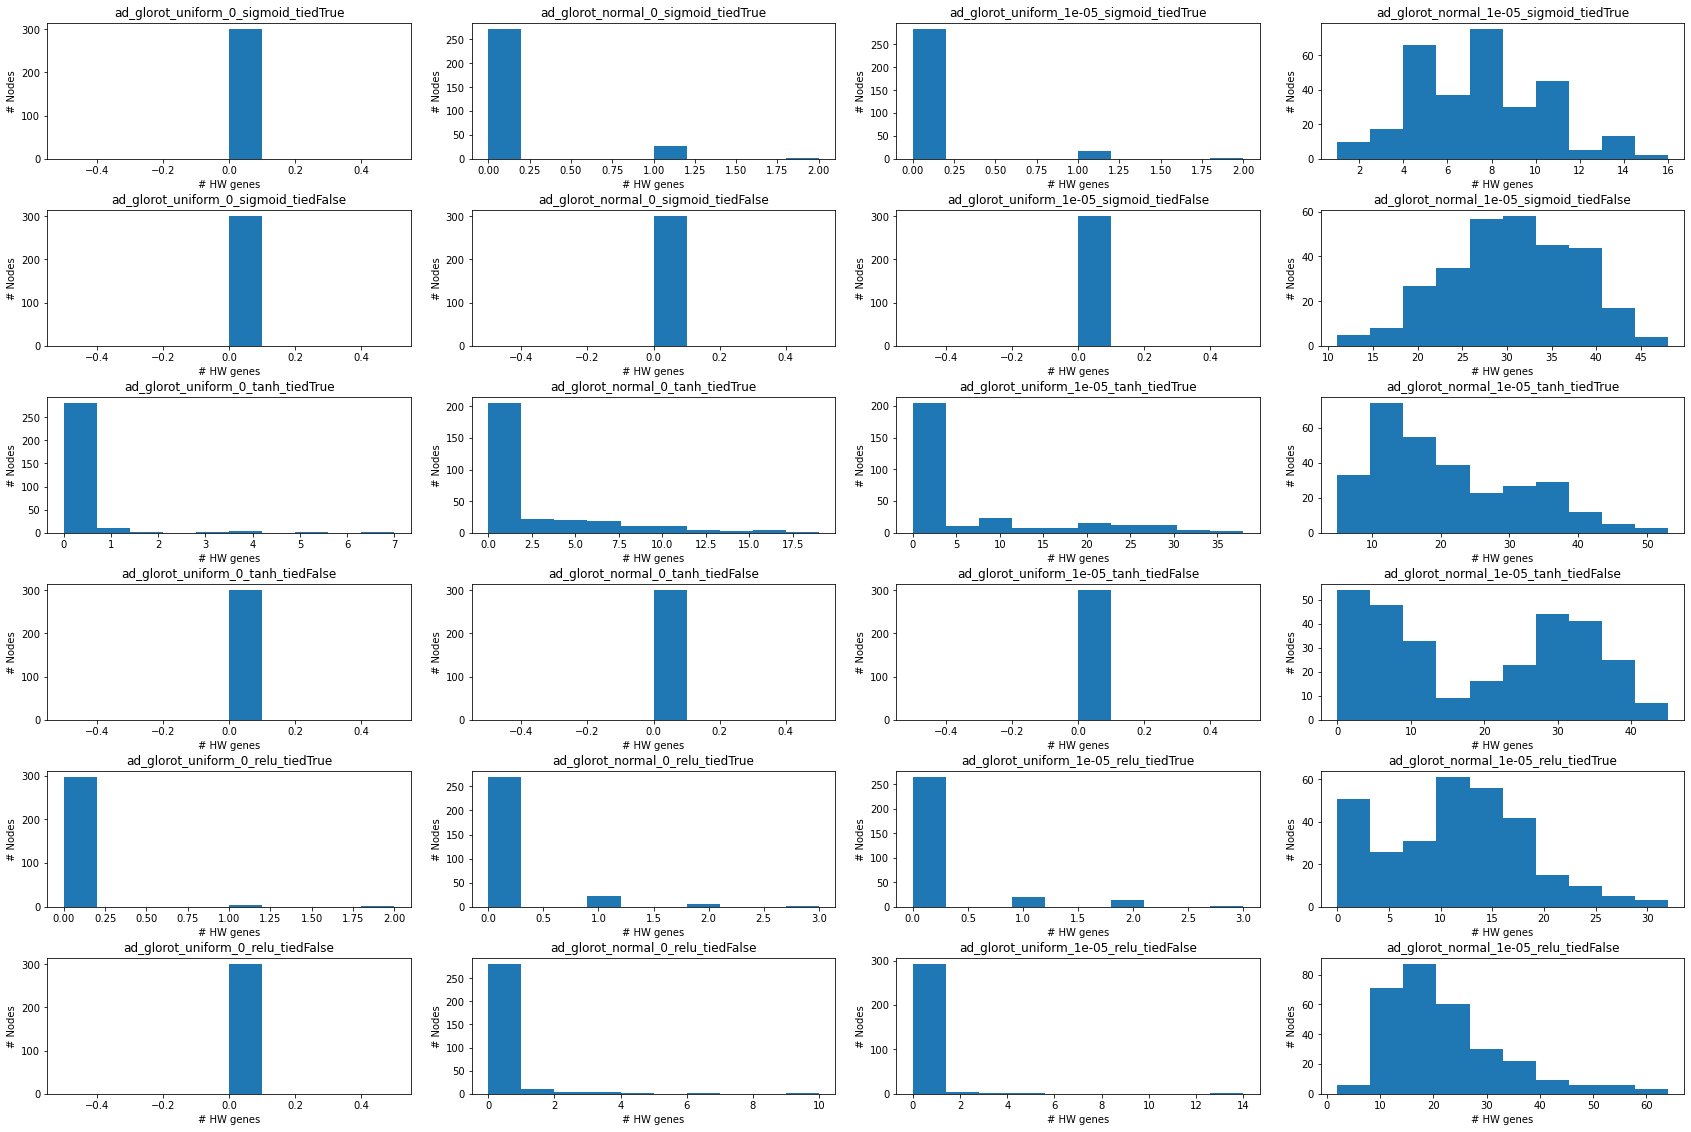

In [73]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_seq2[name]
                ax[xi,yi].hist(model_temp.hw_genes.sum(0))
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1


    

In [ ]:
fig.savefig('sig_sizes_array.png')

[Text(0.5, 1.0, 'tf_adage'),
 Text(0.5, 15.0, '# HW genes'),
 Text(9.0, 0.5, '# Nodes')]

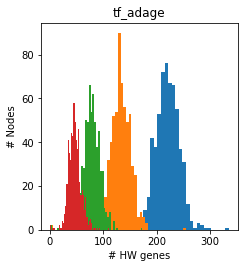

In [74]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict[name]
for c in [1.75,2,2.25,2.5]:
    model_temp.set_hwg_cutoff(c)
    ax.hist(model_temp.hw_genes_all.sum(0), bins=50)
ax.set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
#ax.set_yscale('log')



In [ ]:
fig.savefig('hwgs_grad_adage.png')

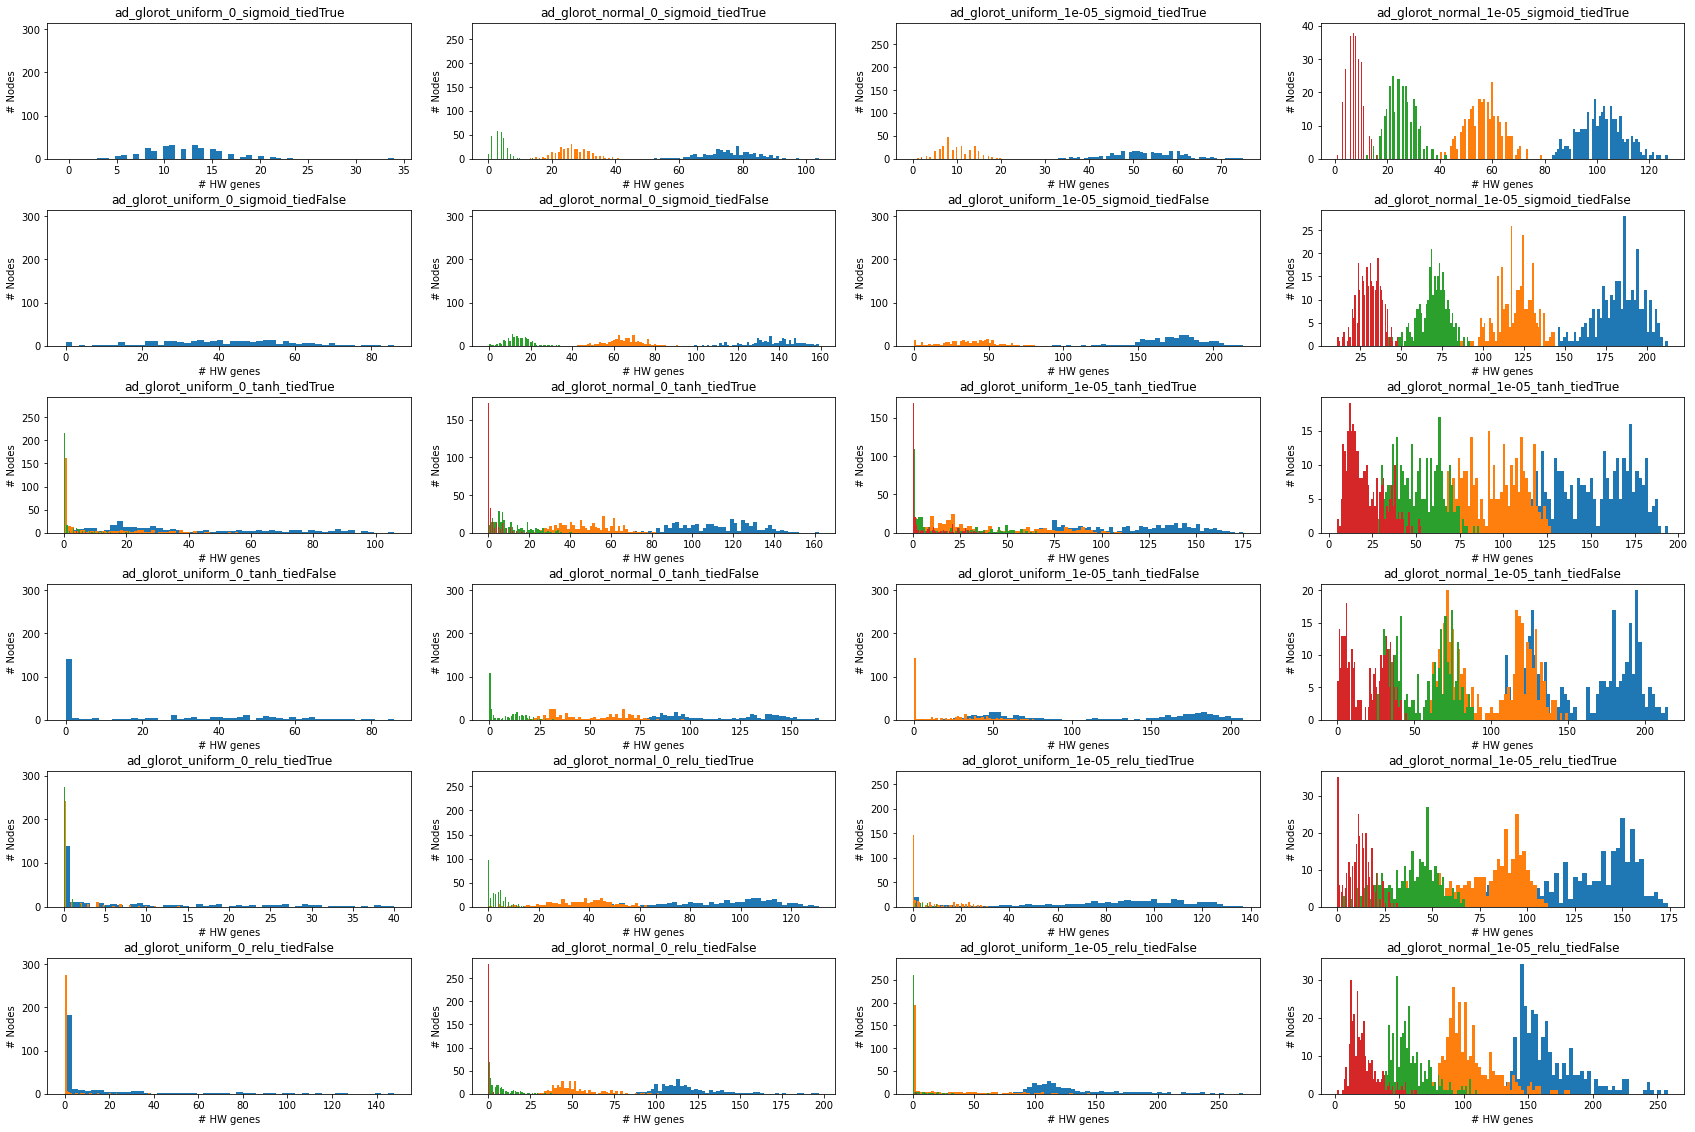

In [75]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_seq2[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                for c in [1.75,2,2.25,2.5]:
                    model_temp.set_hwg_cutoff(c)
                    ax[xi,yi].hist(model_temp.hw_genes.sum(0), bins=50)

                xi = xi+1
        yi=yi+1

In [ ]:
fig.savefig('hwgs_grad_array.png')

*Takeaway*: TF ADAGE may have a wider range of distributions and one *curious" node, though it is hard to say which distribution is "better" without looking at the genes themselves.

### 3. Node KEGG and GO enrichemnts

One of the primary ways we assess ADAGE models is enrichment analyses of each node for KEGG and GO pathways. Based on ADAGE, ADAGE2 and eADAGE we expect over three-quarters of the KEGG pathways to be enriched in at least one node and about half of nodes to be have enrichemnt for at least one KEGG pathway.

In [52]:
model_dict2['tf_adage'].set_hwg_cutoff(2.5)
model_dict2['tf_adage'].set_reg('node_interpretation/regulons_format.txt')
#model_dict[m].set_go('node_interpretation/regulons_format.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'node_interpretation/regulons_format.txt'

In [ ]:

for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    model_dict[m].set_op('node_interpretation/operons_format.txt')
    model_dict[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    model_dict[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    model_dict[m].set_reg('node_interpretation/regulons_format.txt')
  


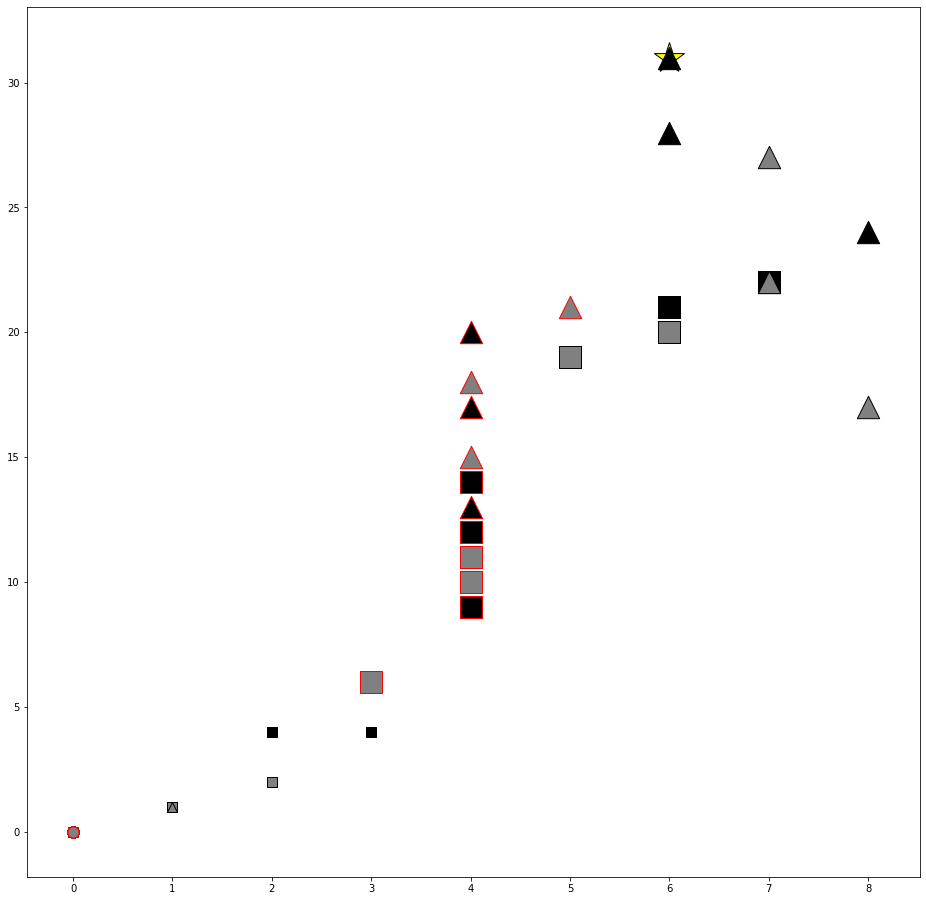

In [123]:
plimk=30
plimg=30
plimr=30
plimo=30
xd=4
yd=4
fig, ax = plt.subplots(xd,yd,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[1,2].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[2,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[2,2].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[1,2].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[2,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                    y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[2,2].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



In [161]:
total_kegg = []
node_rep = []
names = []
for m in model_d:
    total_kegg.append(((model_d[m].kegg_ps > 10).sum(0) > 0).sum())
    node_rep.append(((model_d[m].kegg_ps > 10).sum(1) > 0).sum())
    names.append(m)
    #print(m + '\n\t' + str(((model_d[m].kegg_ps > 10).sum(0) > 0).sum()) + '\t' + str(((model_d[m].kegg_ps > 10).sum(1) > 0).sum()))
    

fig, ax = plt.subplots()
ax.scatter(total_kegg, node_rep)

i=0
for x,y in zip(total_kegg, node_rep):
    label = names[i]
    if(i < 24):
        ax.annotate(label,(x,y))
    i = i+1
ax.set_xlabel('# KEGG Pathways represented', fontsize=15)
ax.set_ylabel('# Nodes with Pathways', fontsize=15)


NameError: name 'model_d' is not defined

In [162]:
model_temp = model_dict['tf_adage']

hw_gene_lists = []
for n in range(model_temp.hw_genes.shape[1]):
    genes_temp = ['node'+str(n)]
    weights_temp = [1]
    for g in range(model_temp.hw_genes.shape[0]):
        if(model_temp.hw_genes[g,n]):
            #print(g)
            genes_temp.append(model_temp.compendium.index[g])
            weights_temp.append(model_temp.weights[g,n])
    genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
    hw_gene_lists.append(genes_temp_sorted)
    

In [ ]:
hw_gene_lists[1]

In [ ]:
#write_data('test_hwgs.csv', hw_gene_lists)
with open("adage_hwgs.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(hw_gene_lists)

In [ ]:
model_temp = model_dict['tf_adage']

hw_gene_lists = []
for n in range(model_temp.hw_genes.shape[1]):
    genes_temp = ['node'+str(n)]
    weights_temp = [1]
    for g in range(model_temp.hw_genes.shape[0]):
        if(model_temp.hw_genes[g,n]):
            #print(g)
            genes_temp.append(model_temp.compendium.index[g])
            weights_temp.append(model_temp.weights[g,n])
    genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
    hw_gene_lists.append(genes_temp_sorted)
hw_gene_lists[1]
#write_data('test_hwgs.csv', hw_gene_lists)
with open("adage_hwgs.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(hw_gene_lists)

In [ ]:
total_kegg = []
node_rep = []
names = []
for m in model_d:
    total_kegg.append(((model_d[m].kegg_ps > 10).sum(0) > 0).sum())
    node_rep.append(((model_d[m].kegg_ps > 10).sum(1) > 0).sum())
    names.append(m)
    #print(m + '\n\t' + str(((model_d[m].kegg_ps > 10).sum(0) > 0).sum()) + '\t' + str(((model_d[m].kegg_ps > 10).sum(1) > 0).sum()))
    

fig, ax = plt.subplots()
ax.scatter(total_kegg, node_rep)

i=0
for x,y in zip(total_kegg, node_rep):
    label = names[i]
    if(i < 24):
        ax.annotate(label,(x,y))
    i = i+1
ax.set_xlabel('# KEGG Pathways represented', fontsize=15)
ax.set_ylabel('# Nodes with Pathways', fontsize=15)


In [ ]:
model_dict

KeyError: 'ad_glorot_uniform_0_sigmoid_tiedTrue460'

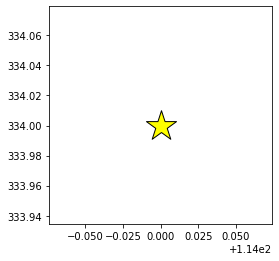

In [114]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.regs_ps > 10).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > 10).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'




In [ ]:

for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    model_dict[m].set_go('node_interpretation/regulons_format.txt')
#model_dict['tf_adage'].set_hwg_cutoff(2.5)
#model_dict['tf_adage'].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')    




In [ ]:
plim = 30

fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].go_ps > plim).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plim).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.go_ps > plim).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plim).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    ax.set(title = m, xlabel = '# Regulons', ylabel = '# Nodes')

                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'


In [ ]:

fig.savefig('regulon_summary_array.png')

In [ ]:

fig, ax = plt.subplots(len(model_d), 2,figsize=(10,3*len(model_d)))
fig.tight_layout(pad=3.0)

#ax[0].plot(list(range(0,500)), tf_adage.loss,'go-', linewidth=1, markersize=2)
#ax[0].set(title = 'TF', xlabel = 'Epochs', ylabel = 'Cost')
i = 0
for m in model_d:
    ax[i,0].hist((model_d[m].kegg_ps > 10).sum(0))
    ax[i,0].set(title = m, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
    ax[i,1].hist((model_d[m].kegg_ps > 10).sum(1))
    ax[i,1].set(title = m, xlabel = '# Pathways in Node', ylabel = '# Nodes')
    i = i+1

In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(0))
                ax[xi,yi].set(title = name, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
                xi = xi+1
        yi=yi+1



In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(0))
                ax[xi,yi].set(title = name, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
                xi = xi+1
        yi=yi+1


yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(1))
                ax[xi,yi].set(title = name, xlabel = '# Pathways in Node', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1



In [ ]:
fig.savefig('kegg_details.png')

*Takeaway*: This is where the red flag really stands out. Using Keras there was nearly no enrichemnt for any pathways in any nodes at all, perhaps what one would expect using randomly permuted weights? It could be nice to get a good pre- and post- training picture, but I think it is safe to say something has missed the boat.

## seqADAGE

Although the above comparison suggests an error in the Keras workflow, below I have outlines the training of a Keras model on the RNAseq compendium in anticipation of an re-iterative analysis going forward with promising edits.

In [ ]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
seq_comp = np.loadtxt(open('data_files/refine_bio_seq_clean.csv', "rb"),delimiter=',',skiprows = 1)
seq_gene_num = np.size(seq_comp, 0)
seq_samp_num = np.size(seq_comp, 1)
print(seq_gene_num, seq_samp_num)

In [ ]:
fig = sns.distplot(seq_comp)

In [ ]:
fig.figure.savefig('seq_dist01.png')

In [ ]:
seq_adage = run_model.run_model('data_files/refine_bio_seq_with_gene_names.csv',seed=460,kl1=0,act='relu', tied=True, epochs=500, init = 'glorot_normal')

In [ ]:
model_d = {
    "tf_adage": tf_adage,
    "keras" : keras_adage,
    "keras_L1" : keras_adage_L1,
    'seq_adage': seq_adage
}

for m in model_d:
    print(model_d[m])

In [ ]:
model_dict_seq = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                m = run_model.run_model('data_files/refine_bio_seq_01_with_names.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i, batch_size=100)
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                print(name)
                model_dict_seq[name] = m

In [164]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict_seq = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                for s in range(3):
                    seed = str(460 + s)
                    #print(t)
                    #m = run_model.run_model('data_files/train_set_normalized.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    prefix = 'data_files/refine_bio_seq_01_with_names_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t) + '_batch:' + str(batch)
                    #print(prefix)
                    weights_temp = np.array(pandas.read_csv('outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pandas.read_csv('outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pandas.read_csv('outputs/' + prefix + '_val_loss.csv', header = None))
                    adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_dict_seq[name] = adage_temp
          
                    


In [165]:
model_dict_seq

{'tf_adage': <Adage.Adage at 0x7f6bffe070d0>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue460': <Adage.Adage at 0x7f6ca14fce50>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue461': <Adage.Adage at 0x7f6ca14fc090>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue462': <Adage.Adage at 0x7f6c41b93510>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse460': <Adage.Adage at 0x7f6c48c23cd0>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse461': <Adage.Adage at 0x7f6b994f4e50>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse462': <Adage.Adage at 0x7f6ca80164d0>,
 'ad_glorot_uniform_0_tanh_tiedTrue460': <Adage.Adage at 0x7f6c41b98ad0>,
 'ad_glorot_uniform_0_tanh_tiedTrue461': <Adage.Adage at 0x7f6c41b98750>,
 'ad_glorot_uniform_0_tanh_tiedTrue462': <Adage.Adage at 0x7f6c073d31d0>,
 'ad_glorot_uniform_0_tanh_tiedFalse460': <Adage.Adage at 0x7f6c073d3b10>,
 'ad_glorot_uniform_0_tanh_tiedFalse461': <Adage.Adage at 0x7f6c073d3c90>,
 'ad_glorot_uniform_0_tanh_tiedFalse462': <Adage.Adage at 0x7f6c073d3b50>,
 'ad_glorot_uniform_0_relu_tiedTrue460': <

In [ ]:
model_d = model_dict_seq

In [ ]:

fig, ax = plt.subplots(len(model_d), 1,figsize=(6,3*len(model_d)))
fig.tight_layout(pad=3.0)

#ax[0].plot(list(range(0,500)), tf_adage.loss,'go-', linewidth=1, markersize=2)
#ax[0].set(title = 'TF', xlabel = 'Epochs', ylabel = 'Cost')
i = 0
for m in model_d:
    ax[i].plot(list(range(0,500)), model_d[m].loss, 'go-', linewidth=1, markersize=2, color = 'orange')
    ax[i].set(title = m, xlabel = 'Epochs', ylabel = 'Loss')
    i = i+1

In [ ]:
fig.savefig('seq_loss.png')

In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
                model_temp = model_dict_seq[name]
                ax[xi,yi].plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1



In [ ]:
fig.savefig('loss_seq.png')

In [ ]:
fig, ax = plt.subplots(len(model_d), 1,figsize=(6,3*len(model_d)))
fig.tight_layout(pad=3.0)


i = 0
for m in model_d:
    #ax[i].sns.distplot(list(range(0,500)), model_d[m].weights[0], 'go-', linewidth=1, markersize=2, color = 'orange')
    ax[i].set(title = m, xlabel = 'Weight', ylabel = 'Density')
    for node in range(0,300):
        sns.distplot(model_d[m].weights[node],
            ax=ax[i],
            hist=False,
            kde=True,
            rug=False)
    i = i+1

In [ ]:
fig.savefig('seq_weight_dist.png')

In [ ]:
fig, ax = plt.subplots(len(model_d), 1,figsize=(6,3*len(model_d)))
fig.tight_layout(pad=3.0)

#ax[0].plot(list(range(0,500)), tf_adage.loss,'go-', linewidth=1, markersize=2)
#ax[0].set(title = 'TF', xlabel = 'Epochs', ylabel = 'Cost')
i = 0
for m in model_d:
    ax[i].hist(model_d[m].hw_genes.sum(0))
    ax[i].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
    i = i+1

In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
                model_temp = model_dict_seq[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1



In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
                model_temp = model_dict_seq[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                for c in [1.75,2,2.25,2.5]:
                    model_temp.set_hwg_cutoff(c)
                    ax[xi,yi].hist(model_temp.hw_genes.sum(0), bins=50)

                xi = xi+1
        yi=yi+1

In [ ]:
fig.savefig('seq_sig_sizes.png')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.kegg_ps > 10).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > 10).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'


In [ ]:

for m in model_d:
    model_d[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')

In [ ]:
for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '.', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(1):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) 
                    print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.kegg_ps > 10).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > 10).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=200
    c = 'grey'



In [ ]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '.', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi=0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:

                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) 
                print(name)
                model_temp = model_dict_seq[name]
                x = ((model_temp.kegg_ps > 10).sum(0) > 0).sum()
                y = ((model_temp.kegg_ps > 10).sum(1) > 0).sum()
                ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'

In [ ]:
total_kegg = []
node_rep = []
names = []
for m in model_d:
    total_kegg.append(((model_d[m].kegg_ps > 10).sum(0) > 0).sum())
    node_rep.append(((model_d[m].kegg_ps > 10).sum(1) > 0).sum())
    names.append(m)
    #print(m + '\n\t' + str(((model_d[m].kegg_ps > 10).sum(0) > 0).sum()) + '\t' + str(((model_d[m].kegg_ps > 10).sum(1) > 0).sum()))
    

fig, ax = plt.subplots()
ax.scatter(total_kegg, node_rep)

i=0
for x,y in zip(total_kegg, node_rep):
    label = names[i]
    if(i < 24):
        ax.annotate(label,(x,y))
    i = i+1
ax.set_xlabel('# KEGG Pathways represented', fontsize=15)
ax.set_ylabel('# Nodes with Pathways', fontsize=15)



In [ ]:
fig.savefig('seq_kegg_summary.png')

In [ ]:

fig, ax = plt.subplots(len(model_d), 2,figsize=(8,3*len(model_d)))
fig.tight_layout(pad=3.0)

#ax[0].plot(list(range(0,500)), tf_adage.loss,'go-', linewidth=1, markersize=2)
#ax[0].set(title = 'TF', xlabel = 'Epochs', ylabel = 'Cost')
i = 0
for m in model_d:
    ax[i,0].hist((model_d[m].kegg_ps > 10).sum(0))
    ax[i,0].set(title = m, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
    ax[i,1].hist((model_d[m].kegg_ps > 10).sum(1))
    ax[i,1].set(title = m, xlabel = '# Pathways in Node', ylabel = '# Nodes')
    i = i+1

In [ ]:
fig.savefig('seq_kegg_details.png')

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict = {
    "tf_adage": tf_adage
}

for seed in range(10):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    m = run_model.run_model('data_files/refine_bio_seq_01_with_names.csv',seed=seed+460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                    print(name)
                    model_dict_seq[name] = m
                    
for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict_seq = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                for s in range(10):
                    seed = str(460 + s)
                    #print(t)
                    #m = run_model.run_model('data_files/train_set_normalized.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    prefix = 'data_files/refine_bio_seq_01_with_names_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t)
                    #print(prefix)
                    weights_temp = np.array(pandas.read_csv('outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pandas.read_csv('outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pandas.read_csv('outputs/' + prefix + '_val_loss.csv', header = None))

                    adage_temp = Adage.Adage(keras_adage.autoencoder, keras_adage.history, keras_adage.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    print(name)
                    model_dict_seq[name] = adage_temp
                    
model_dict_seq

In [ ]:
for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')

In [ ]:
model_temp = model_dict_seq['ad_glorot_uniform_0_sigmoid_tiedTrue460']

hw_gene_lists = []
for n in range(model_temp.hw_genes.shape[1]):
    genes_temp = ['node'+str(n)]
    weights_temp = [1]
    for g in range(model_temp.hw_genes.shape[0]):
        if(model_temp.hw_genes[g,n]):
            #print(g)
            genes_temp.append(model_temp.compendium.index[g])
            weights_temp.append(model_temp.weights[g,n])
    genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
    hw_gene_lists.append(genes_temp_sorted)
    

In [ ]:
#write_data('test_hwgs.csv', hw_gene_lists)
with open("group8_seq_hwgs.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(hw_gene_lists)

In [ ]:

model_dict_seq

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].kegg_ps > 10).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.kegg_ps > 10).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > 10).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'




In [ ]:
for m in model_dict:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_go('node_interpretation/regulons_format.txt')
#model_dict['tf_adage'].set_hwg_cutoff(2.5)
#model_dict['tf_adage'].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')    


In [ ]:
plim = 8
fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].go_ps > plim).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plim).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.go_ps > plim).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plim).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    #ax[xi,yi].set(title = m, xlabel = '# HW genes', ylabel = '# Nodes')
                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'


In [ ]:
fig.savefig('regulon_summary_seq.png')

## seqADAGE

Although the above comparison suggests an error in the Keras workflow, below I have outlines the training of a Keras model on the RNAseq compendium in anticipation of an re-iterative analysis going forward with promising edits.

In [ ]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict2 = {
    "tf_adage": tf_adage
}
model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(10):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(seed)
                    print(name)
                    mseq = run_model.run_model('data_files/refine_bio_seq_clean_with_names.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=500, init=i)
                    marr = run_model.run_model('data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=500, init=i)

                    model_dict2[name] = marr
                    model_dict_seq2[name] = mseq
                

In [8]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
seq_temp = run_model.run_model('../data_files/refine_bio_seq_clean_with_names.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
arr_temp = run_model.run_model('../data_files/train_set_normalized.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

tensorflow
(5210, 995)
90/90 [==============================] - 2s 15ms/step - loss: 2.4632 - val_loss: 1.8423
(2,)
tensorflow
(5549, 950)
86/86 [==============================] - 2s 19ms/step - loss: 2.2743 - val_loss: 1.6891
(2,)


(5549, 600)

In [16]:
seq_temp.compendium

ERR583485  ERR583486  ERR583487  ERR583488  ERR583489  ERR583490  \
X                                                                          
PA0001   0.671443   0.708615   0.754896   0.692356   0.709740   0.643171   
PA0002   0.475630   0.499940   0.603676   0.499238   0.563537   0.493243   
PA0003   0.527891   0.578327   0.629401   0.579720   0.609309   0.594365   
PA0004   0.524364   0.553934   0.654255   0.560586   0.635635   0.549134   
PA0005   0.327333   0.360534   0.495376   0.407000   0.453617   0.358099   
...           ...        ...        ...        ...        ...        ...   
PA5564   0.375295   0.397557   0.385648   0.366963   0.395829   0.374039   
PA5565   0.677224   0.688574   0.659348   0.580513   0.643933   0.549346   
PA5566   0.166319   0.161202   0.338037   0.261451   0.326882   0.232460   
PA5568   0.671777   0.673660   0.648053   0.615674   0.635533   0.604452   
PA5569   0.528206   0.551225   0.646739   0.496328   0.637053   0.508383   

        ERR583491  ERR583492  ERR583493  ERR583494  ...  SRR10856464  \
X                                                   ...                
PA0001   0.814958   0.813673   0.612071   0.601390  ...     0.713945   
PA0002   0.579042   0.585886   0.461118   0.473614  ...     0.639362   
PA0003   0.731892   0.696162   0.469088   0.481004  ...     0.629865   
PA0004   0.697372   0.712418   0.550984   0.564737  ...     0.744624   
PA0005   0.335235   0.380722   0.325236   0.313923  ...     0.531310   
...           ...        ...        ...        ...  ...          ...   
PA5564   0.398319   0.415448   0.273601   0.252365  ...     0.533213   
PA5565   0.644655   0.652909   0.512445   0.497420  ...     0.724968   
PA5566   0.213960   0.200833   0.176812   0.197625  ...     0.346166   
PA5568   0.676529   0.682554   0.555338   0.547771  ...     0.724803   
PA5569   0.518933   0.563911   0.453450   0.461412  ...     0.633352   

        SRR10856465  SRR10856468  SRR10856475  SRR10856476  SRR10856477  \
X                                                                         
PA0001     0.713606     0.649205     0.656233     0.688644     0.689434   
PA0002     0.653312     0.624799     0.617239     0.651947     0.656096   
PA0003     0.629187     0.548001     0.548130     0.598767     0.602136   
PA0004     0.747036     0.693060     0.690483     0.732670     0.736854   
PA0005     0.529932     0.505435     0.501224     0.503099     0.502439   
...             ...          ...          ...          ...          ...   
PA5564     0.530416     0.447806     0.417744     0.497868     0.506976   
PA5565     0.714228     0.631686     0.620521     0.685616     0.687426   
PA5566     0.376799     0.411912     0.416786     0.331355     0.347427   
PA5568     0.724986     0.668699     0.672685     0.696249     0.702610   
PA5569     0.623829     0.561042     0.551728     0.616899     0.620216   

        SRR10856478  SRR10856479  SRR10856480       NA.  
X                                                        
PA0001     0.671596     0.681038     0.671996  0.668927  
PA0002     0.733395     0.735548     0.636665  0.631781  
PA0003     0.570664     0.565829     0.592751  0.581351  
PA0004     0.728671     0.730206     0.708053  0.699519  
PA0005     0.448920     0.508096     0.543919  0.559678  
...             ...          ...          ...       ...  
PA5564     0.455384     0.459894     0.486245  0.471133  
PA5565     0.644645     0.649773     0.651875  0.647432  
PA5566     0.222948     0.283338     0.451496  0.443314  
PA5568     0.698851     0.692690     0.695474  0.690123  
PA5569     0.656138     0.639071     0.589136  0.588639  

[5210 rows x 995 columns]

In [20]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]

model_dict3 = {
    "tf_adage": tf_adage
}

model_dict_seq3 = {
    "tf_adage": tf_adage
}

for i in inits:
    #print(i)
    for l in L1_norm:
        #print(l)
        for a in act_fun:
            #print(a)
            for t in tied:
                for s in range(3):
                    seed = str(560 + s)
                    #print(t)
                    #m = run_model.run_model('data_files/train_set_normalized.csv',seed=460,kl1=l, act = a, tied = t, epochs=500, init=i)
                    prefix = 'data_files/train_set_normalized_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t)
                    #print(prefix)
                    weights_temp = np.array(pd.read_csv('outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pd.read_csv('outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pd.read_csv('outputs/' + prefix + '_val_loss.csv', header = None))
                    adage_temp = Adage.Adage(tf_adage.autoencoder, tf_adage.history, tf_adage.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_dict3[name] = adage_temp
                    
                    prefix = 'data_files/refine_bio_seq_clean_with_names_seed:' + seed + '_kl1:' + str(l) + '_kl2:0_act:' + a + '_init:' + i + '_ep:500_tied:' + str(t)
                    #print(prefix)
                    weights_temp = np.array(pd.read_csv('outputs/' + prefix + '_en_weights.csv', header = None))
                    loss_temp = np.array(pd.read_csv('outputs/' + prefix + '_loss.csv', header = None))
                    val_loss_temp = np.array(pd.read_csv('outputs/' + prefix + '_val_loss.csv', header = None))
                    adage_temp = Adage.Adage(seq_temp.autoencoder, seq_temp.history, seq_temp.compendium)
                    adage_temp.weights = weights_temp
                    adage_temp.loss = loss_temp[0]
                    adage_temp.val_loss = val_loss_temp[0]
                    adage_temp.set_hwg_cutoff(2.5)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_dict_seq3[name] = adage_temp
          
                    

In [181]:
for m in model_dict_seq2:
    print(m)

tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue
ad_glorot_uniform_0_sigmoid_tiedFalse
ad_glorot_uniform_0_tanh_tiedTrue
ad_glorot_uniform_0_tanh_tiedFalse
ad_glorot_uniform_0_relu_tiedTrue
ad_glorot_uniform_0_relu_tiedFalse
ad_glorot_uniform_1e-05_sigmoid_tiedTrue
ad_glorot_uniform_1e-05_sigmoid_tiedFalse
ad_glorot_uniform_1e-05_tanh_tiedTrue
ad_glorot_uniform_1e-05_tanh_tiedFalse
ad_glorot_uniform_1e-05_relu_tiedTrue
ad_glorot_uniform_1e-05_relu_tiedFalse
ad_glorot_normal_0_sigmoid_tiedTrue
ad_glorot_normal_0_sigmoid_tiedFalse
ad_glorot_normal_0_tanh_tiedTrue
ad_glorot_normal_0_tanh_tiedFalse
ad_glorot_normal_0_relu_tiedTrue
ad_glorot_normal_0_relu_tiedFalse
ad_glorot_normal_1e-05_sigmoid_tiedTrue
ad_glorot_normal_1e-05_sigmoid_tiedFalse
ad_glorot_normal_1e-05_tanh_tiedTrue
ad_glorot_normal_1e-05_tanh_tiedFalse
ad_glorot_normal_1e-05_relu_tiedTrue
ad_glorot_normal_1e-05_relu_tiedFalse
ad_glorot_uniform_0_sigmoid_tiedTrue560
ad_glorot_uniform_0_sigmoid_tiedTrue561
ad_glorot_uniform_0_sig

#### Training loss curves

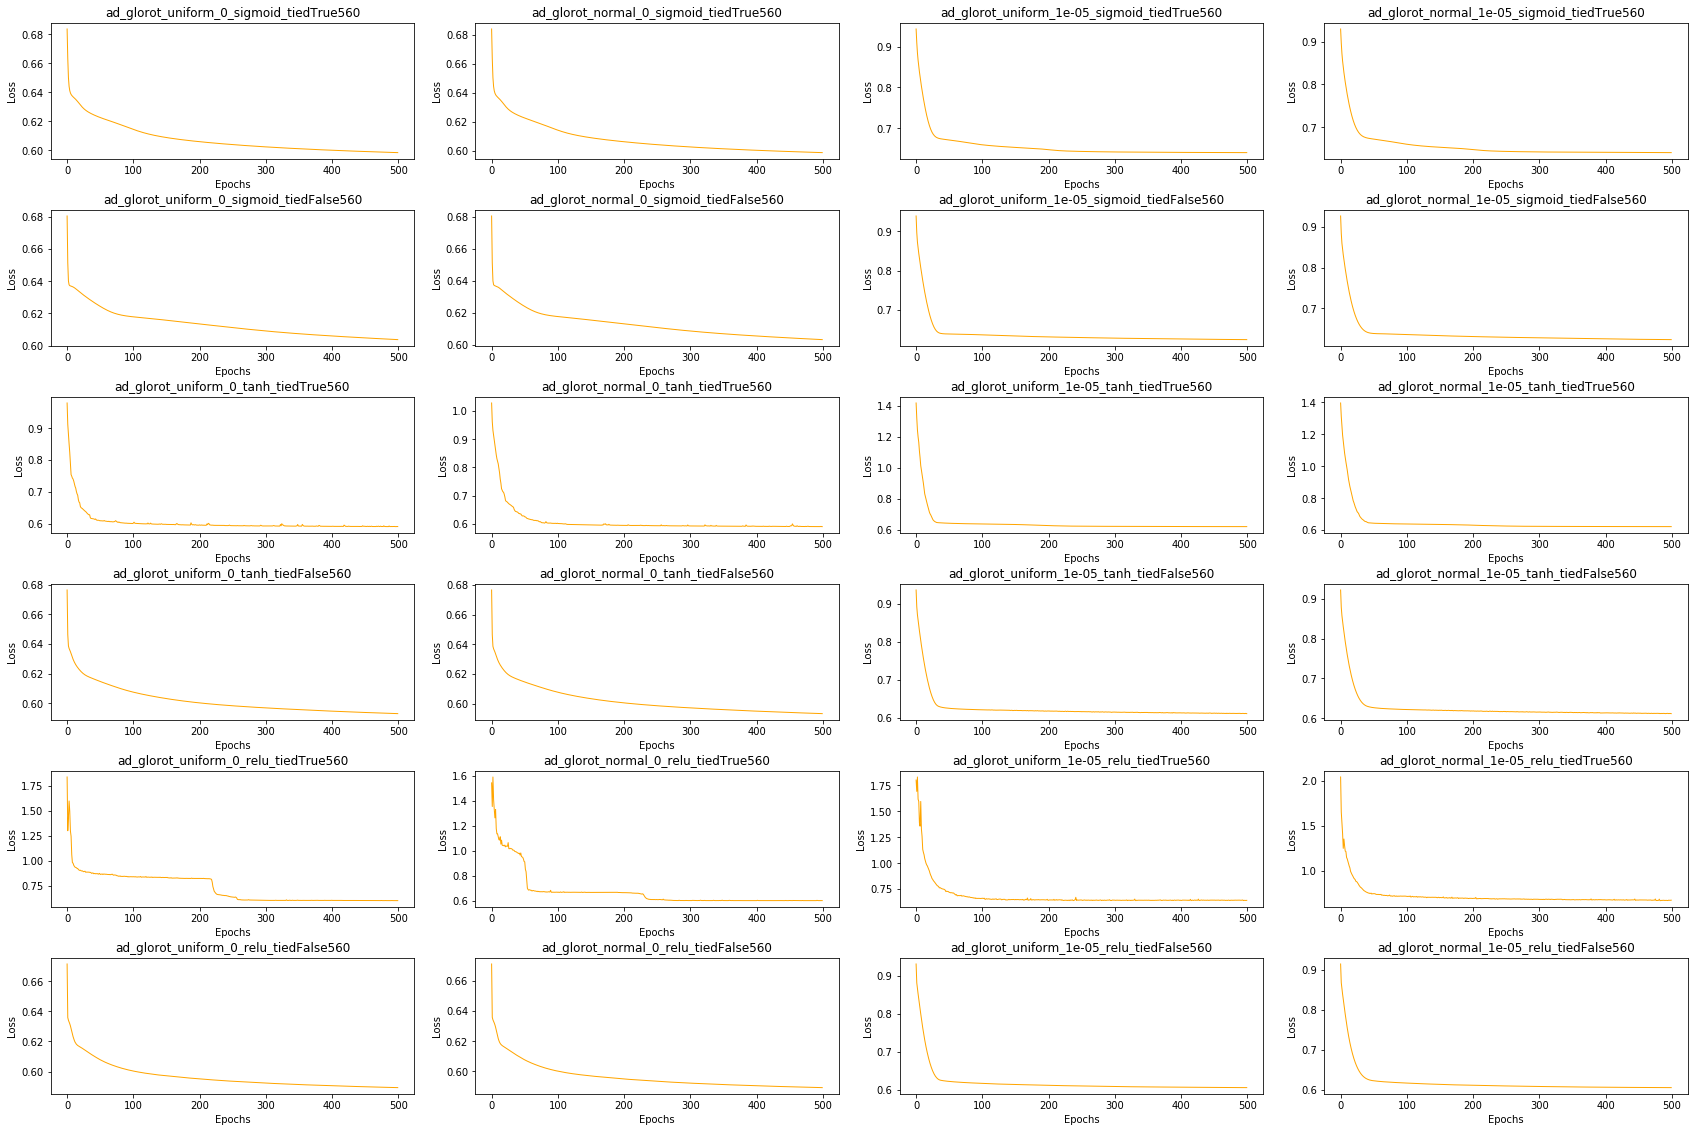

In [535]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict2[name]
                ax[xi,yi].plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


In [ ]:
fig.savefig('training_loss_array.png')

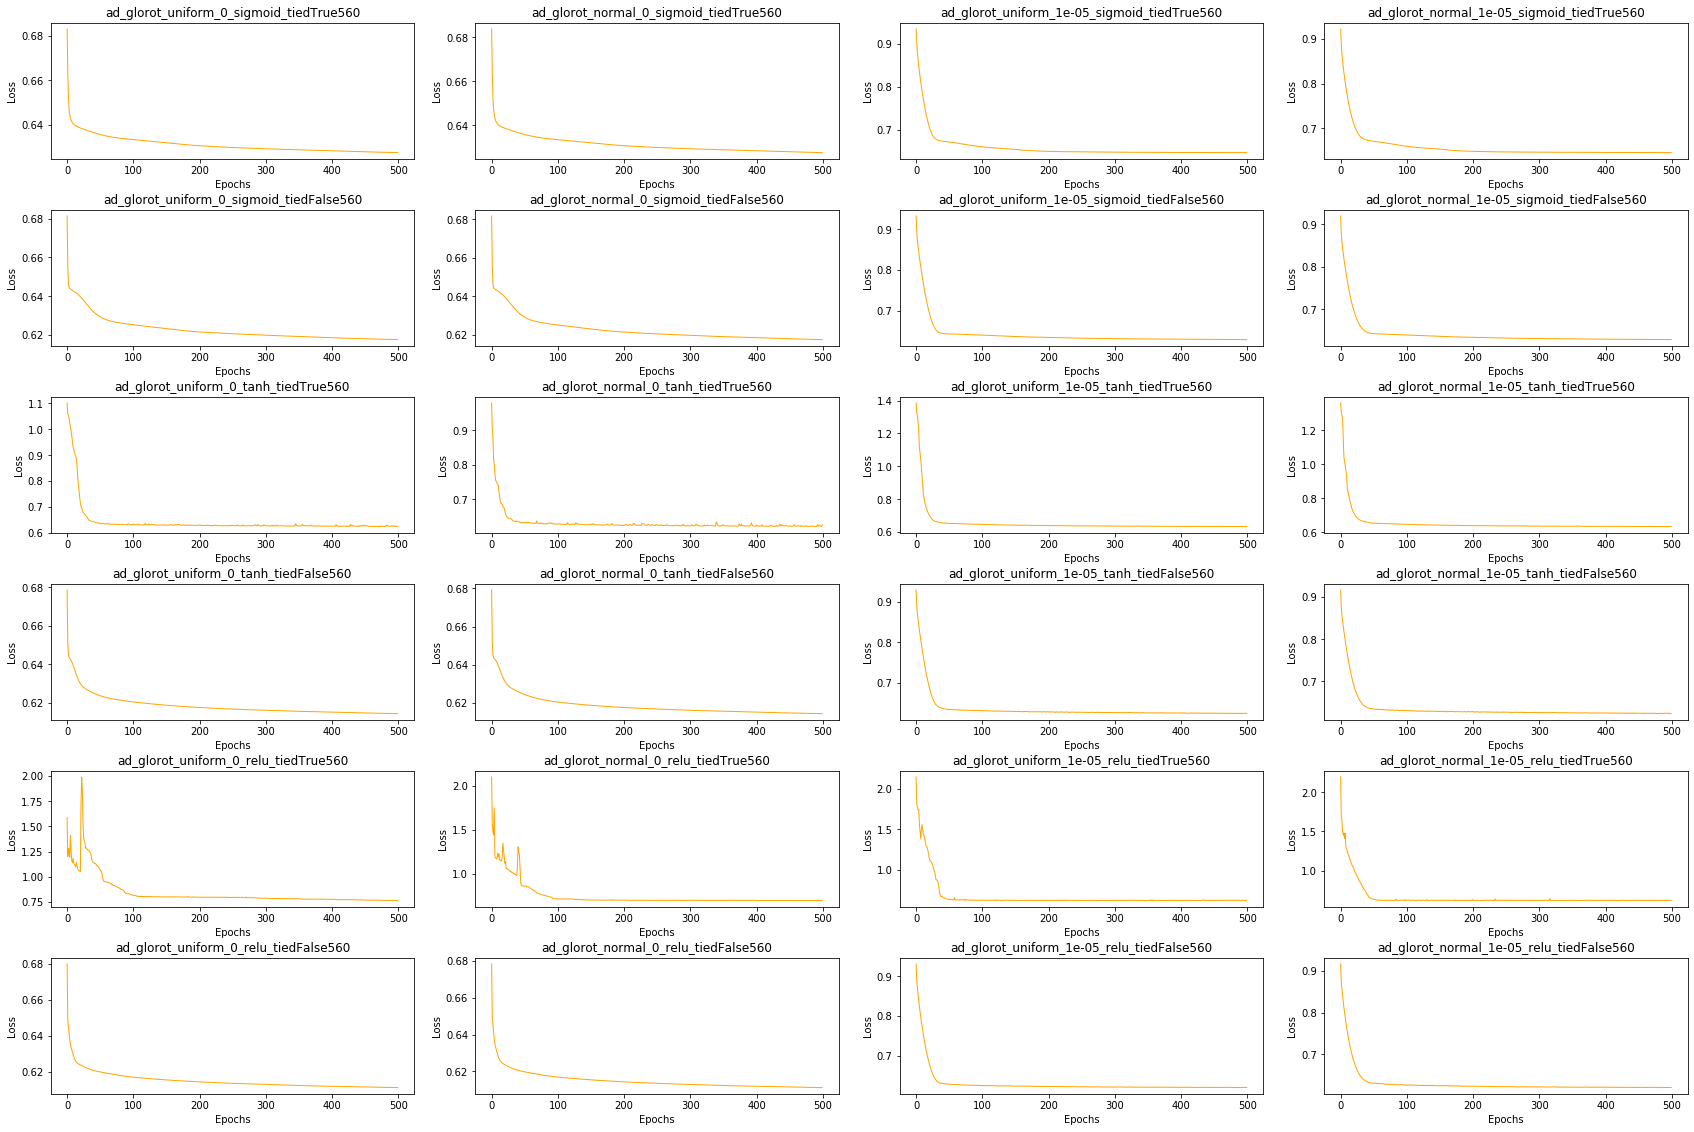

In [182]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq2[name]
                ax[xi,yi].plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


In [ ]:
fig.savefig('training_loss_seq.png')

#### Node weight distributions

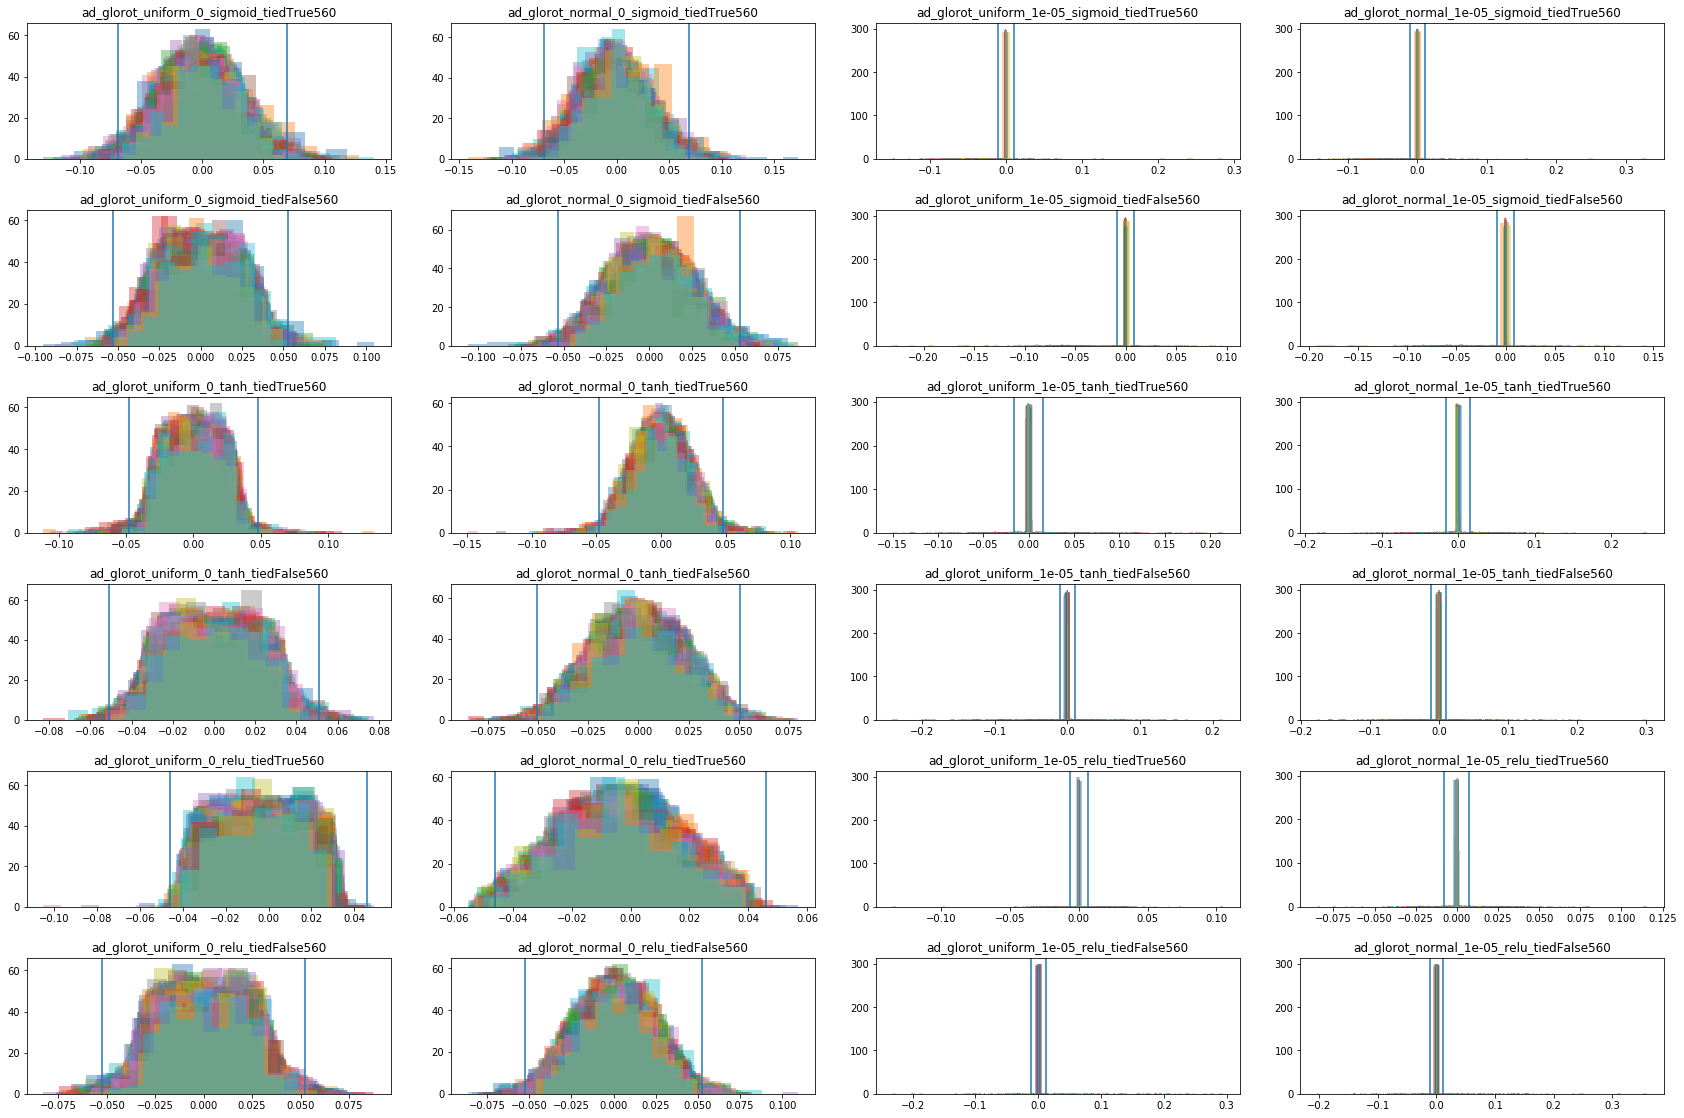

In [521]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1



In [522]:
fig.savefig('array_distributions_b10.png')

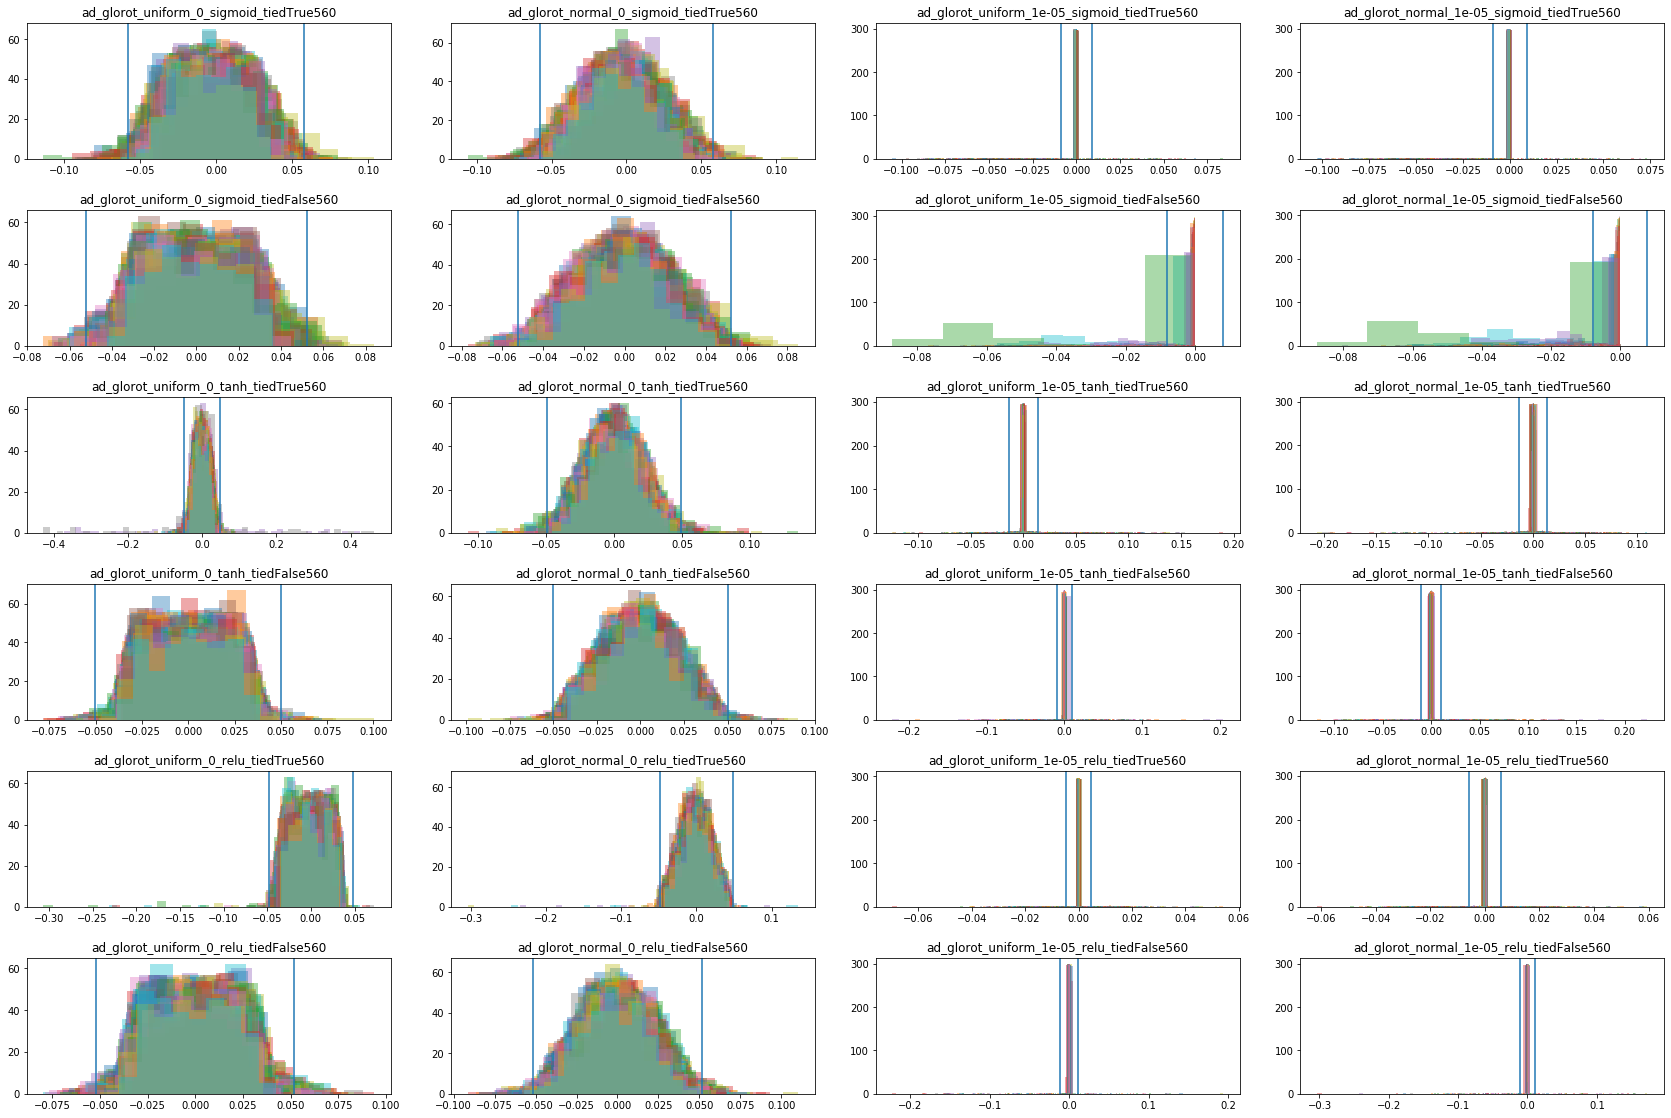

In [523]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,300):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1



In [524]:
fig.savefig('seq_distributions_b10.png')

[Text(0.5, 1, 'ad_glorot_uniform_0_sigmoid_tiedTrue560')]

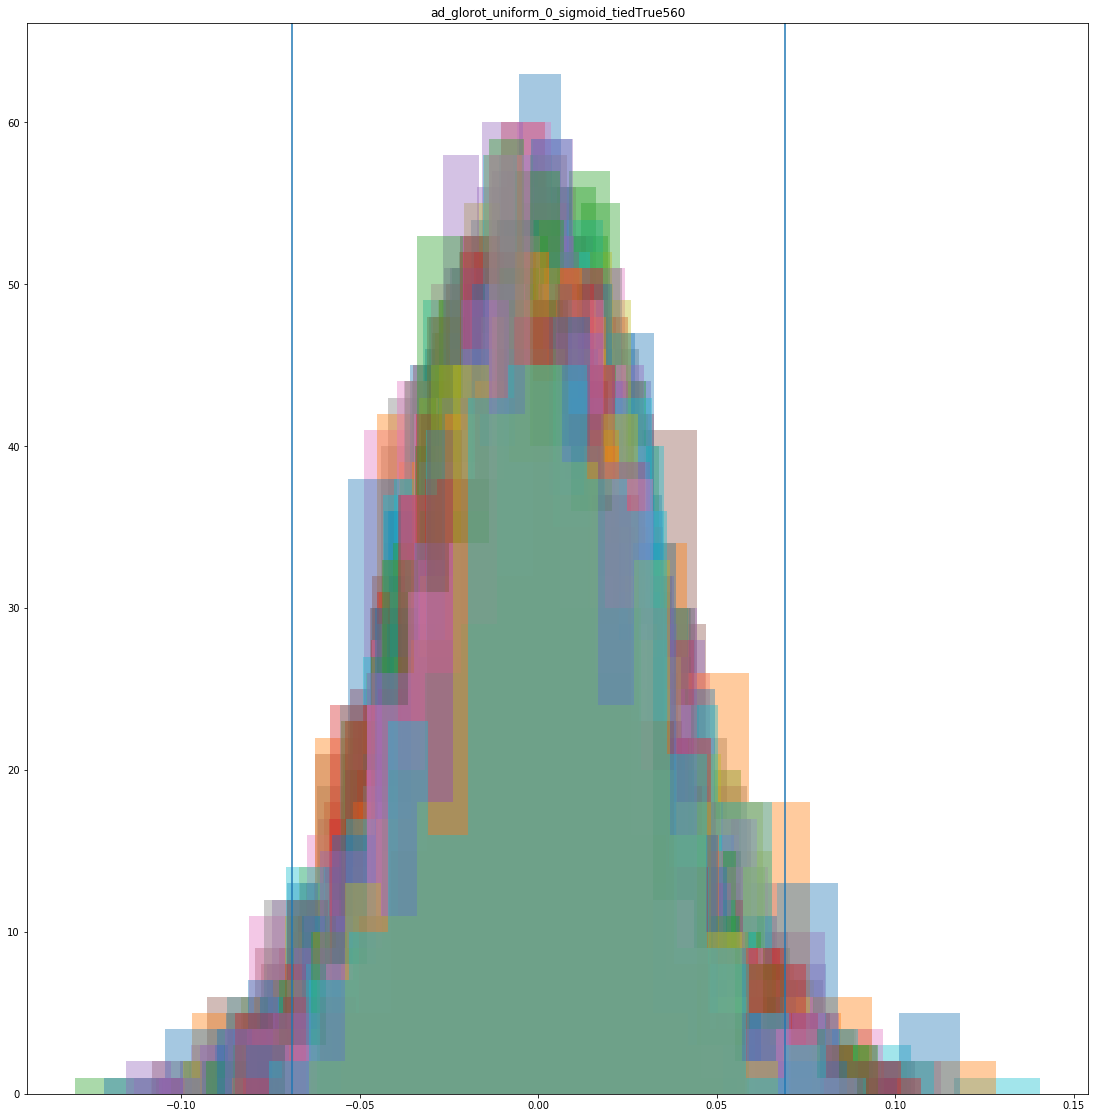

In [255]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *16))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'ad_glorot_normal_1e-05_relu_tiedFalse560'
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
model_temp = model_dict2[name]
for node in range(0,300):
    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
    ax=ax,
    hist=True,
    kde=False,
    rug=False)
ax.axvline(x = np.std(model_temp.weights)*2.5)
ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



#### HWG signature sizes

In [258]:
(model_dict2['tf_adage'].weights > np.std(model_dict2['tf_adage'].weights, axis=0)*2.5).shape

(5549, 300)

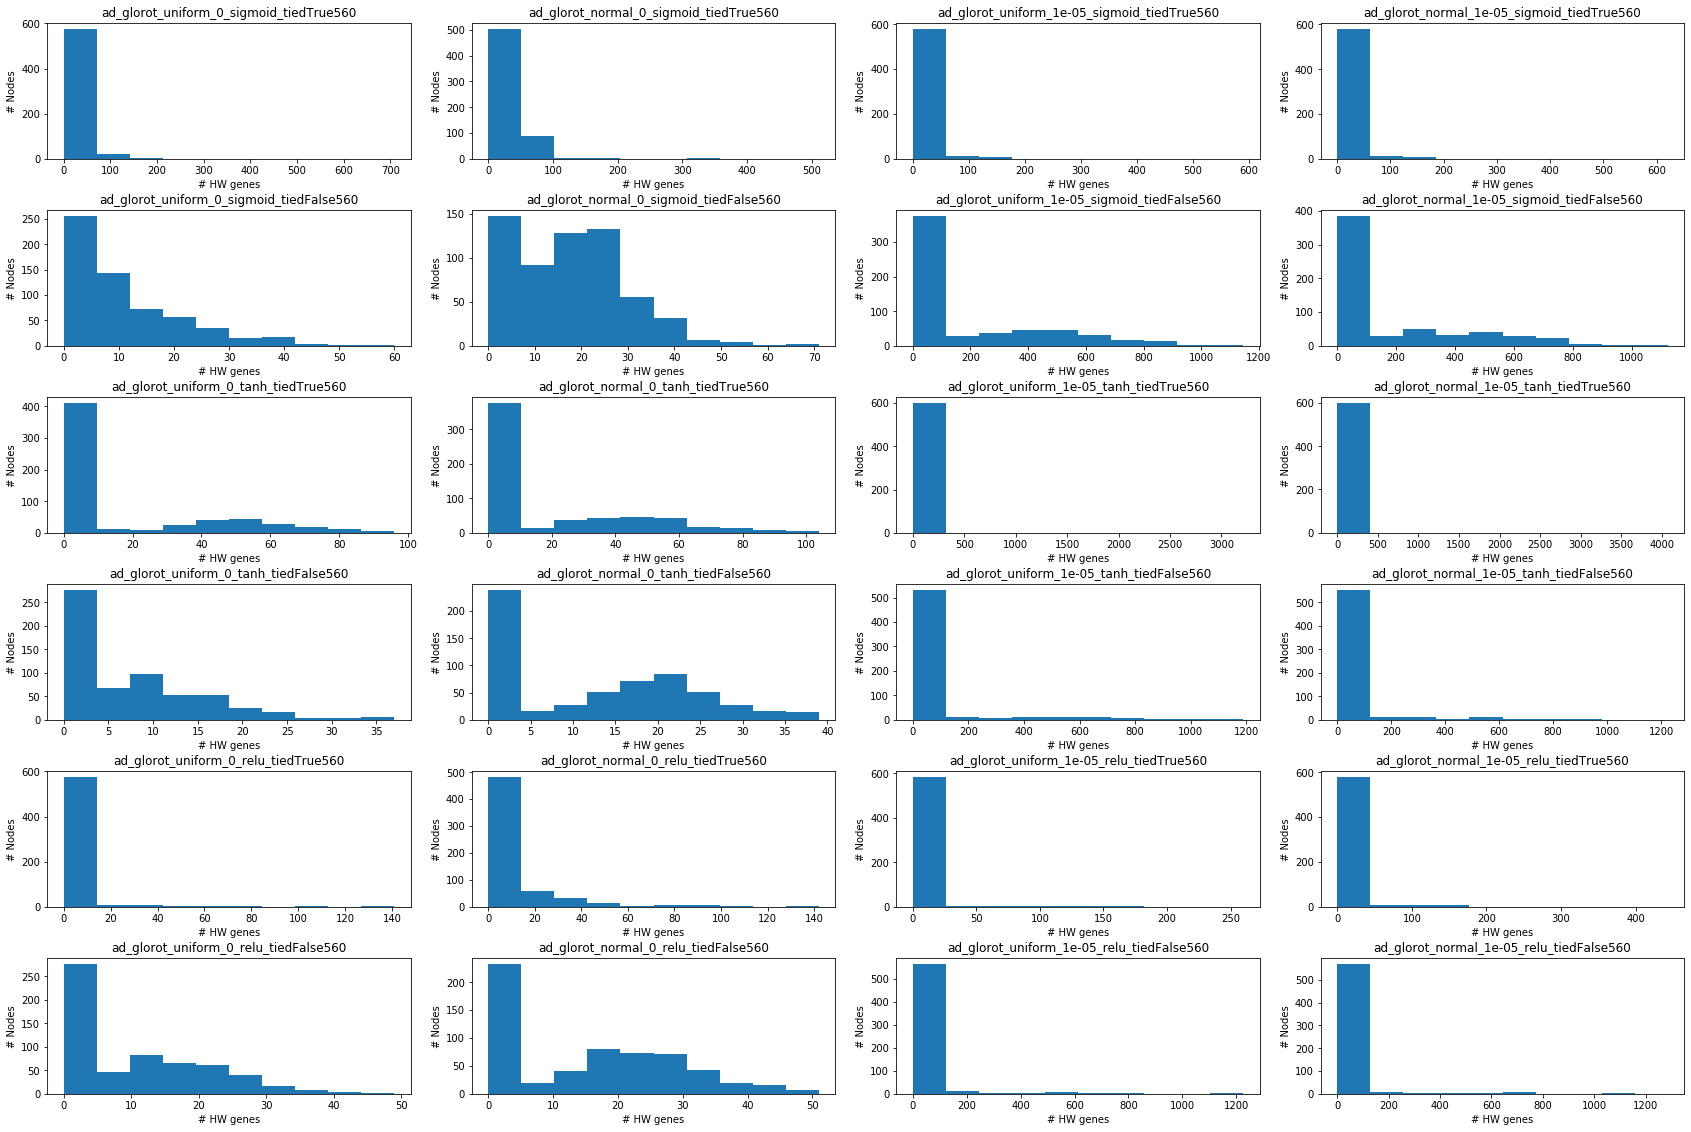

In [257]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict3[name]
                ax[xi,yi].hist(model_temp.hw_genes_all.sum(0))
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1



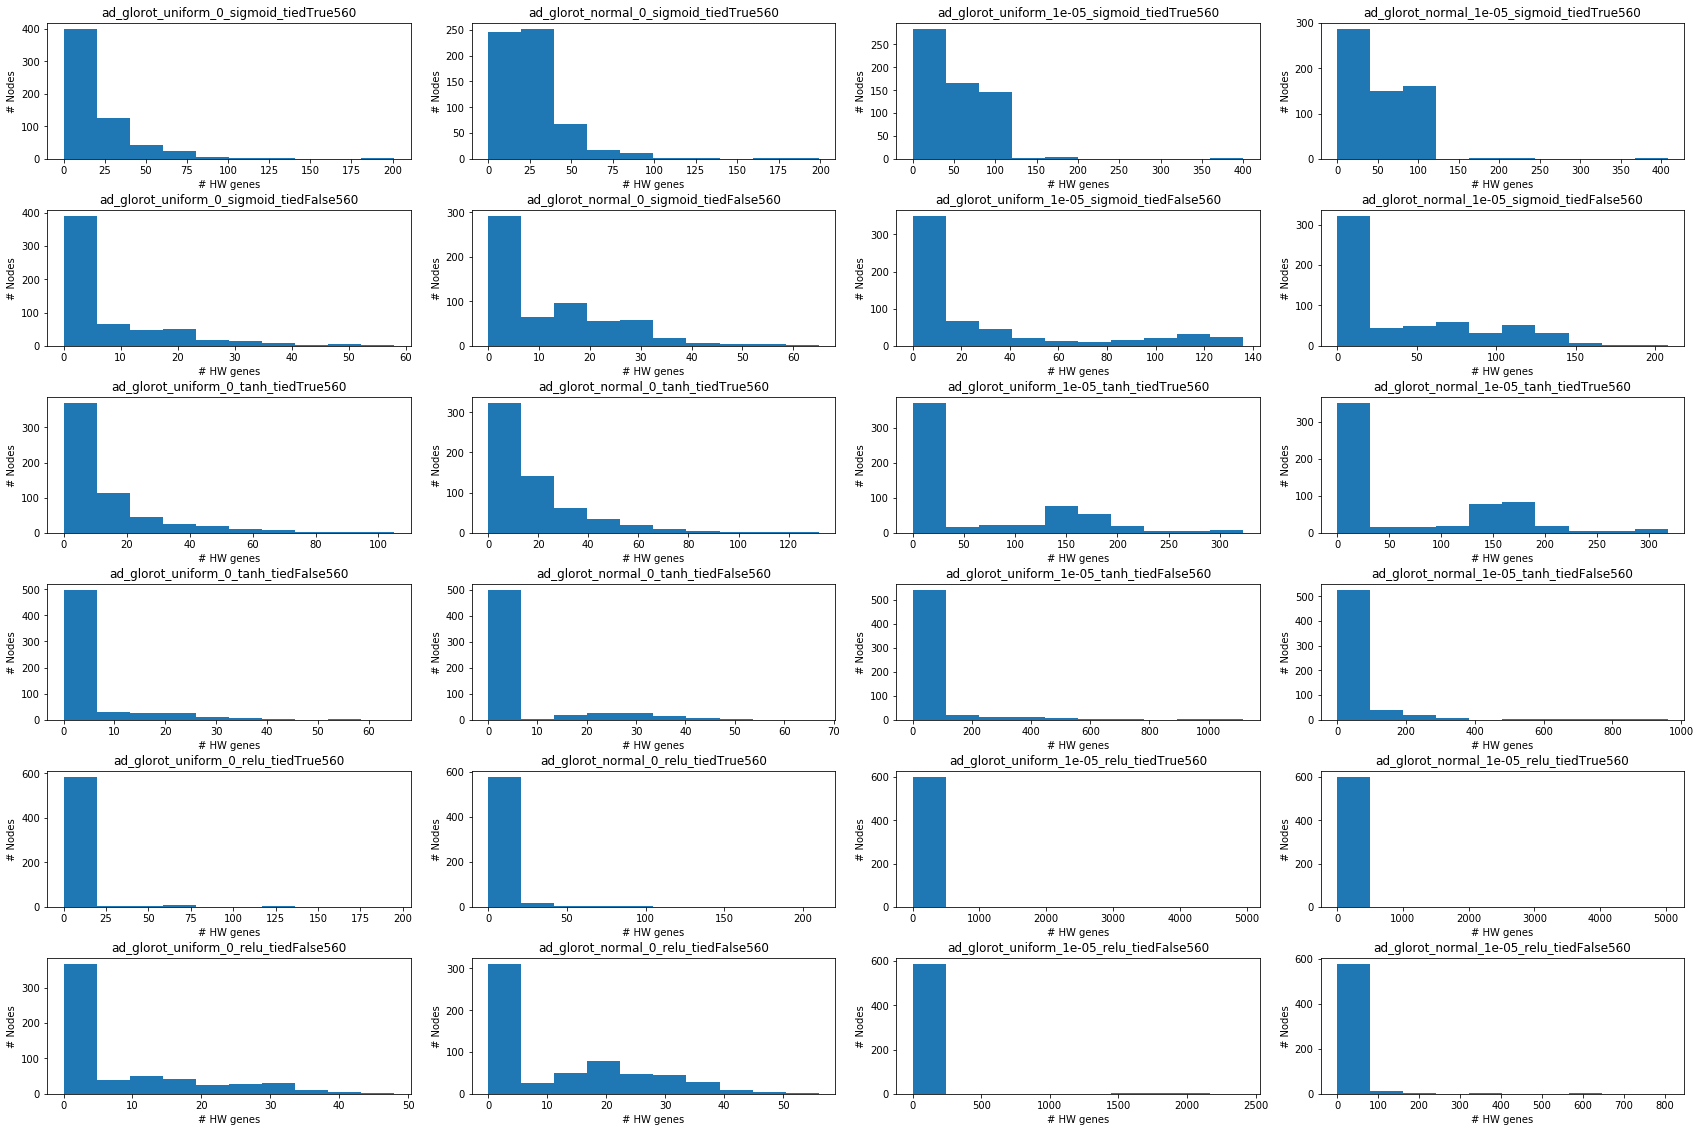

In [259]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq3[name]
                ax[xi,yi].hist(model_temp.hw_genes_all.sum(0))
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1



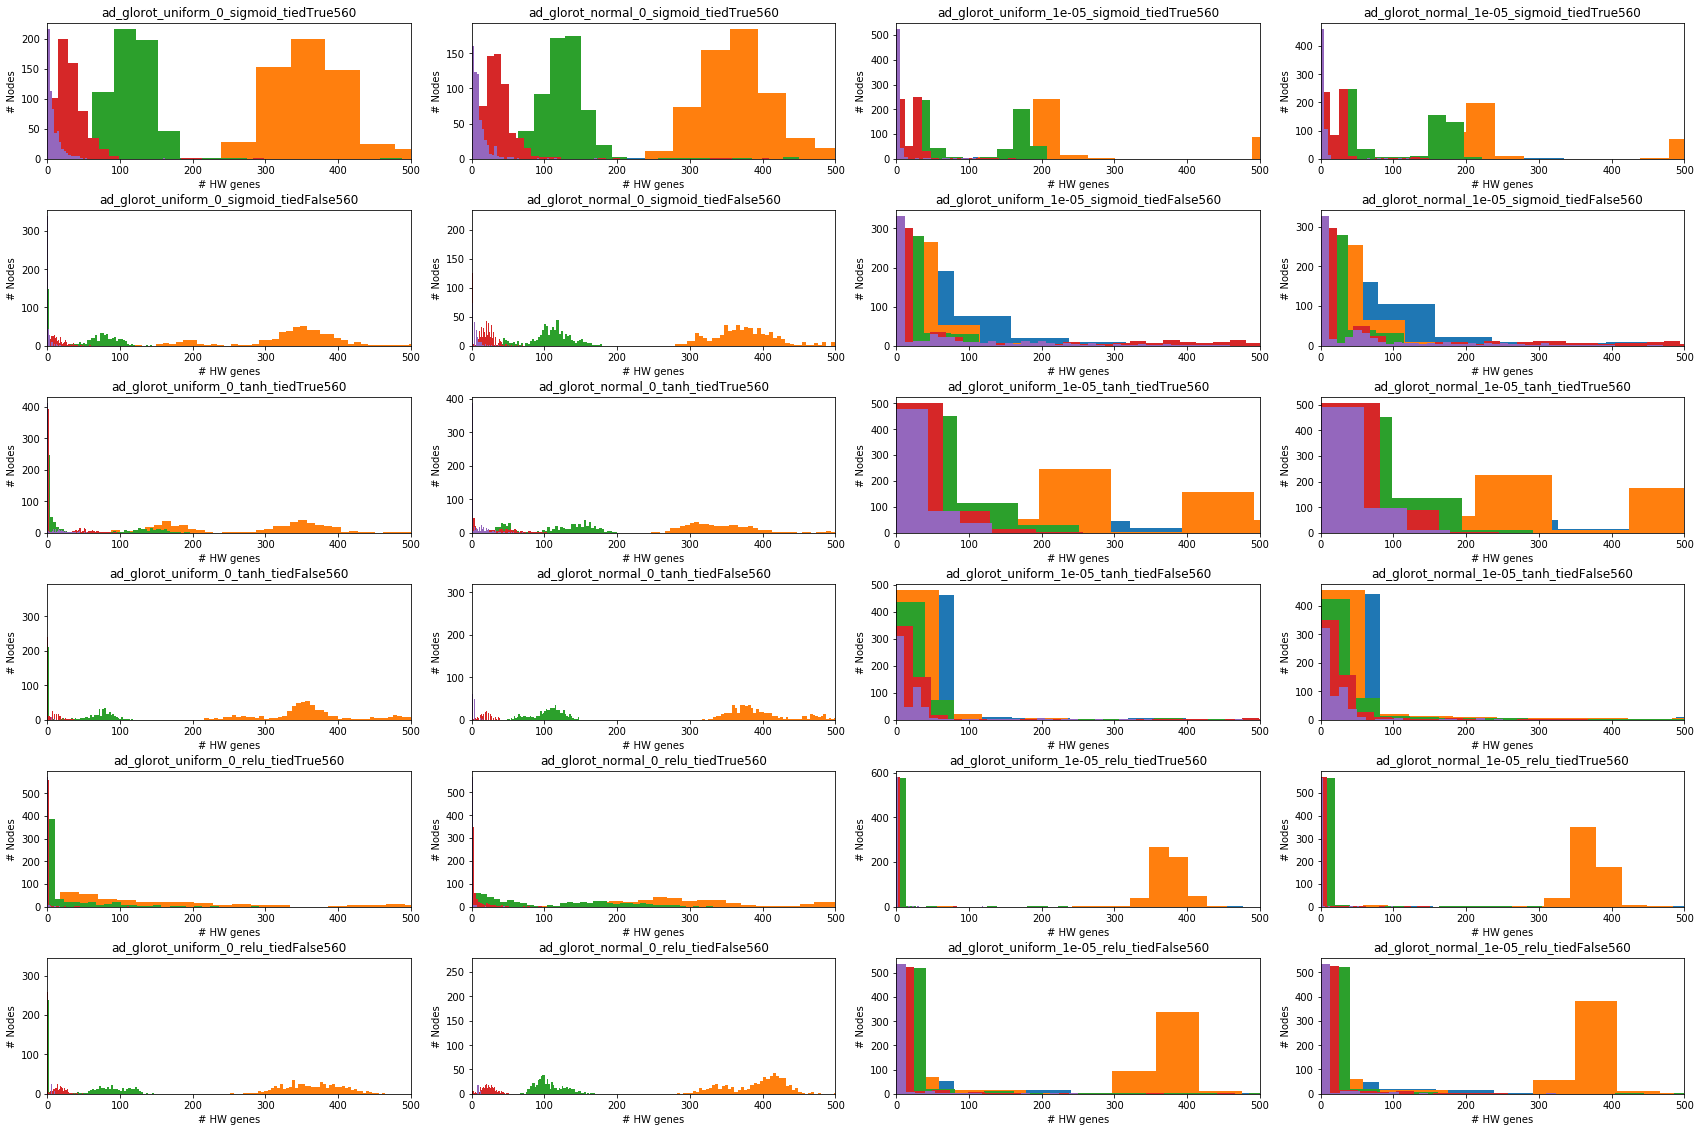

In [426]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict3[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                #for c in [1.75,2,2.25,2.5]:
                for c in [1.0,1.5,2.0,2.5,3.0]:
                    model_temp.set_hwg_cutoff(c)
                    ax[xi,yi].hist(model_temp.hw_genes_all.sum(0), bins=50)
                    ax[xi,yi].set_xlim([0,500])

                xi = xi+1
        yi=yi+1

In [427]:
fig.savefig('sig_sizes_by_hw_cutoff_array_xlim500.png')

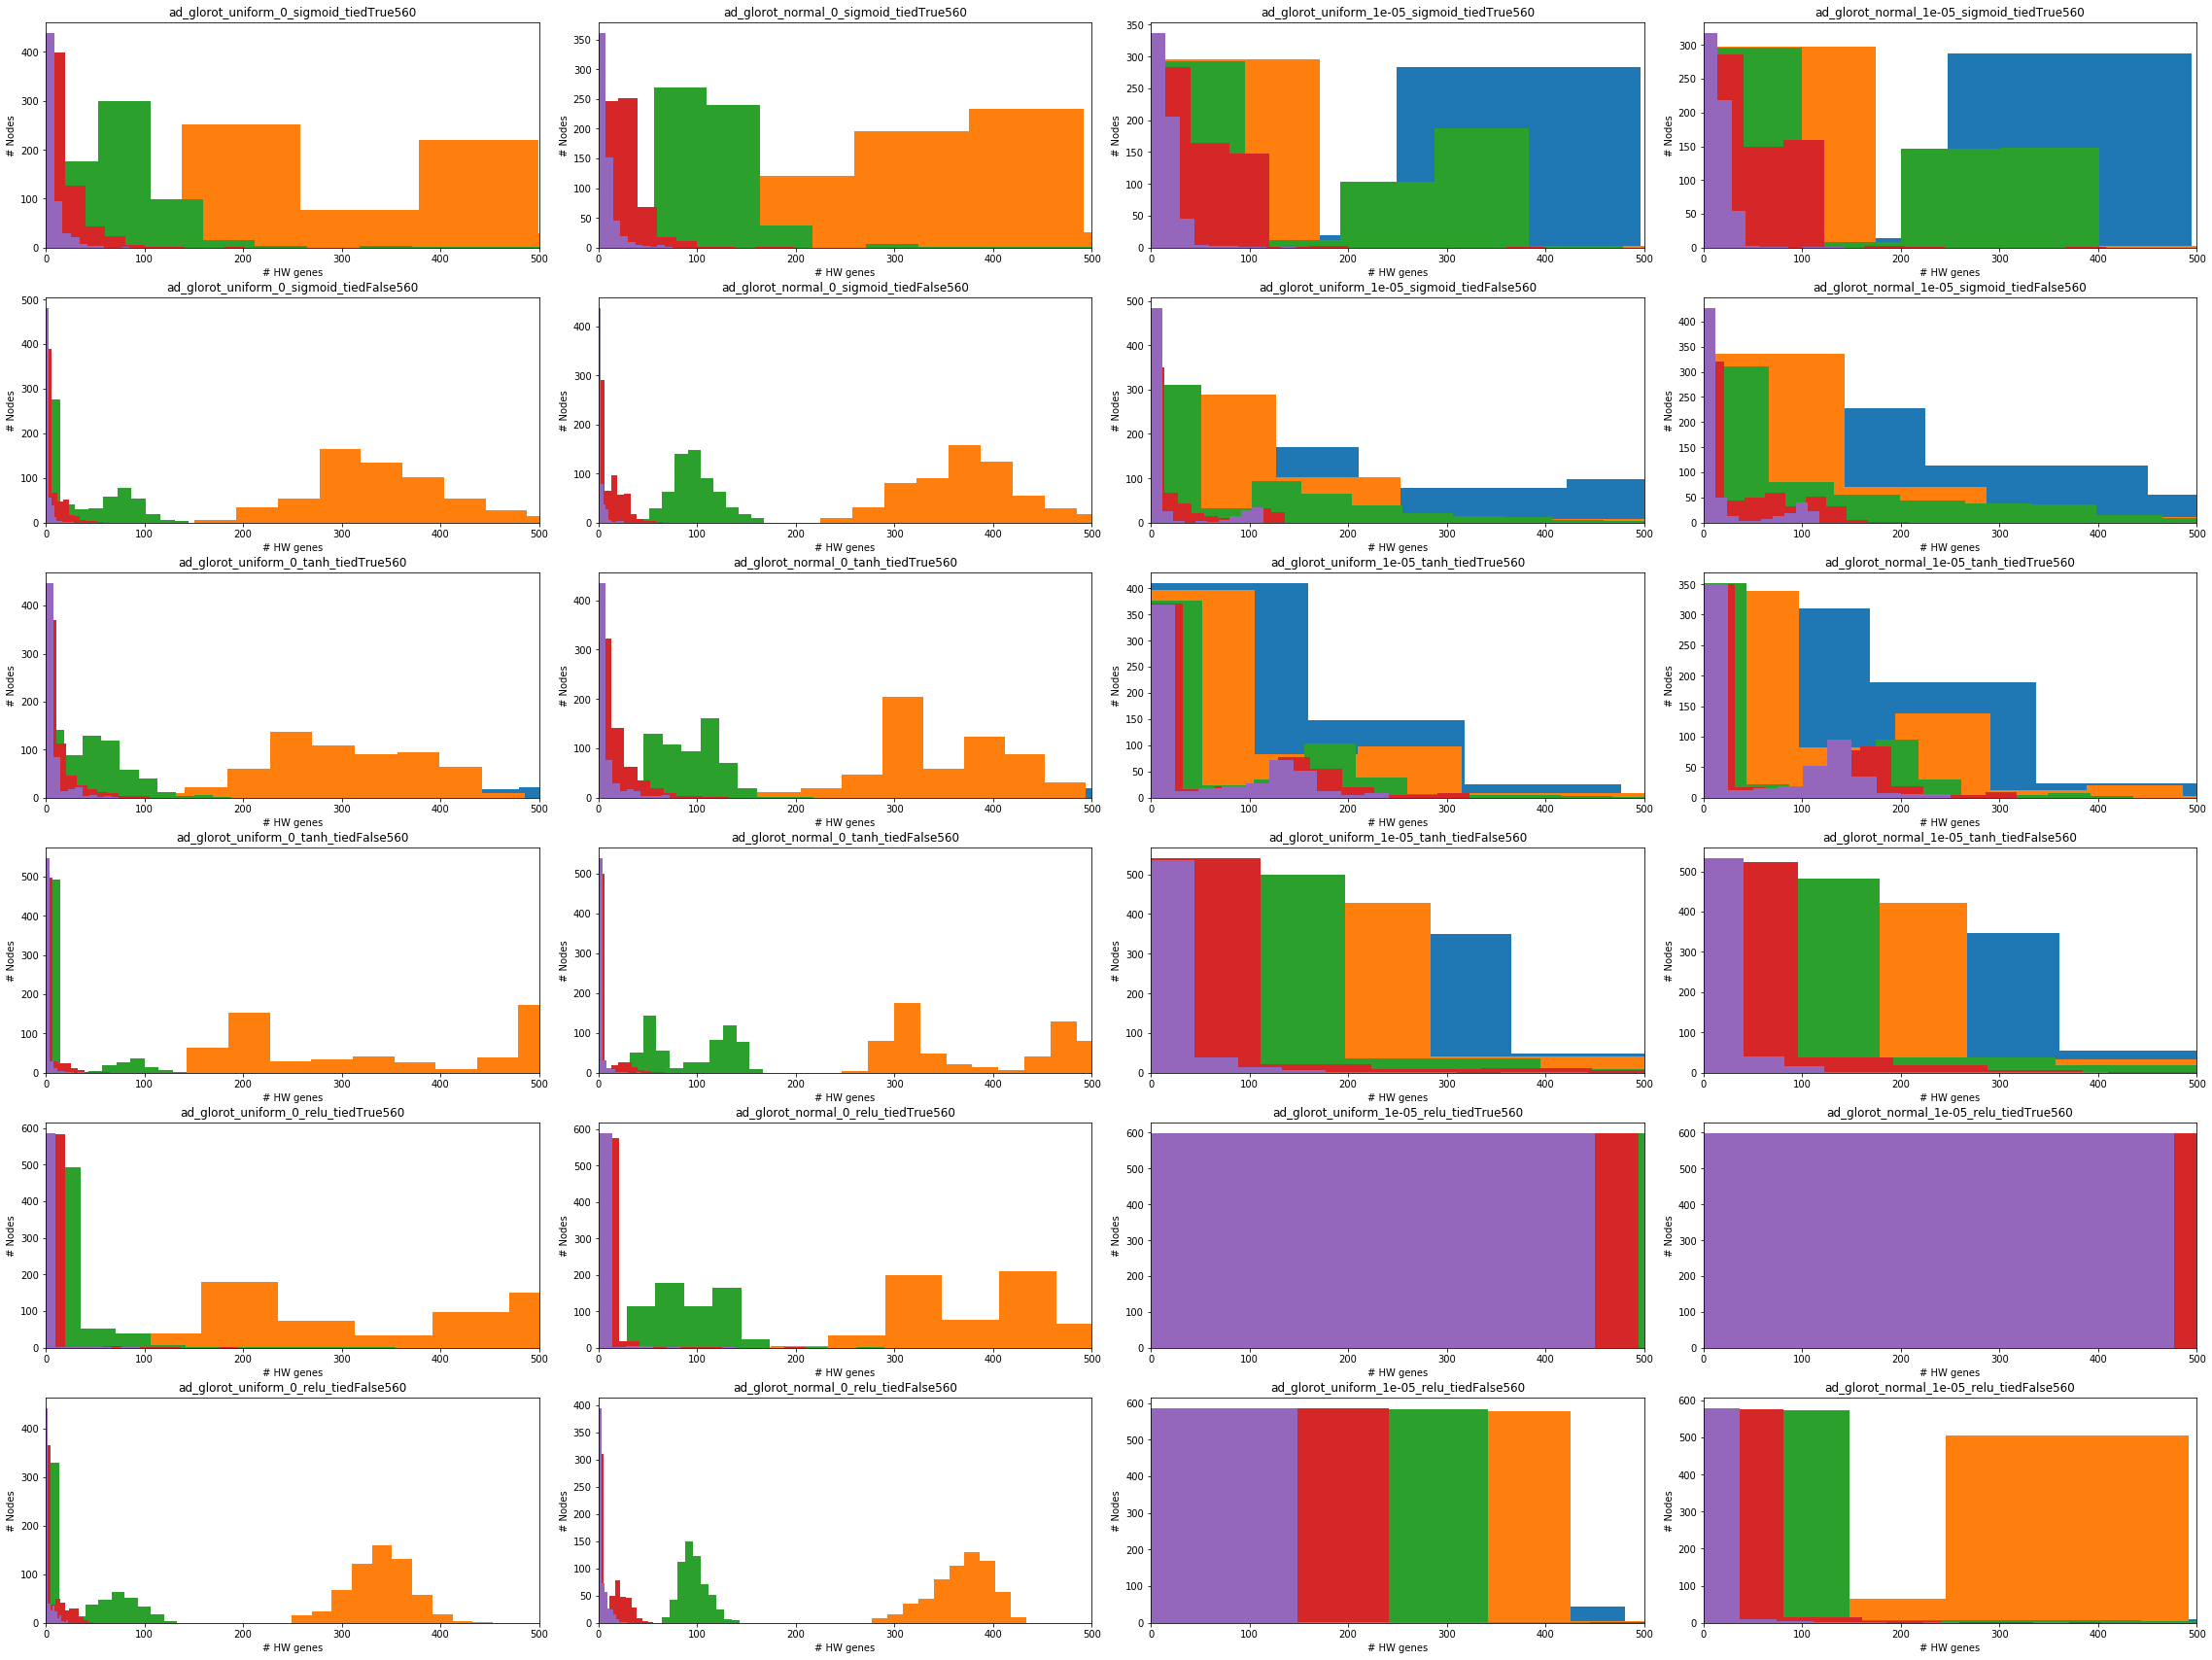

In [428]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq3[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                #for c in [1.75,2,2.25,2.5]:
                #for c in [3.0,2.5,2.0,1.5,1.0]:
                for c in [1.0,1.5,2.0,2.5,3.0]:
                    model_temp.set_hwg_cutoff(c)
                    ax[xi,yi].hist(model_temp.hw_genes_all.sum(0)) #, bins=50
                    ax[xi,yi].set_xlim([0,500])

                xi = xi+1
        yi=yi+1

In [423]:
fig.savefig('sig_sizes_by_hw_cutoff_seq.png')

[Text(45.125, 0.5, '# Nodes'),
 Text(0.5, 15.0, '# HW genes'),
 Text(0.5, 1, 'tf_adage')]

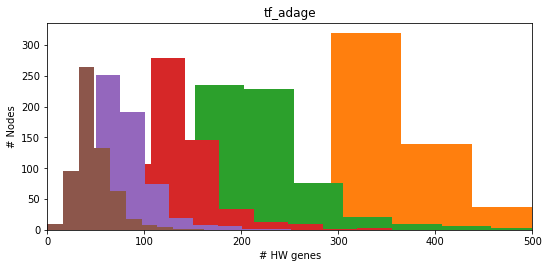

In [300]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict[name]
for c in [1,1.5,1.75,2,2.25,2.5]:
    model_temp.set_hwg_cutoff(c)
    ax.hist(model_temp.hw_genes_all.sum(0))
    ax.set_xlim([0,500])
ax.set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
#ax.set_yscale('log')



[Text(45.125, 0.5, '# HWGs'),
 Text(0.5, 15.0, 'Cutoff'),
 Text(0.5, 1, 'ad_glorot_normal_0_tanh_tiedTrue560')]

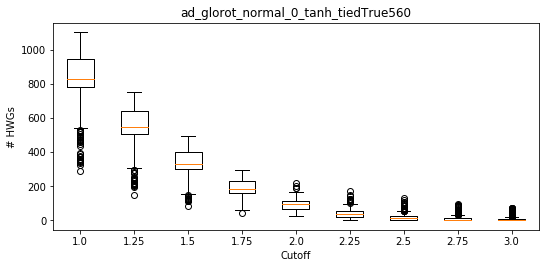

In [409]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
name = 'ad_glorot_normal_0_tanh_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    hwgs.append(model_temp.hw_genes_all.sum(0))
    
ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

ax.set(title = name, xlabel = 'Cutoff', ylabel = '# HWGs')
#ax.set_yscale('log')

[Text(45.125, 0.5, '# KEGG / Node'),
 Text(0.5, 15.0, 'Cutoff'),
 Text(0.5, 1, 'ad_glorot_normal_0_tanh_tiedTrue560')]

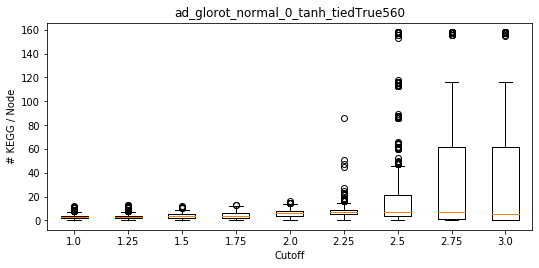

In [410]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)



plim=5
name = 'tf_adage'
name = 'ad_glorot_normal_0_tanh_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    en_temp = (model_temp.kegg_ps > plim).sum(1)
    hwgs.append(en_temp)
    
ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

In [ ]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)



plim=5
name = 'tf_adage'
name = 'ad_glorot_normal_0_tanh_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    en_temp = (model_temp.kegg_ps > plim).sum(1)
    hwgs.append(en_temp)
    
ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

[Text(45.125, 0.5, '# KEGG / Node'),
 Text(0.5, 15.0, 'Cutoff'),
 Text(0.5, 1, 'ad_glorot_uniform_0_sigmoid_tiedTrue560')]

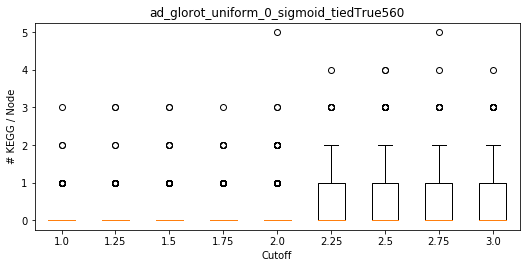

In [355]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
#print(name)
plim=10
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    en_temp = (model_temp.kegg_ps > plim).sum(1)
    hwgs.append(en_temp)
    
ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

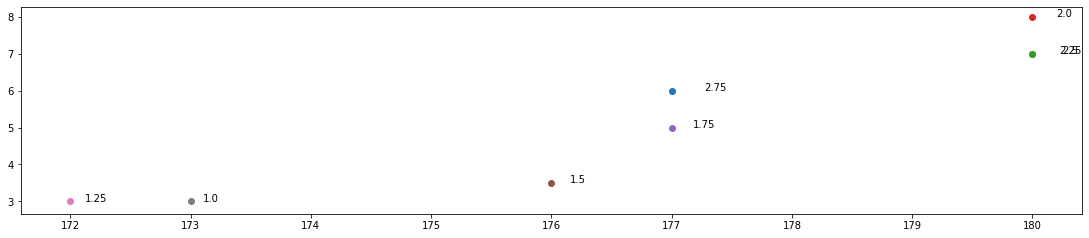

In [414]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
#print(name)
plim=5
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
name = 'ad_glorot_uniform_0_tanh_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [2.75,2.5,2.25,2.0, 1.75,1.5, 1.25, 1.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    en_temp = (model_temp.kegg_ps > plim).sum(1)
    hwgs.append(en_temp)
    kegg_per_med = (model_temp.kegg_ps > plim).sum(1).median()
    all_kegg = ((model_temp.kegg_ps > plim).sum(0) > 0).sum()
    ax.scatter(x = all_kegg , y = kegg_per_med)
    ax.text(x = all_kegg+(c/10), y = kegg_per_med,s = str(c))
               

               #ax.hist(hwgs, label = [2.75,2.5,2.25,2.0])
#ax.legend(prop={'size': 10})
    
#ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

#ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

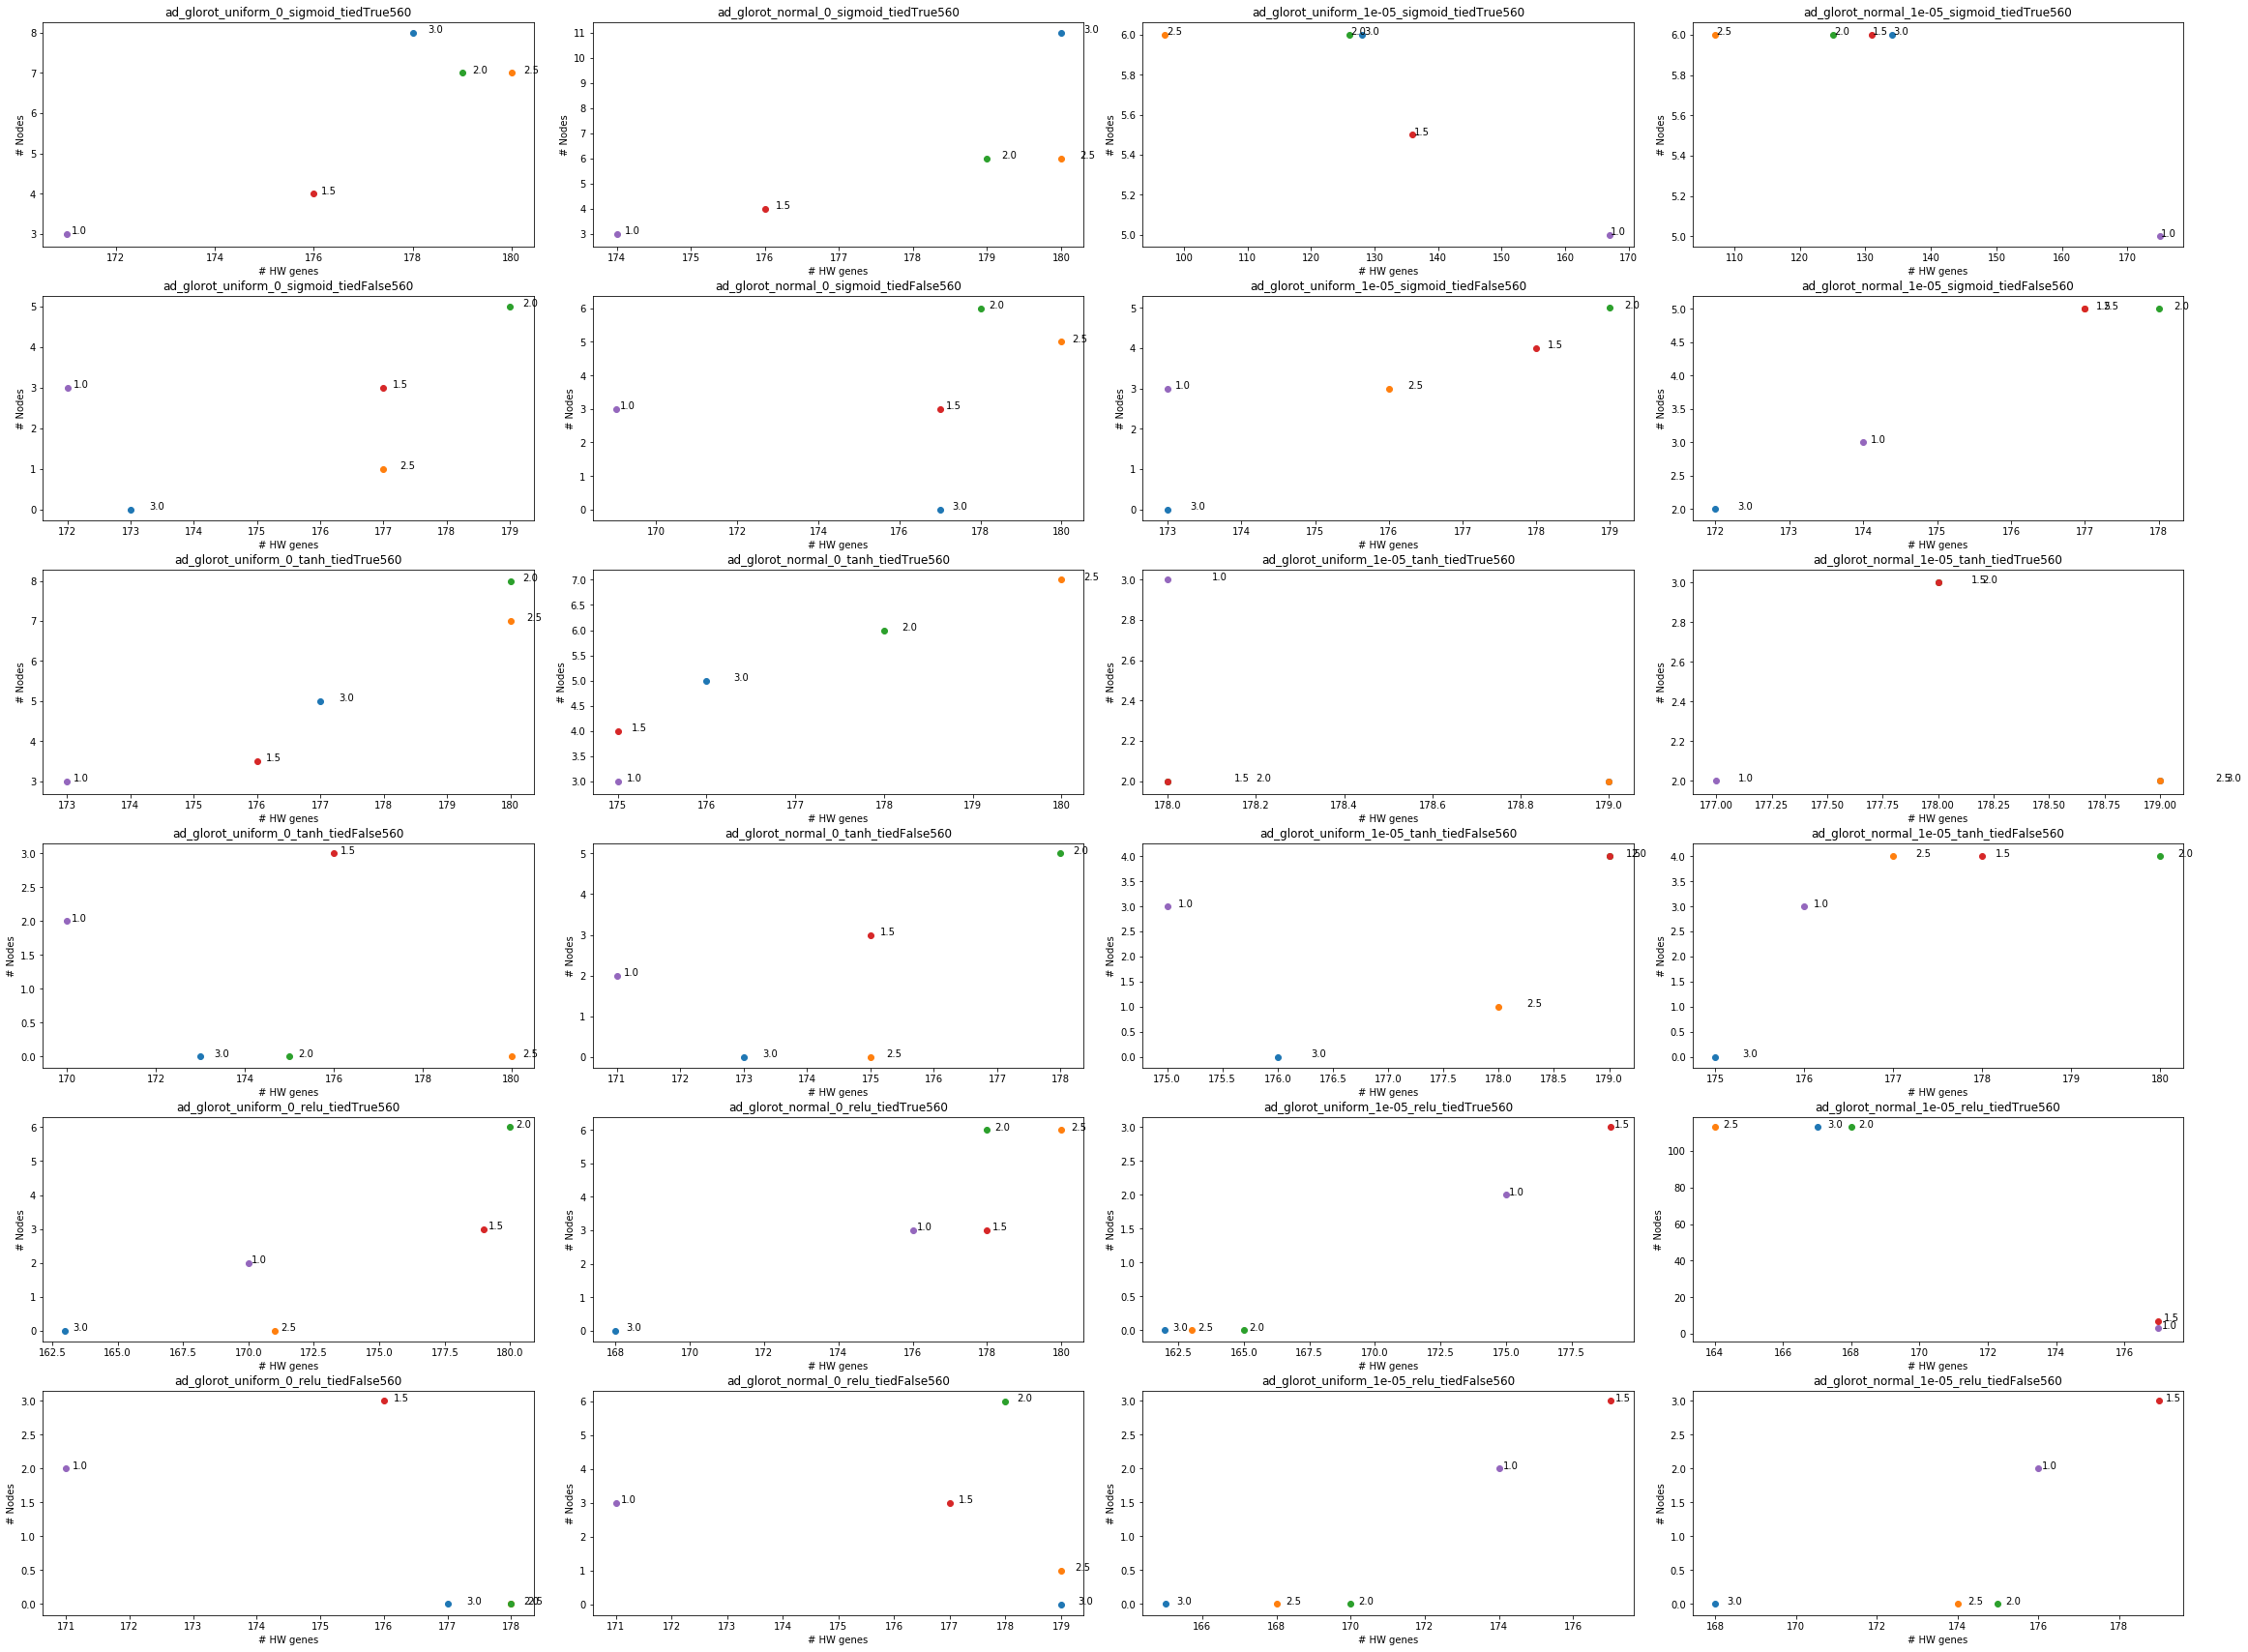

In [415]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)
plim = 5
xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(560)
                #print(name)
                model_temp = model_dict_seq3[name]
                ax[xi,yi].set(title = name, xlabel = '# HW genes', ylabel = '# Nodes')
                #ax[xi,yi].set_xscale('log')
                #for c in [1.75,2,2.25,2.5]:
                hwgs = []
                for c in [3.0,2.5,2.0,1.5,1.0]:
                    hwgs_temp = model_temp.set_hwg_cutoff(c)
                    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
                    en_temp = (model_temp.kegg_ps > plim).sum(1)
                    hwgs.append(en_temp)
                    kegg_per_med = (model_temp.kegg_ps > plim).sum(1).median()
                    all_kegg = ((model_temp.kegg_ps > plim).sum(0) > 0).sum()
                    ax[xi,yi].scatter(x = all_kegg , y = kegg_per_med)
                    ax[xi,yi].text(x = all_kegg+(c/10), y = kegg_per_med,s = str(c))

                xi = xi+1
        yi=yi+1

In [416]:
fig.savefig('kegg_en_by_hw_cutoff_seq.png')

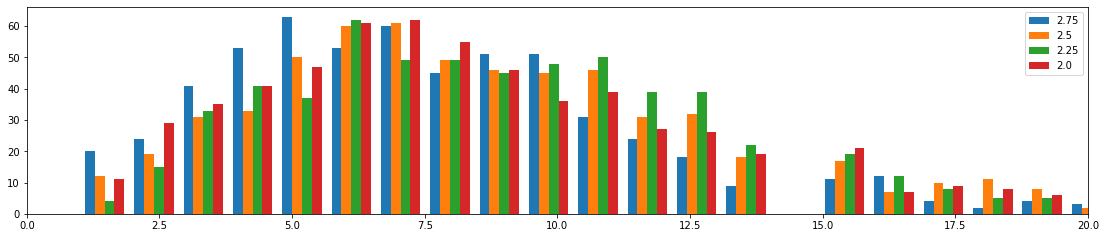

In [342]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *4))
fig.tight_layout(pad=3.0)
ax.hist(hwgs,bins = 100, label = [2.75,2.5,2.25,2.0])
ax.set_xlim([0,20])
ax.legend(prop={'size': 10})

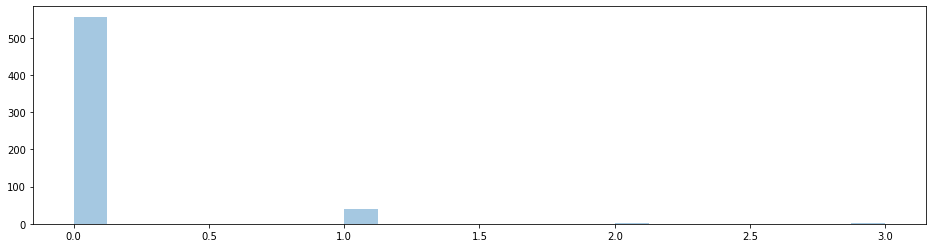

In [385]:
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *4))
sns.distplot(hwgs[0], ax=ax, kde=False)

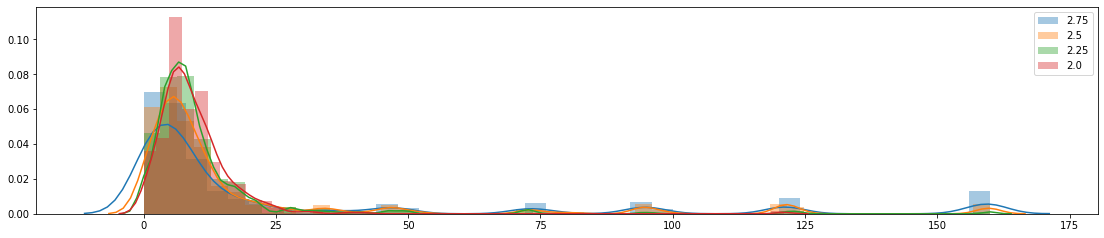

In [400]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*16 ,yd *4))
fig.tight_layout(pad=3.0)
for n in range(4):
    sns.distplot(hwgs[n], label = [2.75,2.5,2.25,2.0][n], #[model_temp.weights[node] > 0],
    ax=ax,
    hist=True,
    kde=True
)
ax.legend()
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
#ax.set(title = name)

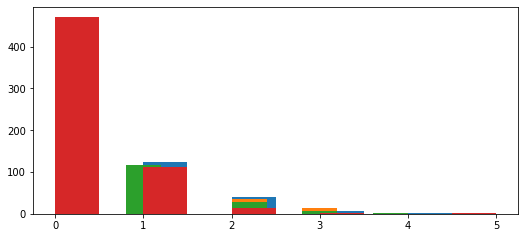

In [321]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*8 ,yd *4))
fig.tight_layout(pad=3.0)


name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
#print(name)
plim=10
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
model_temp = model_dict_seq3[name]
hwgs = []
for c in [2.75,2.5,2.25,2.0]:
    hwgs_temp = model_temp.set_hwg_cutoff(c)
    model_temp.set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    ax.hist((model_temp.kegg_ps > plim).sum(1))
    
#ax.boxplot(hwgs, labels = [1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0])

#ax.set(title = name, xlabel = 'Cutoff', ylabel = '# KEGG / Node')
#ax.set_yscale('log')

In [333]:
(model_dict['tf_adage'].kegg_ps > 10).sum(1)[(model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0]

TypeError: '>' not supported between instances of 'list' and 'int'

In [305]:

model_dict['tf_adage'].set_hwg_cutoff(2.5)
model_dict['tf_adage'].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt')
((model_dict['tf_adage'].kegg_ps > 10).sum(1) > 0).sum()

334

#### Enrichments

In [ ]:
for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    #model_dict[m].set_kegg('node_interpretation/operons_format.txt')
    model_dict[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    #model_dict[m].set_go('node_interpretation/regulons_format.txt')
  

##### Summary Fig

In [ ]:
plim = 30

fig, ax = plt.subplots(1,1,figsize=(xd*4 ,yd *4))
x = ((model_dict['tf_adage'].go_ps > plim).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plim).sum(1) > 0).sum()
ax.scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(10):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.go_ps > plim).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plim).sum(1) > 0).sum()
                    ax.scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    ax.set(title = m, xlabel = '# Regulons', ylabel = '# Nodes')

                    #xi = xi+1
                ec='red'
            mi = mi+1
        s=500
    c = 'grey'

##### Details

In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(0))
                ax[xi,yi].set(title = name, xlabel = '# Nodes per Pathway', ylabel = '# Pathways')
                xi = xi+1
        yi=yi+1





In [ ]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for i in inits:
    for l in L1_norm:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].hist((model_temp.kegg_ps > 10).sum(1))
                ax[xi,yi].set(title = name, xlabel = '# Pathways in Node', ylabel = '# Nodes')
                xi = xi+1
        yi=yi+1


### Write out HWG lists

In [276]:
for m in model_dict_seq3:
    model_dict_seq3[m].set_hwg_cutoff(2.0)
    #model_dict_seq[m].set_op('node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq3[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    #print('kegg done')
    model_dict_seq3[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    model_dict_seq3[m].set_reg('node_interpretation/regulons_format.txt')
    #print('reg done')
    print(m)
print('dict seq done') 

tf_adage
ad_glorot_uniform_0_sigmoid_tiedTrue560
ad_glorot_uniform_0_sigmoid_tiedTrue561
ad_glorot_uniform_0_sigmoid_tiedTrue562
ad_glorot_uniform_0_sigmoid_tiedFalse560
ad_glorot_uniform_0_sigmoid_tiedFalse561
ad_glorot_uniform_0_sigmoid_tiedFalse562
ad_glorot_uniform_0_tanh_tiedTrue560
ad_glorot_uniform_0_tanh_tiedTrue561
ad_glorot_uniform_0_tanh_tiedTrue562
ad_glorot_uniform_0_tanh_tiedFalse560
ad_glorot_uniform_0_tanh_tiedFalse561
ad_glorot_uniform_0_tanh_tiedFalse562
ad_glorot_uniform_0_relu_tiedTrue560
ad_glorot_uniform_0_relu_tiedTrue561
ad_glorot_uniform_0_relu_tiedTrue562
ad_glorot_uniform_0_relu_tiedFalse560
ad_glorot_uniform_0_relu_tiedFalse561
ad_glorot_uniform_0_relu_tiedFalse562
ad_glorot_uniform_1e-05_sigmoid_tiedTrue560
ad_glorot_uniform_1e-05_sigmoid_tiedTrue561
ad_glorot_uniform_1e-05_sigmoid_tiedTrue562
ad_glorot_uniform_1e-05_sigmoid_tiedFalse560
ad_glorot_uniform_1e-05_sigmoid_tiedFalse561
ad_glorot_uniform_1e-05_sigmoid_tiedFalse562
ad_glorot_uniform_1e-05_tanh_ti

In [196]:
for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    model_dict[m].set_op('node_interpretation/operons_format.txt')

print('dict done') 

for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_op('node_interpretation/operons_format.txt')

print('dict seq done') 

for m in model_dict2:
    model_dict2[m].set_hwg_cutoff(2.5)
    model_dict2[m].set_op('node_interpretation/operons_format.txt')

print('dict2 done')  

for m in model_dict_seq2:
    model_dict_seq2[m].set_hwg_cutoff(2.5)
    model_dict_seq2[m].set_op('node_interpretation/operons_format.txt')

print('dict seq2 done') 

dict done
dict seq done


KeyboardInterrupt: 

In [534]:
for m in model_dict3:
    model_dict3[m].set_hwg_cutoff(2.5)
    model_dict3[m].set_op('node_interpretation/operons_format.txt')

print('dict2 done')  

for m in model_dict_seq3:
    model_dict_seq3[m].set_hwg_cutoff(2.5)
    model_dict_seq3[m].set_op('node_interpretation/operons_format.txt')

print('dict seq2 done') 

dict2 done
dict seq2 done


In [142]:
for m in model_dict:
    model_dict[m].set_hwg_cutoff(2.5)
    model_dict[m].set_op('node_interpretation/operons_format.txt')
    print('op done')
    model_dict[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    print('kegg done')
    model_dict[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    print('go done')
    model_dict[m].set_reg('node_interpretation/regulons_format.txt')
    print('reg done')
print('dict done') 

for m in model_dict_seq:
    model_dict_seq[m].set_hwg_cutoff(2.5)
    model_dict_seq[m].set_op('node_interpretation/operons_format.txt')
    print('op done')
    model_dict_seq[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    print('kegg done')
    model_dict_seq[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    print('go done')
    model_dict_seq[m].set_reg('node_interpretation/regulons_format.txt')
    print('reg done')
print('dict seq done') 

for m in model_dict2:
    model_dict2[m].set_hwg_cutoff(2.5)
    model_dict2[m].set_op('node_interpretation/operons_format.txt')
    print('op done')
    model_dict2[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    print('kegg done')
    model_dict2[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    print('go done')
    model_dict2[m].set_reg('node_interpretation/regulons_format.txt')
    print('reg done')
print('dict2 done')  

for m in model_dict_seq2:
    model_dict_seq2[m].set_hwg_cutoff(2.5)
    model_dict_seq2[m].set_op('node_interpretation/operons_format.txt')
    print('op done')
    model_dict_seq2[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    print('kegg done')
    model_dict_seq2[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    print('go done')
    model_dict_seq2[m].set_reg('node_interpretation/regulons_format.txt')
    print('reg done')
print('dict seq2 done') 

op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go done
reg done
op done
kegg done
go

NameError: name 'model_dict_seq' is not defined

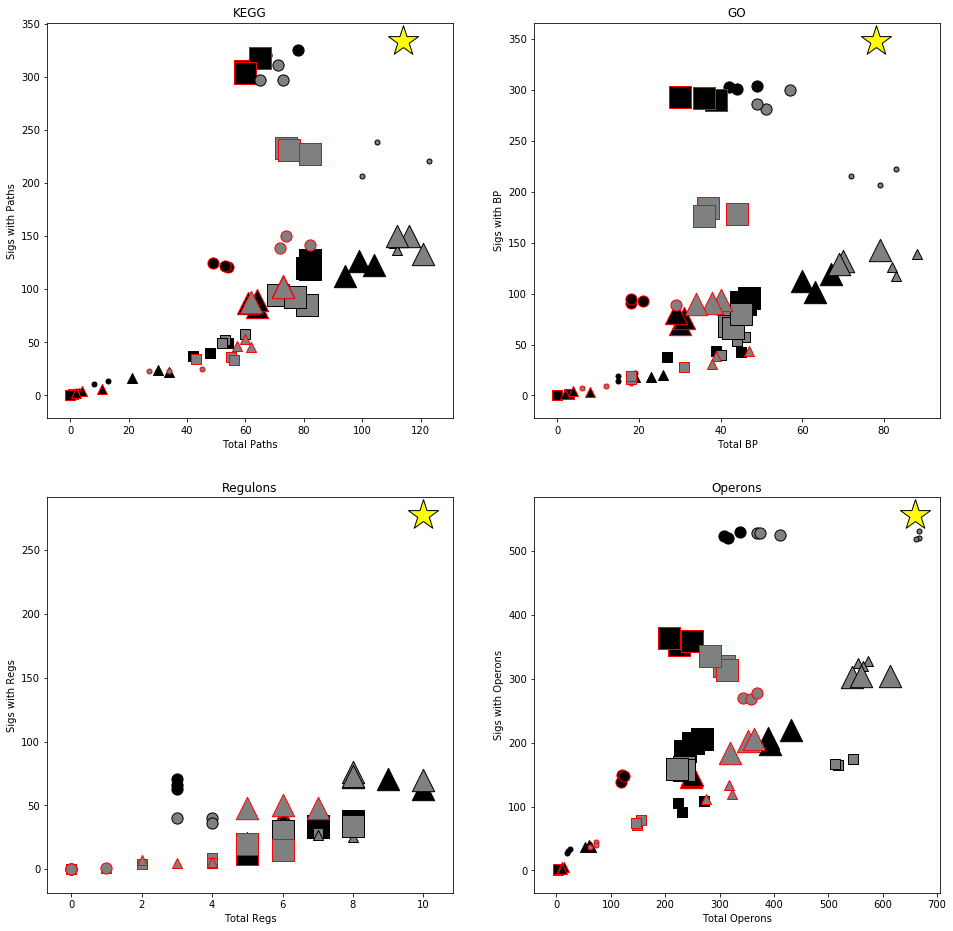

In [303]:
5plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                   
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                    y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



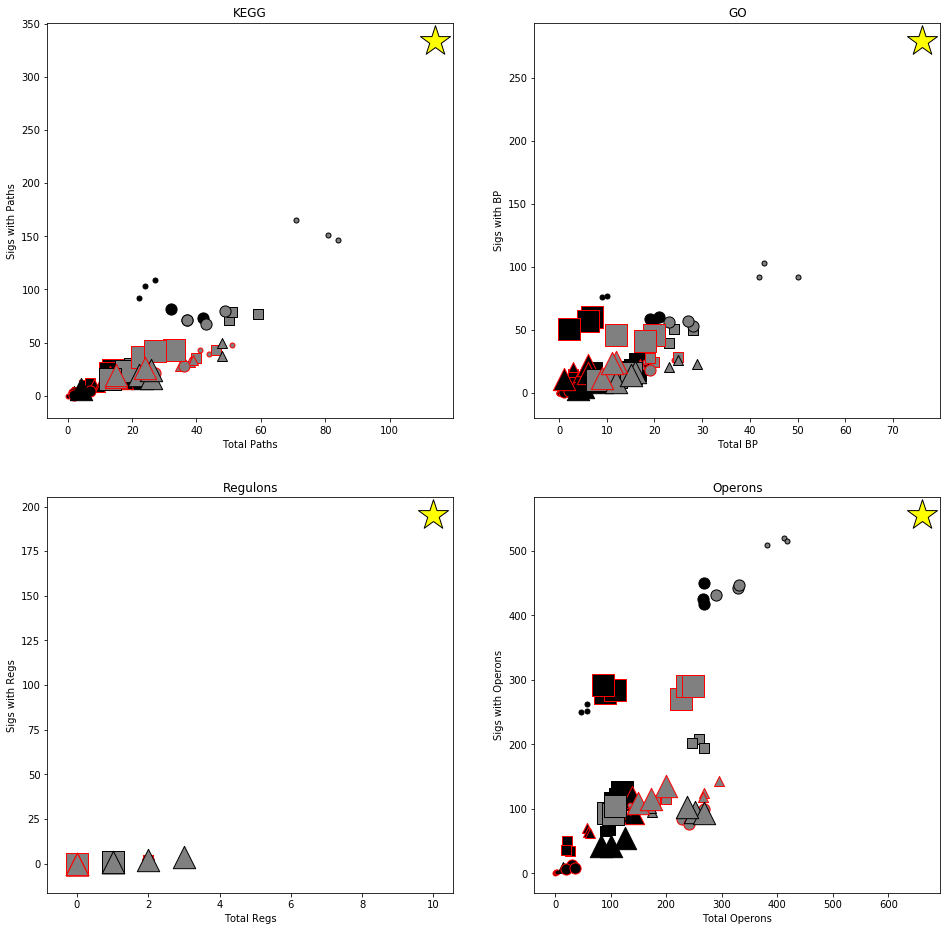

In [207]:
plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+460)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                    y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



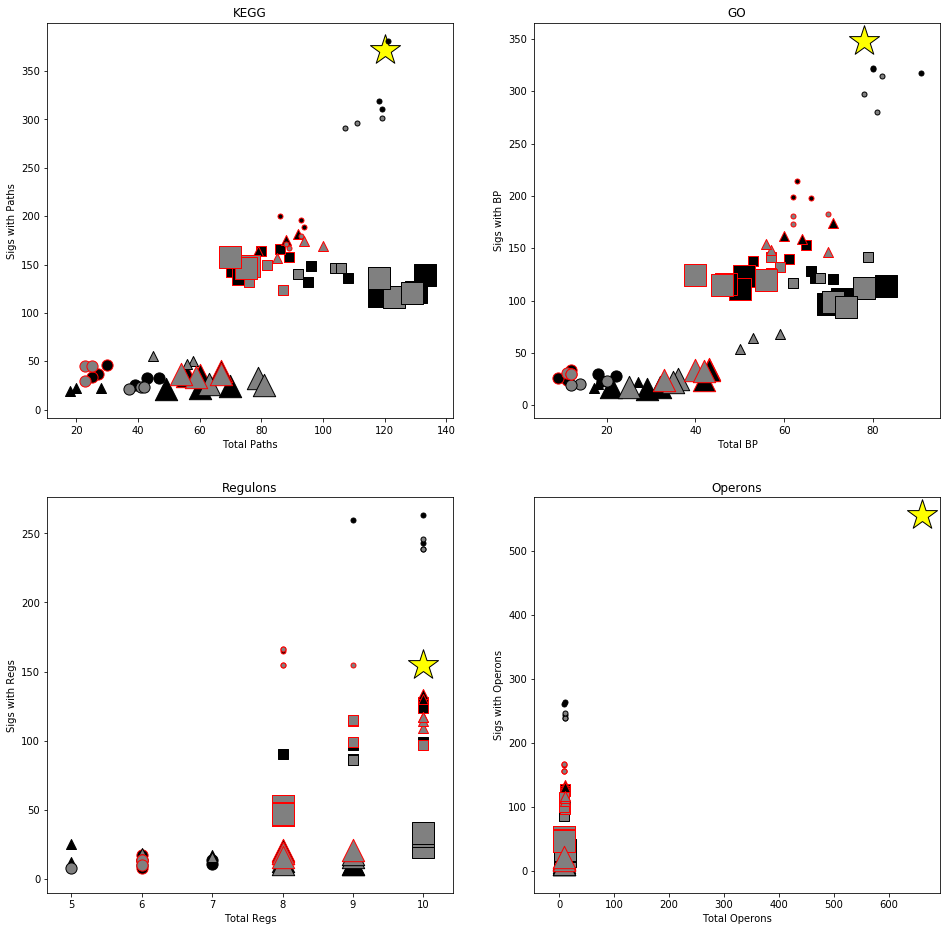

In [532]:
plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+560)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                   # x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                   # y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



In [526]:
fig.savefig('array_enrichments.png')

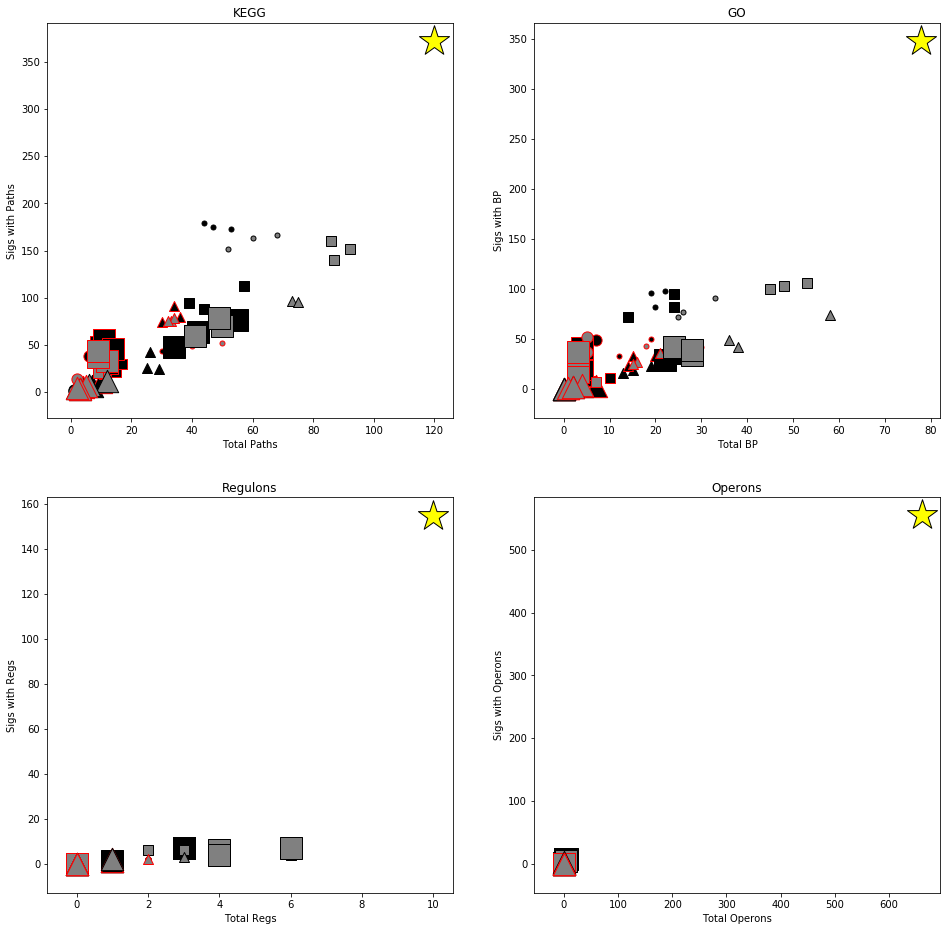

In [527]:
plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+560)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq2[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                   # x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                   # y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



In [1]:
model_dict_seq3

NameError: name 'model_dict_seq3' is not defined

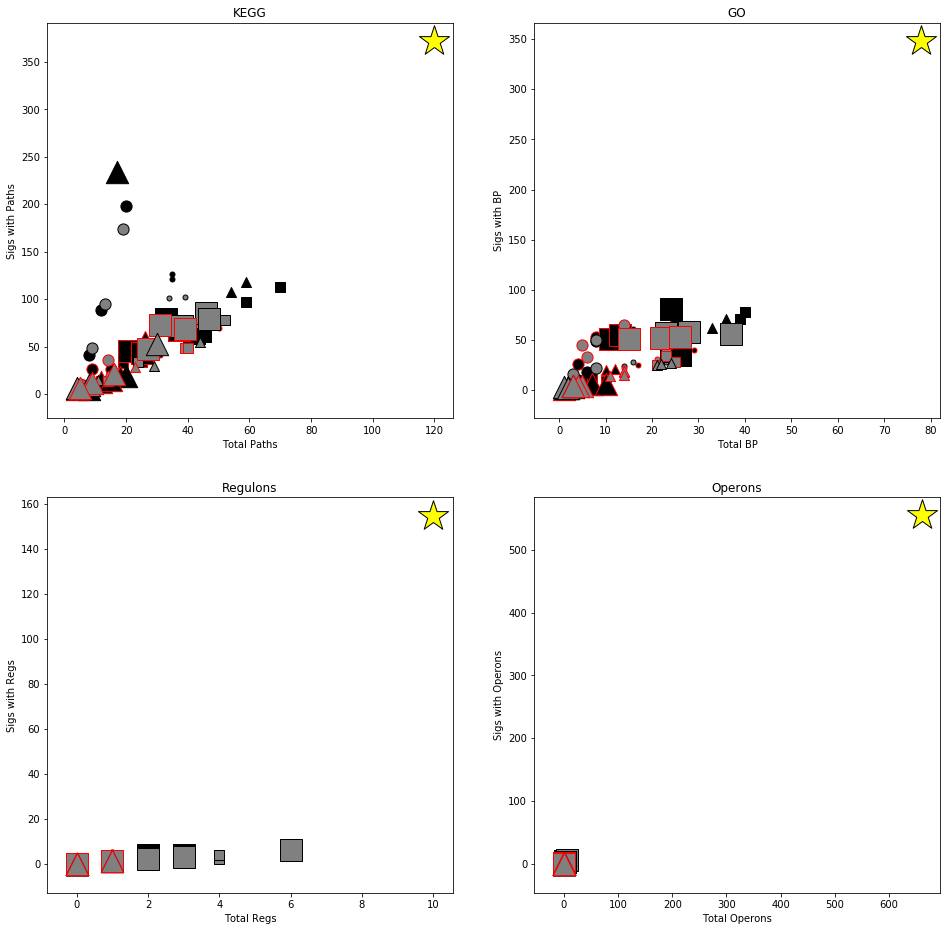

In [533]:
plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+560)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq3[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                   # x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                   # y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'



In [529]:
fig.savefig('seq_enrichments.png')

In [280]:
for m in model_dict_seq3:
    model_dict_seq3[m].set_hwg_cutoff(2.0)
    #model_dict_seq[m].set_op('node_interpretation/operons_format.txt')
    #print('op done')
    model_dict_seq3[m].set_kegg('node_interpretation/pseudomonas_KEGG_terms.txt') 
    #print('kegg done')
    model_dict_seq3[m].set_go('node_interpretation/manual_GO_BP_terms.txt') 
    #print('go done')
    model_dict_seq3[m].set_reg('node_interpretation/regulons_format.txt')
    #print('reg done')
    print(m)
print('dict seq done') 

plimk=10
plimg=10
plimr=10
plimo=10
xd=2
yd=2
fig, ax = plt.subplots(xd,yd,figsize=(xd*8 ,yd *8))
x = ((model_dict_seq3['tf_adage'].kegg_ps > plimk).sum(0) > 0).sum()
y = ((model_dict_seq3['tf_adage'].kegg_ps > plimk).sum(1) > 0).sum()
ax[0,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,0].set(title = 'KEGG', xlabel = 'Total Paths', ylabel = 'Sigs with Paths')

x = ((model_dict_seq3['tf_adage'].go_ps > plimg).sum(0) > 0).sum()
y = ((model_dict_seq3['tf_adage'].go_ps > plimg).sum(1) > 0).sum()
ax[0,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[0,1].set(title = 'GO', xlabel = 'Total BP', ylabel = 'Sigs with BP')

x = ((model_dict_seq3['tf_adage'].regs_ps > plimr).sum(0) > 0).sum()
y = ((model_dict_seq3['tf_adage'].regs_ps > plimr).sum(1) > 0).sum()
ax[1,0].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,0].set(title = 'Regulons', xlabel = 'Total Regs', ylabel = 'Sigs with Regs')

#x = ((model_dict['tf_adage'].ops_ps > plimo).sum(0) > 0).sum()
#y = ((model_dict['tf_adage'].ops_ps > plimo).sum(1) > 0).sum()
#ax[1,1].scatter(x, y, c = 'yellow', marker = '*', edgecolor ='black', s=1000)
ax[1,1].set(title = 'Operons', xlabel = 'Total Operons', ylabel = 'Sigs with Operons')

xi = 0
yi = 0
c = 'black'
ec = 'black'
ms = ['.','s', '^','h']
mi=0
s=100
for i in inits:
    s=100
    for l in L1_norm:
        xi = 0
        mi=0
        for a in act_fun:
            m = ms[mi]
            ec = 'black'
            for t in tied:
                for se in range(3):
                    seed = str(se+560)
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + seed
                    #print(name)
                    model_temp = model_dict_seq3[name]
                    x = ((model_temp.kegg_ps > plimk).sum(0) > 0).sum()
                    y = ((model_temp.kegg_ps > plimk).sum(1) > 0).sum()
                    ax[0,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.go_ps > plimg).sum(0) > 0).sum()
                    y = ((model_temp.go_ps > plimg).sum(1) > 0).sum()
                    ax[0,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                    x = ((model_temp.regs_ps > plimr).sum(0) > 0).sum()
                    y = ((model_temp.regs_ps > plimr).sum(1) > 0).sum()
                    ax[1,0].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)
                    
                   # x = ((model_temp.ops_ps > plimo).sum(0) > 0).sum()
                   # y = ((model_temp.ops_ps > plimo).sum(1) > 0).sum()
                    ax[1,1].scatter(x, y, c = c, marker = m, edgecolor = ec, s=s)

                ec='red'
            mi = mi+1
        s=500
    c = 'grey'


False

## WRITE OUT GENE LISTS

In [443]:
model_dict3

{'tf_adage': <Adage.Adage at 0x7f6bffe070d0>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue560': <Adage.Adage at 0x7f6b8487a310>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue561': <Adage.Adage at 0x7f6c08843ed0>,
 'ad_glorot_uniform_0_sigmoid_tiedTrue562': <Adage.Adage at 0x7f6ba71e2150>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse560': <Adage.Adage at 0x7f6c03ac6050>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse561': <Adage.Adage at 0x7f6bfeb80850>,
 'ad_glorot_uniform_0_sigmoid_tiedFalse562': <Adage.Adage at 0x7f6b849ae650>,
 'ad_glorot_uniform_0_tanh_tiedTrue560': <Adage.Adage at 0x7f6b849ae6d0>,
 'ad_glorot_uniform_0_tanh_tiedTrue561': <Adage.Adage at 0x7f6b84861f50>,
 'ad_glorot_uniform_0_tanh_tiedTrue562': <Adage.Adage at 0x7f6b84813d10>,
 'ad_glorot_uniform_0_tanh_tiedFalse560': <Adage.Adage at 0x7f6b849c2890>,
 'ad_glorot_uniform_0_tanh_tiedFalse561': <Adage.Adage at 0x7f6bb8a7db90>,
 'ad_glorot_uniform_0_tanh_tiedFalse562': <Adage.Adage at 0x7f6b85252690>,
 'ad_glorot_uniform_0_relu_tiedTrue560': <

In [563]:
name = 'ad_glorot_normal_1e-05_tanh_tiedTrue560'
name = 'ad_glorot_uniform_0_tanh_tiedTrue560'
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
name = 'ad_glorot_normal_1e-05_tanh_tiedTrue560'
model_names = ['tf_adage','ad_glorot_normal_1e-05_tanh_tiedTrue560', 'ad_glorot_uniform_0_tanh_tiedTrue560',
              'ad_glorot_uniform_0_sigmoid_tiedTrue560']
hwgc = 0.0

for m in model_names:
    #model_temp = model_dict_seq3[name]
    model_temp = model_dict3[m]
    model_temp.set_hwg_cutoff(hwgc)
    hw_gene_lists = []
    weight_lists = []
    for n in range(model_temp.hw_genes_all.shape[1]):
        genes_temp = ['node'+str(n)]
        weights_temp = [1]
        for g in range(model_temp.hw_genes_all.shape[0]):
            if(model_temp.hw_genes_all[g,n]):
                #print(g)
                genes_temp.append(model_temp.compendium.index[g])
                weights_temp.append(abs(model_temp.weights[g,n % model_temp.weights.shape[1]]))

        genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
        weights_temp_sorted = [x for _,x in sorted(zip(weights_temp, weights_temp), reverse=True)]
        hw_gene_lists.append(genes_temp_sorted)
        weight_lists.append(weights_temp_sorted)
        
    hw_gene_df = pd.DataFrame(hw_gene_lists).fillna('').values  
    hw_weight_df = pd.DataFrame(weight_lists).fillna(0).values  
    #hw_gene_lists[1]
    #write_data('test_hwgs.csv', hw_gene_lists)
    with open( 'new_models/' + m + "array_hwgs_" + str(hwgc) + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(hw_gene_df)
    with open(  'new_models/' + m + "array_hwg_weights_" + str(hwgc) + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(hw_weight_df)
        
    with open(  'new_models/' + m + "array_weights.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(model_temp.weights)
        
        
for m in model_names:
    #model_temp = model_dict_seq3[name]
    model_temp = model_dict_seq3[m]
    model_temp.set_hwg_cutoff(hwgc)
    hw_gene_lists = []
    weight_lists = []
    for n in range(model_temp.hw_genes_all.shape[1]):
        genes_temp = ['node'+str(n)]
        weights_temp = [1]
        for g in range(model_temp.hw_genes_all.shape[0]):
            if(model_temp.hw_genes_all[g,n]):
                #print(g)
                genes_temp.append(model_temp.compendium.index[g])
                weights_temp.append(abs(model_temp.weights[g,n % model_temp.weights.shape[1]]))

        genes_temp_sorted = [x for _,x in sorted(zip(weights_temp, genes_temp), reverse=True)]
        weights_temp_sorted = [x for _,x in sorted(zip(weights_temp, weights_temp), reverse=True)]
        hw_gene_lists.append(genes_temp_sorted)
        weight_lists.append(weights_temp_sorted)
        
    hw_gene_df = pd.DataFrame(hw_gene_lists).fillna('').values  
    hw_weight_df = pd.DataFrame(weight_lists).fillna(0).values 
    #hw_gene_lists[1]
    #write_data('test_hwgs.csv', hw_gene_lists)
    with open(  'new_models/' + m + "seq_hwgs_" + str(hwgc) + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(hw_gene_df)
    with open(  'new_models/' + m + "seq_hwg_weights_" + str(hwgc) + ".csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(hw_weight_df)
        
    with open(  'new_models/' + m + "seq_weights.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerows(model_temp.weights)

## write out enrichments

In [497]:
model_temp.kegg_ps

[]

In [519]:
name = 'tf_adage'
#name = 'ad_glorot_uniform_0_tanh_tiedTrue560'
model_dict_seq3[name].set_reg('node_interpretation/regulons_format.txt') 

0    Anr_regulon  PhoB_regulon  PvdR_regulon  PchR_regulon  AlgU_regulon  \
0       3.515272      0.777285      6.718862      3.111741      0.506846   
1       1.310983      0.682734      2.831144      2.981172      1.290197   
2       2.198471      1.462515      3.794460      3.947171      1.120229   
3       1.929693      3.098536      3.510287      3.662458      0.893108   
4       2.584913      4.466859      4.196414      4.349664      1.463733   
..           ...           ...           ...           ...           ...   
595    12.675450      3.648236      3.794460      3.947171      2.917954   
596     2.010416      3.262092      3.596129      3.748480      0.960088   
597     0.978063      0.427115      2.439636      2.587536      0.773726   
598     1.513812      2.276593      3.058929      3.209848      1.635339   
599    10.600472      0.579607      2.681651      2.830968      0.345512   

0    LasR_regulon  RhlR_regulon  PqsR_regulon  QscR_regulon  VreI_regulon  
0        0.680917      0.978198      0.916936      5.784154      2.227616  
1        1.678492      0.875319      0.816353      1.372065      2.101811  
2        1.344428      1.699294      1.628226      0.703815      3.043832  
3       13.889035      3.582050      8.913920     15.062785      2.763947  
4        7.329671      2.072309      1.998633      5.030659      3.441481  
..            ...           ...           ...           ...           ...  
595      1.344428      1.699294      6.890549      0.703815      3.043832  
596      5.341711      1.520056      1.450692      3.194471      2.848361  
597      1.096440      1.664003      1.545833      5.601526      1.727069  
598      8.129610      1.057647      0.994820      0.894500      2.322539  
599      0.494487      3.761317      3.558405      0.126863      1.957933  

[600 rows x 10 columns]

In [520]:

name = 'ad_glorot_normal_1e-05_tanh_tiedTrue560'
name = 'ad_glorot_uniform_0_tanh_tiedTrue560'
name = 'ad_glorot_uniform_0_sigmoid_tiedTrue560'
name = 'ad_glorot_normal_1e-05_tanh_tiedTrue560'
name = 'tf_adage'
model_temp = model_dict_seq3[name]
#model_temp = model_dict3[name]

node_paths_list=[]
for n in range(model_temp.hw_genes_all.shape[1]):
    paths_temp = ['node'+str(n)]
    for k in range(model_temp.regs_ps.shape[1]):
        if(model_temp.regs_ps.loc[n][k] > -np.log(0.01)):
            paths_temp.append(model_temp.regs_ps.columns[k])
    node_paths_list.append(paths_temp)
node_paths_list

with open("jie_adage_regs.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(node_paths_list)